Please run those two cells before running the Notebook!

As those plotting settings are standard throughout the book, we do not show them in the book every time we plot something.

In [36]:
# %matplotlib inline
%config InlineBackend.figure_format = "retina"

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid", 
              palette="colorblind", color_codes=True, 
              rc={"figure.figsize": [12, 8]})

In [38]:
import matplotlib.pyplot as plt


def get_font_family():
    import platform
    system_name = platform.system()
    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    elif system_name == "Linux":
        font_family = "NanumGothic"
    return font_family


font_family = get_font_family()
plt.rc("font", family=font_family)
plt.rc('axes', unicode_minus=False)

In [39]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  
font_prop = fm.FontProperties(fname=font_path)

# 폰트 설정
plt.rc('font', family=font_prop.get_name())
plt.rc('axes', unicode_minus=False)

# Chapter 11 - Asset allocation

자산 배분은 모든 투자자가 직면해야 하는 가장 중요한 결정 중 하나이며, 모든 투자자에게 적용할 수 있는 만능 솔루션은 존재하지 않습니다. 자산 배분이란 투자자의 전체 투자 금액을 특정 자산(주식, 옵션, 채권 등 다양한 금융 상품)으로 분산하는 것을 의미합니다. 배분을 고려할 때, 투자자는 리스크와 잠재적 보상을 균형 있게 맞추고자 하며, 이는 투자자의 목표(예상 수익), 리스크 감수 성향(투자자가 수용할 수 있는 리스크의 크기), 투자 기간(단기 또는 장기 투자)에 따라 달라집니다.

자산 배분의 핵심 틀은 현대 포트폴리오 이론(MPT)입니다. 이는 평균-분산 분석이라고도 불리며, 노벨상 수상자인 해리 마코위츠(Harry Markowitz)가 도입한 이론으로, 위험 회피 성향이 있는 투자자들이 주어진 리스크 수준에서 기대 수익을 최대화하는 포트폴리오를 구성할 수 있도록 합니다. MPT의 주요 통찰은 투자자들이 개별 자산의 성과(기대 수익률이나 변동성 등)만 평가하는 것이 아니라, 자산 포트폴리오 전체의 성과에 미치는 영향을 조사해야 한다는 것입니다.

MPT는 분산 투자라는 개념과 밀접한 관련이 있습니다. 이는 다양한 종류의 자산을 보유함으로써 리스크를 줄일 수 있음을 의미하며, 특정 증권의 손익이 전체 포트폴리오 성과에 미치는 영향이 줄어드는 것입니다. 또 다른 핵심 개념은 포트폴리오 수익률은 개별 자산의 수익률 가중 평균이지만, 리스크(변동성)는 그렇지 않다는 점입니다. 이는 최적화된 자산 배분 덕분에 낮은 변동성을 지닌 포트폴리오를 보유할 수 있기 때문이며, 이는 포트폴리오에 포함된 자산 간 상관관계에도 의존합니다. 원칙적으로, 보유 자산 간 상관관계가 낮을수록 분산 투자에 유리합니다. 만약 상관관계가 완전히 음수라면, 모든 리스크를 분산할 수 있습니다.

현대 포트폴리오 이론의 주요 가정은 다음과 같습니다:
- 투자자는 합리적이며, 가능한 한 리스크를 피하면서 수익을 극대화하고자 합니다.
- 투자자는 예상 수익을 극대화하고자 하는 목표를 공유합니다.
- 모든 투자자는 잠재적 투자에 대한 동일한 수준의 정보를 가지고 있습니다.
- 수수료, 세금, 거래 비용은 고려하지 않습니다.
- 투자자는 무제한으로 돈을 빌리고 빌려줄 수 있으며, 이는 무위험 이자율에서 가능합니다.

이 장에서는 가장 기본적인 자산 배분 전략부터 시작하여 포트폴리오의 성과를 평가하는 방법(개별 자산에도 적용 가능함)을 배우고, 이후에 효율적 프론티어를 얻기 위한 세 가지 접근 방식을 보여줍니다. MPT의 일부 가정을 완화하면서도 효율적 프론티어를 찾는 방법을 배움으로써 얻을 수 있는 주요 이점은, 다른 목표 함수를 최적화하거나 가중치에 특정 제약 조건을 추가하여 코드를 약간 수정하는 것만으로도 가능합니다. 대부분의 프레임워크는 동일하게 유지됩니다. 마지막에는 그래프 이론과 머신러닝을 결합한 새로운 자산 배분 접근법인 '계층적 리스크 균형'을 탐구합니다.

이 장에서 다룰 내용은 다음과 같습니다:
- 동등 가중 포트폴리오의 성과 평가
- 몬테카를로 시뮬레이션을 이용한 효율적 프론티어 찾기
- SciPy를 이용한 최적화를 통해 효율적 프론티어 찾기
- CVXPY를 이용한 볼록 최적화를 통해 효율적 프론티어 찾기
- 계층적 리스크 균형을 통한 최적 포트폴리오 찾기

## 11.1 Evaluating an equally-weighted portfolio's performance

**동등 가중 포트폴리오의 성과 평가**

우리는 가장 기본적인 자산 배분 전략인 '동등 가중(1/n) 포트폴리오'를 조사하는 것부터 시작합니다. 이 전략의 아이디어는 고려된 모든 자산에 동일한 가중치를 부여하여 포트폴리오를 분산하는 것입니다. 이것이 단순하게 들릴 수 있지만, DeMiguel, Garlappi, Uppal (2007)의 연구에 따르면 더 고급 자산 배분 전략을 사용해도 1/n 포트폴리오의 성과를 능가하기 어려울 수 있습니다.

이 방법의 목표는 FAANG 기업(Facebook/Meta, Amazon, Apple, Netflix, Google/Alphabet)의 1/n 포트폴리오를 구성하는 방법을 보여주는 것입니다. 이 포트폴리오의 수익률을 계산한 후, 'quantstats' 라이브러리를 사용하여 모든 관련 포트폴리오 평가 지표를 신속하게 얻고, 이를 'tear sheet' 형식으로 정리합니다. 전통적으로 tear sheet는 상장 기업에 대한 중요한 정보를 요약한 간결한(보통 한 페이지) 문서입니다.

### How to do it...

1. Import the libraries:

In [29]:
import yfinance as yf
import numpy as np
import pandas as pd
import quantstats as qs

2. Define the considered assets and download their prices from Yahoo Finance:

[*********************100%***********************]  5 of 5 completed


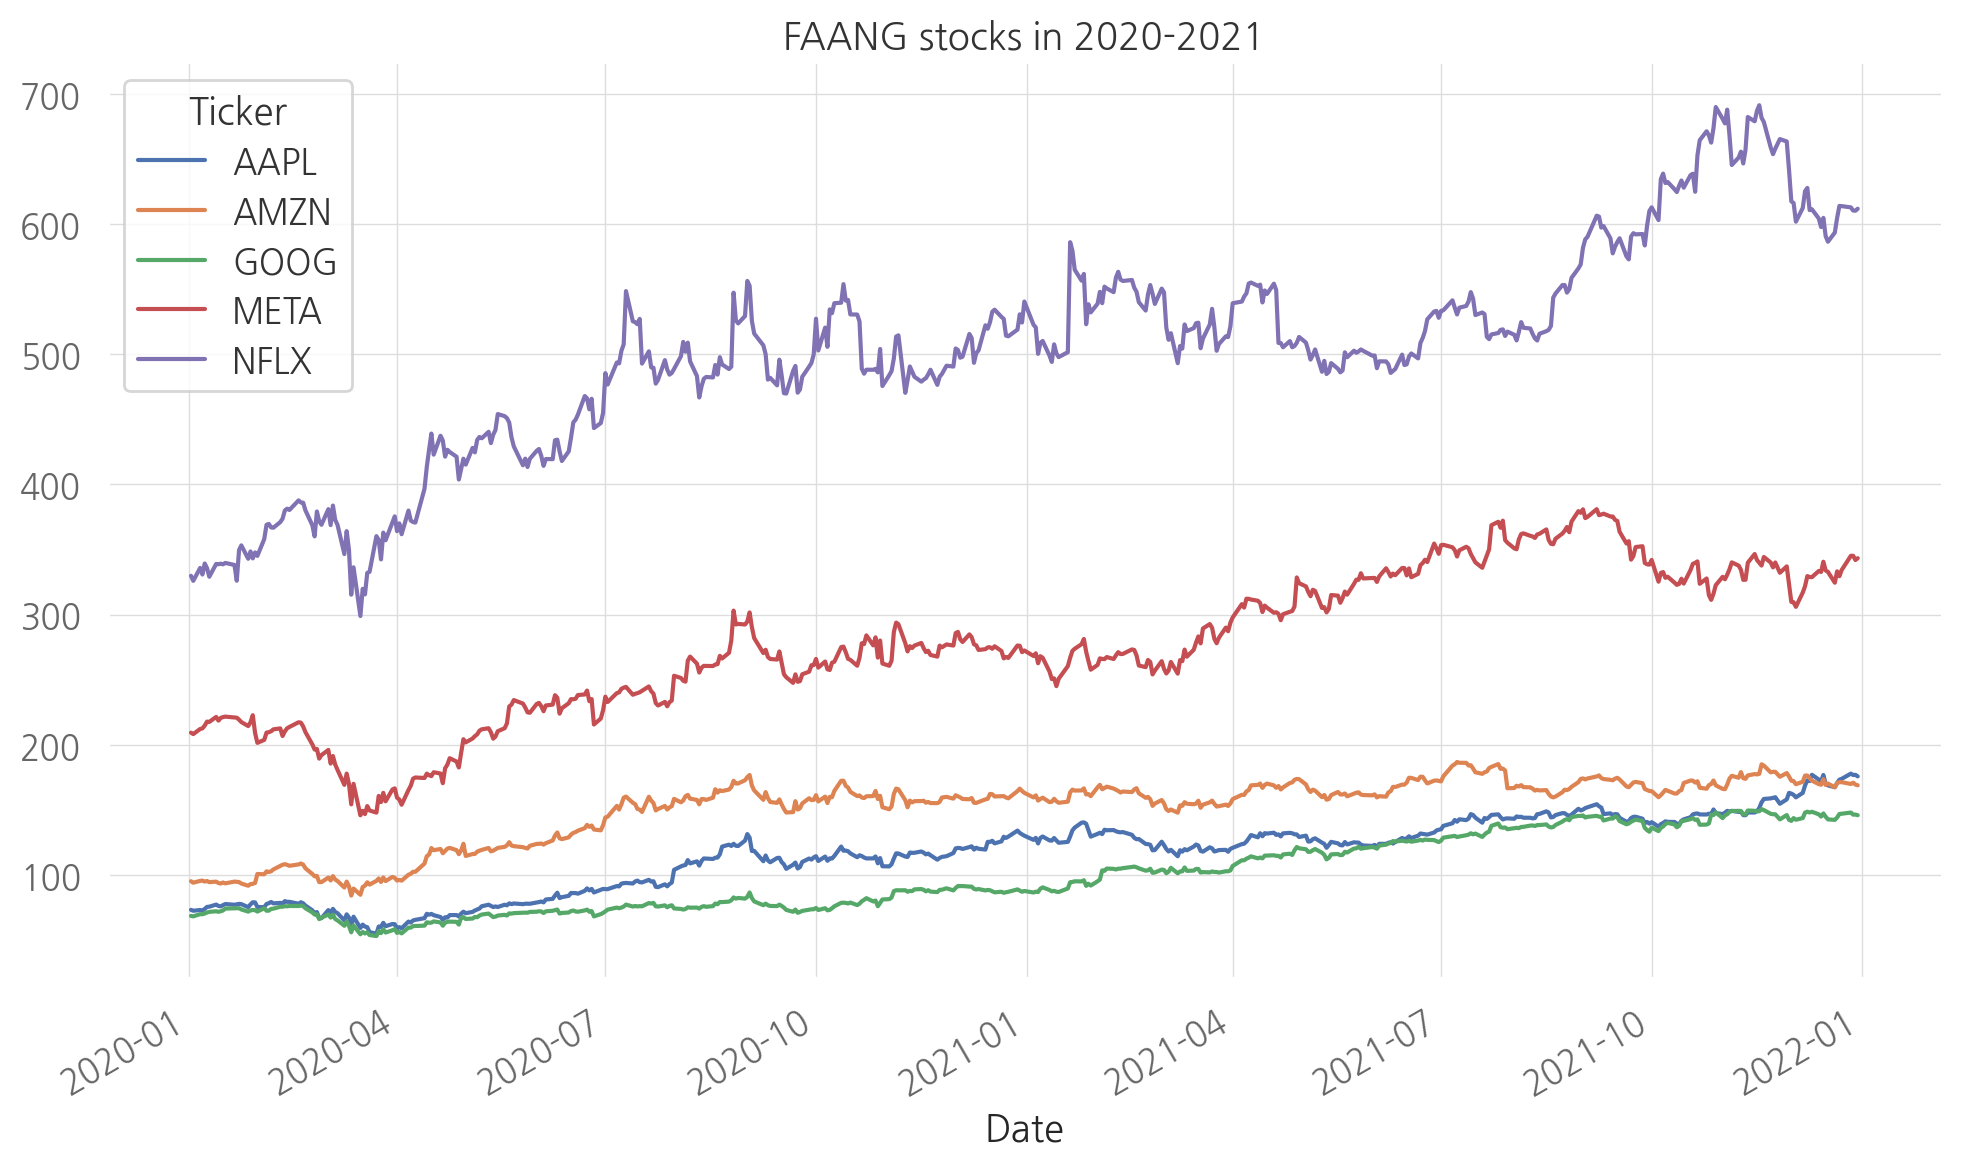

In [30]:
ASSETS = ["META", "AMZN", "AAPL", "NFLX", "GOOG"]
n_assets = len(ASSETS)

prices_df = yf.download(ASSETS, 
                        start="2020-01-01", 
                        end="2021-12-31")
prices_df["Adj Close"].plot(title="FAANG stocks in 2020-2021")

sns.despine()
plt.tight_layout()


3. Calculate individual asset returns:

1단계부터 3단계까지는 이미 확립된 접근 방식을 따릅니다. 즉, 라이브러리를 불러오고, 매개변수를 설정하고, 2020년부터 2021년까지의 FAANG 기업의 주가를 다운로드한 뒤, 조정된 종가를 사용하여 단순 수익률을 계산합니다.

In [31]:
returns = prices_df["Adj Close"].pct_change().dropna()

4. Define the weights:

4단계에서는 각 가중치가 1/n_assets(여기서 n_assets는 포트폴리오에 포함하려는 자산의 수)와 동일한 가중치 벡터를 생성합니다. 

In [32]:
portfolio_weights = n_assets * [1 / n_assets]

5. Calculate portfolio returns:

그 다음, 포트폴리오 수익률을 가중치 벡터와 자산 수익률 행렬의 전치 행렬을 곱하여 행렬 곱셈(내적이라고도 함)으로 계산합니다. 이 전치 행렬을 사용하기 위해, `pandas` 데이터프레임의 T 메서드를 사용합니다. 그런 후, 포트폴리오 수익률을 `pandas` Series 객체로 저장하여 다음 단계의 입력으로 사용합니다.

책의 첫 번째 판에서는 `pyfolio` 라이브러리를 사용해 1/n 포트폴리오의 성과를 분석했습니다. 그러나 그 이후, `pyfolio` 라이브러리를 담당했던 회사가 폐쇄되었고 해당 라이브러리는 더 이상 활발히 유지 관리되지 않고 있습니다. 추가 노트북에서 보듯, 여전히 해당 라이브러리를 사용할 수 있으며, 이는 책의 GitHub 저장소에서 이용할 수 있습니다. 또한, Stefan Jansen이 유지 관리하는 `pyfolio-reloaded`라는 포크 버전을 사용할 수도 있습니다. Stefan Jansen은 *Machine Learning for Algorithmic Trading*의 저자입니다.

In [33]:
# 포트폴리오 수익률 계산
portfolio_returns = pd.Series(
    np.dot(portfolio_weights, returns.T),  # 가중치와 수익률의 내적 계산
    index=returns.index  # 원래 수익률 데이터프레임의 인덱스 사용
)

# 설명:
# 1. np.dot()을 사용하여 포트폴리오 가중치와 수익률의 전치행렬을 곱합니다.
# 2. 이 결과를 pandas Series로 변환합니다.
# 3. 시리즈의 인덱스는 원래 수익률 데이터의 날짜를 유지합니다.
# 4. 이렇게 하면 각 날짜에 대한 전체 포트폴리오의 수익률을 얻을 수 있습니다.

6. Generate basic performance evaluation plots:

6단계에서는 `quantstats` 라이브러리를 사용하여 기본적인 포트폴리오 평가 그래프를 생성합니다. 일일 수익률을 보여주는 그래프에는 익숙하지만, 나머지 두 가지 그래프는 새롭게 추가됩니다:
- **누적 수익률 그래프:** 포트폴리오의 가치가 시간에 따라 어떻게 변화하는지 보여줍니다.
- **언더워터 그래프:** 손실에 초점을 맞춘 그래프이며, 최저점까지의 기간과 그 기간이 얼마나 지속되는지를 나타냅니다. 가치가 다시 새로운 최고점에 도달할 때까지의 시간을 보여줍니다. 여기서 얻을 수 있는 통찰 중 하나는 손실 기간의 길이입니다.


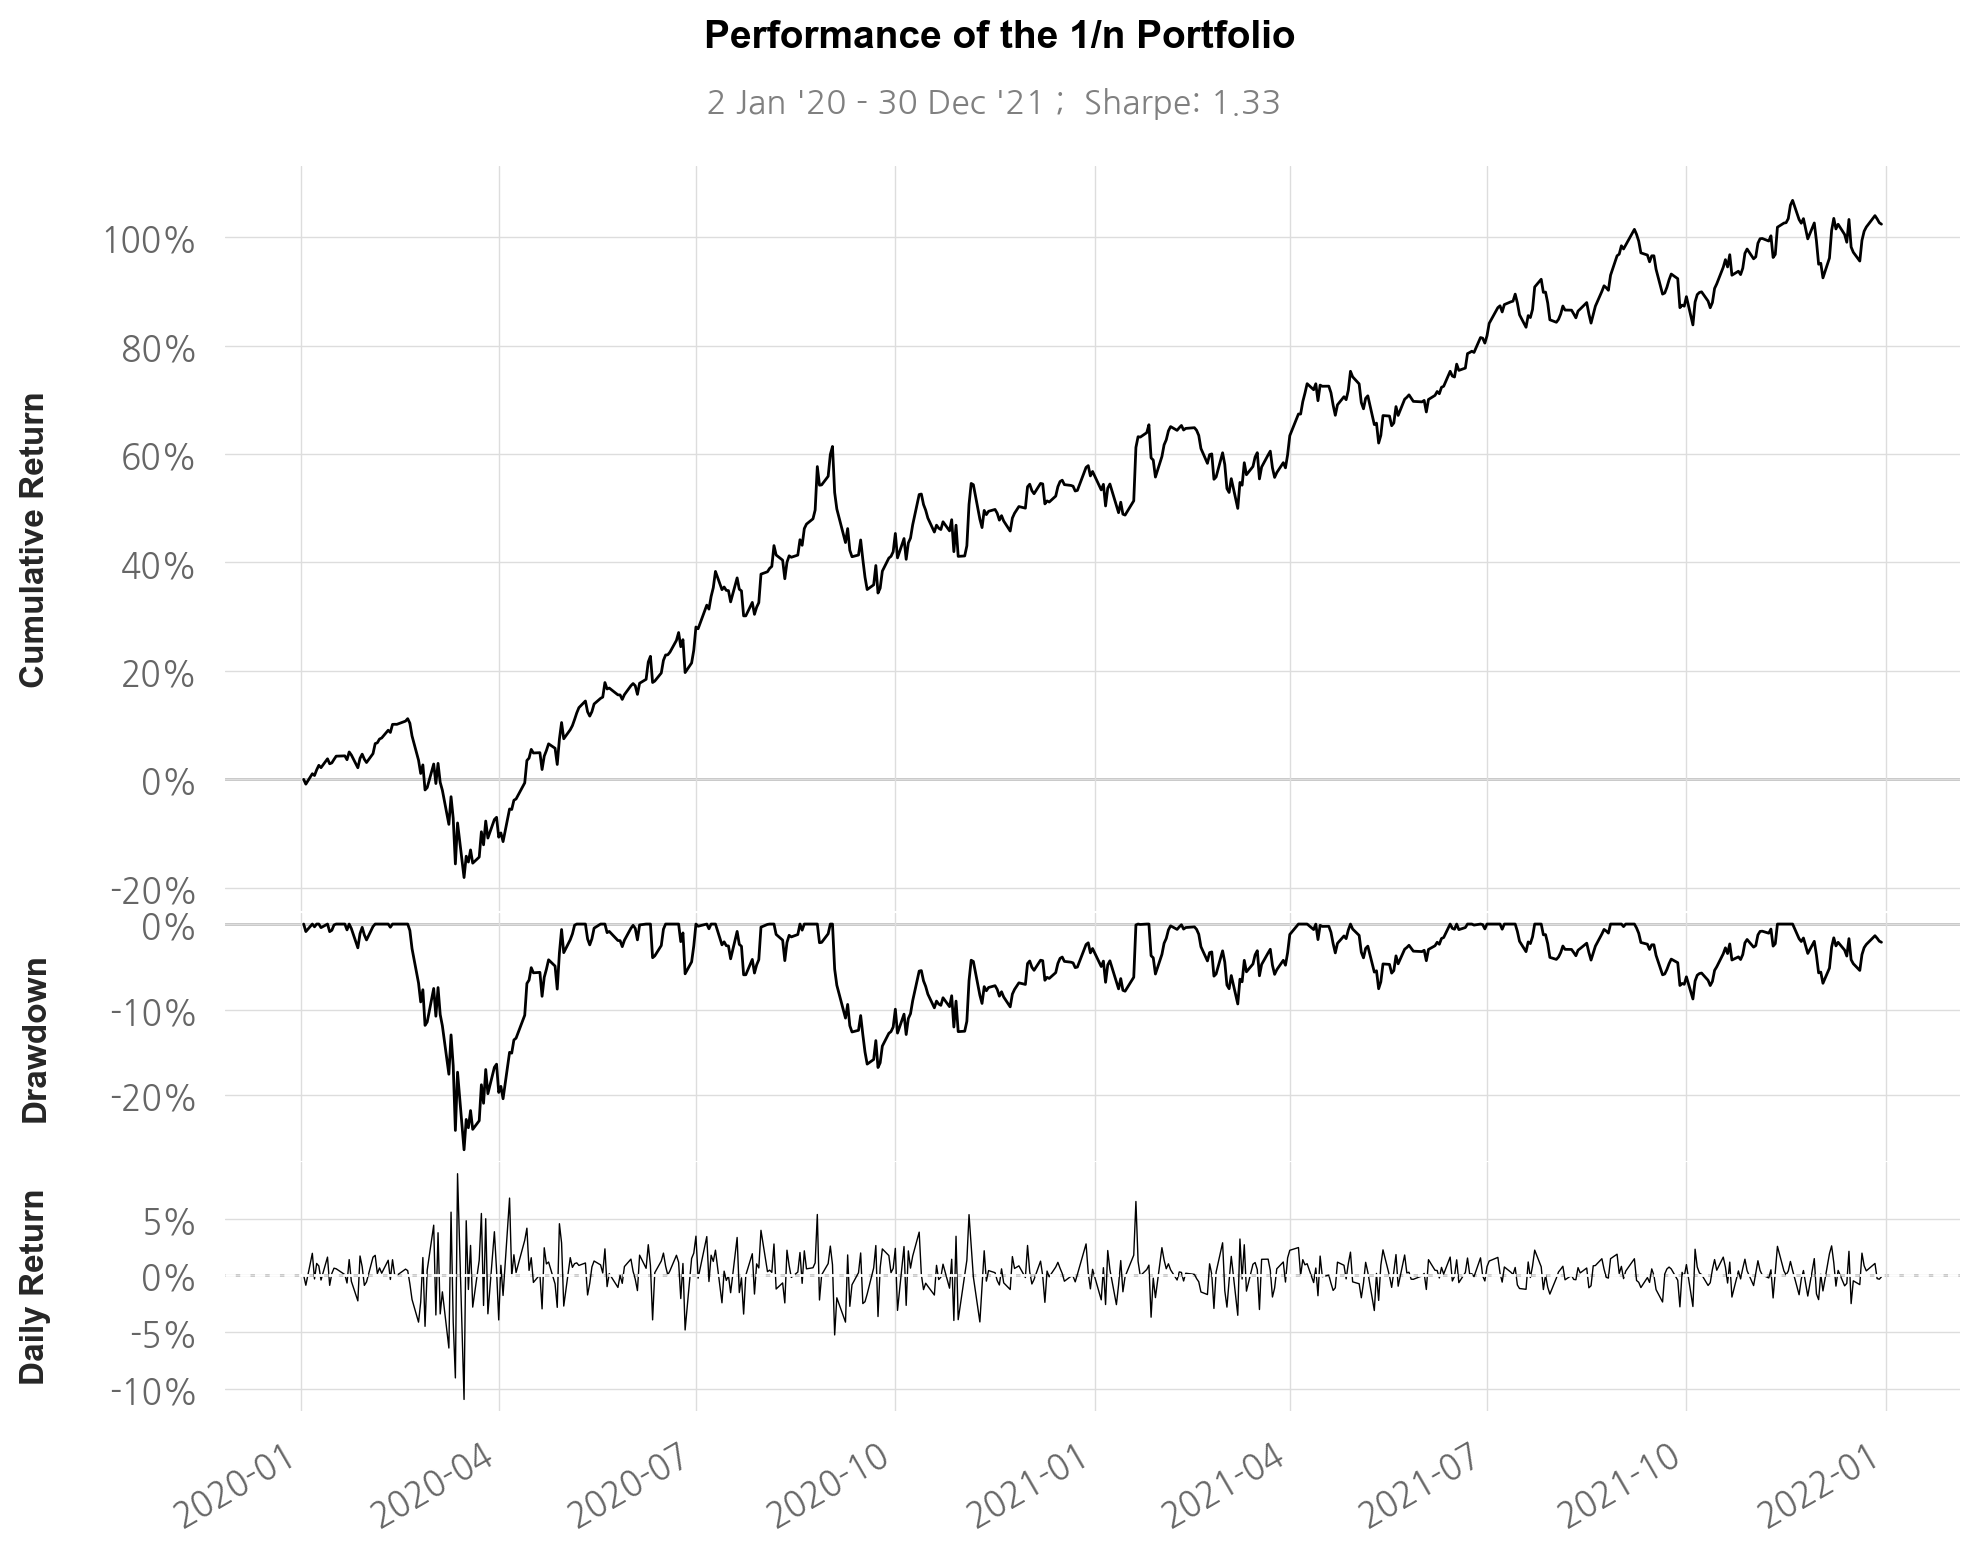

In [34]:
# quantstats 라이브러리를 사용하여 포트폴리오 성과 스냅샷 그래프 생성
qs.plots.snapshot(
    portfolio_returns,  # 포트폴리오 수익률 데이터
    title="Performance of the 1/n Portfolio",  # 그래프 제목 
    grayscale=True  # 흑백 스타일 사용
)

# 설명:
# - portfolio_returns: 앞서 계산한 포트폴리오의 일일 수익률
# - title: 그래프의 제목을 설정합니다
# - grayscale=True: 컬러 대신 흑백 스타일로 그래프를 생성합니다
# 
# 이 함수는 다음과 같은 세 가지 주요 그래프를 생성합니다:
# 1. 일일 수익률 분포
# 2. 누적 수익률 추이
# 3. 언더워터 차트 (최대 낙폭 시각화)

7. Calculate the basic portfolio evaluation metrics:

마지막으로, 포트폴리오 평가 지표를 생성합니다. 이 과정에서 기준 벤치마크도 제공합니다. 우리는 S&P 500 지수를 따르도록 설계된 상장지수펀드(ETF)인 SPY를 선택합니다. 기준을 티커로 제공하거나 `pandas` DataFrame/Series로 가격이나 수익률을 제공할 수 있습니다. `prepare_returns` 인수를 사용하여 가격에서 수익률을 계산할지 여부를 지정할 수 있습니다.

In [35]:
qs.reports.metrics(portfolio_returns, 
                   benchmark="SPY", 
                   mode="basic")

[*********************100%***********************]  1 of 1 completed


                    Benchmark (SPY)    Strategy
------------------  -----------------  ----------
Start Period        2020-01-03         2020-01-03
End Period          2021-12-30         2021-12-30
Risk-Free Rate      0.0%               0.0%
Time in Market      100.0%             100.0%

Cumulative Return   47.69%             104.18%
CAGR﹪              14.47%             28.07%

Sharpe              0.9                1.34
Prob. Sharpe Ratio  89.13%             96.83%
Sortino             1.23               1.93
Sortino/√2          0.87               1.36
Omega               1.27               1.27

Max Drawdown        -34.1%             -26.35%
Longest DD Days     180                140

Gain/Pain Ratio     0.2                0.27
Gain/Pain (1M)      1.44               3.42

Payoff Ratio        0.79               0.84
Profit Factor       1.2                1.27
Common Sense Ratio  0.96               1.2
CPC Index           0.55               0.63
Tail Ratio          0.8                0

Figure 11.2: Performance evaluation metrics of the 1/n portfolio and the S&P 500 benchmark

**Figure 11.2에서 확인하는 주요 지표는 다음과 같습니다:**
- **샤프 비율:** 가장 인기 있는 성과 평가 지표 중 하나로, 단위 표준편차당 초과 수익(무위험 수익률 초과)을 측정합니다. 무위험 수익률이 제공되지 않는 경우 기본값은 0으로 설정됩니다. 샤프 비율이 높을수록 포트폴리오의 위험 조정 성과가 더 좋습니다.
- **소르티노 비율:** 샤프 비율의 수정된 버전으로, 분모에 하락 편차가 사용됩니다.
- **오메가 비율:** 특정 수익률 목표 임계값(기본값은 0)을 기준으로 이익과 손실의 비율을 나타냅니다. 샤프 비율에 비해 모든 분포의 모멘트를 고려한다는 점에서 장점이 있습니다(샤프 비율은 평균과 분산만 고려).
- **최대 낙폭:** 포트폴리오의 하락 위험을 측정하며, 투자 기간 동안 가장 큰 고점 대비 저점 손실(백분율로 표현)을 나타냅니다. 최대 낙폭이 작을수록 좋습니다.
- **테일 비율:** 일일 수익률의 95번째와 5번째 백분위 수의 절대 비율입니다. 테일 비율이 약 -0.8이라는 것은 손실이 이익보다 약 1.25배 더 크다는 것을 의미합니다.

하락 편차는 표준편차와 유사하지만, 음의 수익률만 고려한다는 점에서 다릅니다. 양의 변화를 모두 제외하고, 투자자가 정의한 최소 허용 수익률 수준과 그 이하의 수익률을 하락 편차 계산에 사용합니다.

### There's more

지금까지 우리는 `quantstats` 라이브러리에서 제공되는 기본적인 그래프와 지표들만 생성했습니다. 그러나 이 라이브러리는 훨씬 더 많은 기능을 제공합니다.



**전체 티어 시트 (Full Tear Sheets)**

`quantstats`를 사용하면 모든 사용 가능한 그래프와 지표(벤치마크와의 비교 포함)를 포함하는 완전한 HTML 보고서를 생성할 수 있습니다. 다음 명령을 사용하여 이러한 보고서를 생성할 수 있습니다:


1. Generate the full HTML tear sheet:

In [37]:
import numpy as np

# np.product는 np.prod의 별칭으로 설정합니다.
# np.prod는 배열 요소의 곱을 계산하는 함수입니다.
# 이를 통해 np.product를 사용하여 np.prod와 동일한 기능을 수행할 수 있습니다.
np.product = np.prod

In [39]:
# 포트폴리오 수익률 데이터의 인덱스에서 시간대를 제거합니다.
# 이는 시간대 정보가 없는 데이터와의 호환성을 위해 필요할 수 있습니다.
portfolio_returns.index = portfolio_returns.index.tz_localize(None)

In [52]:
import yfinance as yf  # yfinance 라이브러리를 가져옵니다. 이 라이브러리는 금융 데이터를 다운로드하는 데 사용됩니다.

# SPY (S&P 500 ETF)의 데이터를 다운로드합니다. 시작 날짜와 종료 날짜는 포트폴리오 수익률 데이터의 인덱스를 사용합니다.
spy_data = yf.download("SPY", start=portfolio_returns.index[0], end=portfolio_returns.index[-1])

# SPY 데이터의 'Adj Close' 열을 사용하여 일일 수익률을 계산하고, 결측값을 제거합니다.
spy_returns = spy_data['Adj Close'].pct_change().dropna()

# 벤치마크 데이터의 시간대 정보가 있는 경우 이를 제거합니다.
if spy_returns.index.tz is not None:
    spy_returns.index = spy_returns.index.tz_localize(None)

[*********************100%***********************]  1 of 1 completed


In [53]:
qs.reports.html(portfolio_returns, 
                benchmark=spy_returns,  # 벤치마크로 SPY의 수익률을 사용합니다.
                title="1/n portfolio",  # 보고서의 제목을 설정합니다.
                download_filename="EW portfolio evaluation.html")  # 생성된 HTML 파일의 이름을 설정합니다.

이 명령을 실행하면 SPY와 비교한 동등 가중 포트폴리오의 포괄적인 티어 시트를 포함하는 HTML 파일이 생성됩니다. `EW portfolio evaluation.html` 파일은 GitHub에서 참조할 수 있습니다.

먼저, 생성된 보고서에 나타나는 새로운 중요한 지표들에 대해 설명하겠습니다:
- **캘마 비율 (Calmar ratio):** 이 비율은 동일한 기간 동안의 최대 낙폭으로 나눈 평균 연간 복리 수익률로 정의됩니다. 비율이 높을수록 좋습니다.
- **왜도 (Skew):** 왜도는 비대칭 정도를 측정하며, 주어진 분포(여기서는 포트폴리오 수익률)의 형태가 정규 분포에 비해 얼마나 왜곡되었는지를 나타냅니다. 음의 왜도(왼쪽 왜도)는 큰 음의 수익률이 큰 양의 수익률보다 더 자주 발생함을 의미합니다.
- **첨도 (Kurtosis):** 이는 극단적인 값의 빈도를 측정합니다. 높은 첨도를 가진 분포는 가우시안 분포의 꼬리 영역을 초과하는 꼬리 데이터를 포함하여 큰 수익과 작은 수익이 더 자주 발생함을 의미합니다.
- **알파 (Alpha):** 전략이 시장을 능가할 수 있는 능력을 설명합니다. 즉, 벤치마크 수익률보다 초과 수익을 나타냅니다.
- **베타 (Beta):** 전체 시장의 체계적 위험에 비해 포트폴리오의 변동성을 측정합니다. 포트폴리오의 베타는 포트폴리오에 포함된 모든 개별 자산의 베타 계수의 가중 평균과 같습니다.

이 지표들에는 최악의 10가지 낙폭도 포함됩니다. 즉, 각 낙폭이 얼마나 심각했는지, 회복 날짜, 그리고 낙폭이 지속된 기간을 보여줍니다. 이 정보는 앞서 언급한 언더워터 그래프의 분석을 보완해줍니다.

2. Add the methods of `quantstats` to the `pandas` DataFrame:

**pandas 데이터프레임/시리즈에 새로운 메서드 추가하기**

`quantstats` 라이브러리의 또 다른 흥미로운 기능은 `pandas` 데이터프레임이나 시리즈에 새로운 메서드를 추가하여, 라이브러리에서 제공하는 모든 지표를 계산할 수 있도록 확장하는 것입니다. 이를 위해 먼저 다음 명령을 실행해야 합니다:

In [42]:
qs.extend_pandas()

3. Calculate the Sharpe ratio and the Sortino ratio using the newly added methods:

그런 다음, 수익률 시리즈를 포함하는 데이터프레임에서 직접 메서드에 접근할 수 있습니다. 예를 들어, 다음 코드를 사용하여 샤프 비율과 소르티노 비율을 빠르게 계산할 수 있습니다:

In [43]:
print(f"Sharpe ratio: {portfolio_returns.sharpe():.2f}")
print(f"Sortino ratio: {portfolio_returns.sortino():.2f}")

Sharpe ratio: 1.33
Sortino ratio: 1.91


4. See all the new methods that are available to us thanks to the `quantstats` library:

이 값은 이전에 `qs.reports.metrics` 함수를 사용하여 계산한 값과 일치합니다. 사용 가능한 모든 메서드의 전체 목록을 보려면 다음 코드를 실행할 수 있습니다:


In [44]:
[method for method in dir(qs.stats) if method[0] != "_"]

['adjusted_sortino',
 'autocorr_penalty',
 'avg_loss',
 'avg_return',
 'avg_win',
 'best',
 'cagr',
 'calmar',
 'common_sense_ratio',
 'comp',
 'compare',
 'compsum',
 'conditional_value_at_risk',
 'consecutive_losses',
 'consecutive_wins',
 'cpc_index',
 'cvar',
 'distribution',
 'drawdown_details',
 'expected_return',
 'expected_shortfall',
 'exposure',
 'gain_to_pain_ratio',
 'geometric_mean',
 'ghpr',
 'greeks',
 'implied_volatility',
 'information_ratio',
 'kelly_criterion',
 'kurtosis',
 'max_drawdown',
 'monthly_returns',
 'omega',
 'outlier_loss_ratio',
 'outlier_win_ratio',
 'outliers',
 'payoff_ratio',
 'pct_rank',
 'probabilistic_adjusted_sortino_ratio',
 'probabilistic_ratio',
 'probabilistic_sharpe_ratio',
 'probabilistic_sortino_ratio',
 'profit_factor',
 'profit_ratio',
 'r2',
 'r_squared',
 'rar',
 'recovery_factor',
 'remove_outliers',
 'risk_of_ruin',
 'risk_return_ratio',
 'rolling_greeks',
 'rolling_sharpe',
 'rolling_sortino',
 'rolling_volatility',
 'ror',
 'seren

5. Generate the plots:

In [55]:
# portfolio_returns = qs.utils.prepare_returns(portfolio_returns)

In [49]:
# qs.reports.plots(portfolio_returns, benchmark="SPY", mode="basic", prepare_returns=False)
# qs.reports.plots(portfolio_returns, benchmark="SPY", mode="full", prepare_returns=False)

In [51]:
help(portfolio_returns.value_at_risk)

Help on method value_at_risk in module quantstats.stats:

value_at_risk(sigma=1, confidence=0.95, prepare_returns=True) method of pandas.core.series.Series instance
    Calculats the daily value-at-risk
    (variance-covariance calculation with confidence n)



### Sea also

추가 자료는 다음에서 확인할 수 있습니다:
- DeMiguel, V., Garlappi, L., & Uppal, R. 2007, "Optimal versus naive diversification: how inefficient is the 1/N portfolio strategy?" *The Review of Financial Studies*, 22(5): 1915-1953: [https://doi.org/10.1093/rfs/hhm075](https://doi.org/10.1093/rfs/hhm075)

## 11.2 Finding the efficient frontier using Monte Carlo simulations

**몬테카를로 시뮬레이션을 사용한 효율적 프론티어 찾기**

현대 포트폴리오 이론에 따르면, 효율적 프론티어는 리스크-수익 스펙트럼에서 최적의 포트폴리오 집합을 의미합니다. 이는 프론티어 상의 포트폴리오가 다음을 제공한다는 것을 의미합니다:
- 주어진 리스크 수준에서 가장 높은 예상 수익을 제공합니다.
- 주어진 예상 수익 수준에서 가장 낮은 리스크를 제공합니다.

효율적 프론티어 곡선 아래에 위치한 모든 포트폴리오는 최적이 아니기 때문에, 프론티어 상의 포트폴리오를 선택하는 것이 항상 더 나은 선택입니다.

이 방법에서는 몬테카를로 시뮬레이션을 사용하여 효율적 프론티어를 찾는 방법을 보여줍니다. 최적화를 기반으로 한 더 우아한 접근 방식을 보여주기 전에, 우리는 수천 개의 포트폴리오를 무작위로 가중치를 할당하여 생성하는 브루트 포스 접근 방식을 사용합니다. 그런 다음, 포트폴리오의 성과(예상 수익/변동성)를 계산하고 이러한 값을 사용하여 효율적 프론티어를 결정합니다.

이 연습에서는 2021년 미국의 4개 기술 기업의 수익률을 사용합니다.

### How to do it...

1. Import the libraries:

In [108]:
import yfinance as yf
import numpy as np
import pandas as pd

2. Set up the parameters:

2단계에서는 이 방법에 사용되는 매개변수(고려된 기간, 포트폴리오를 구성하기 위해 사용할 자산, 시뮬레이션 수)를 정의합니다. 중요한 점은 `ASSETS.sort()`를 사용해 자산 목록을 알파벳 순으로 정렬한다는 것입니다. 이는 Yahoo Finance 라이브러리에서 데이터를 다운로드할 때, 제공된 목록에 명시된 순서와 다를 수 있음을 의미합니다.

In [109]:
N_PORTFOLIOS = 10 ** 5
N_DAYS = 252
# ASSETS = ["META", "TSLA", "TWTR", "MSFT"]
ASSETS = ["META", "TSLA", "MSFT", "AAPL"]  # TWTR를 AAPL로 대체
ASSETS.sort()

n_assets = len(ASSETS)

3. Download the stock prices from Yahoo Finance:

In [110]:
prices_df = yf.download(ASSETS, 
                        start="2021-01-01", 
                        end="2021-12-31")

[*********************100%***********************]  4 of 4 completed


In [111]:
prices_df.head()

Price                       Adj Close                                      \
Ticker                           AAPL        META        MSFT        TSLA   
Date                                                                        
2021-01-04 00:00:00+00:00  126.683434  268.132690  210.844284  243.256668   
2021-01-05 00:00:00+00:00  128.249725  270.156586  211.047653  245.036667   
2021-01-06 00:00:00+00:00  123.932632  262.519592  205.575363  251.993332   
2021-01-07 00:00:00+00:00  128.161606  267.933258  211.425415  272.013336   
2021-01-08 00:00:00+00:00  129.267838  266.766815  212.713608  293.339996   

Price                           Close                                      \
Ticker                           AAPL        META        MSFT        TSLA   
Date                                                                        
2021-01-04 00:00:00+00:00  129.410004  268.940002  217.690002  243.256668   
2021-01-05 00:00:00+00:00  131.009995  270.970001  217.899994  245.036667   
2021-01-06 00:00:00+00:00  126.599998  263.309998  212.250000  251.993332   
2021-01-07 00:00:00+00:00  130.919998  268.739990  218.289993  272.013336   
2021-01-08 00:00:00+00:00  132.050003  267.570007  219.619995  293.339996   

Price                            High              ...         Low  \
Ticker                           AAPL        META  ...        MSFT   
Date                                               ...               
2021-01-04 00:00:00+00:00  133.610001  275.000000  ...  214.809998   
2021-01-05 00:00:00+00:00  131.740005  272.399994  ...  215.699997   
2021-01-06 00:00:00+00:00  131.050003  267.750000  ...  211.940002   
2021-01-07 00:00:00+00:00  131.630005  271.609985  ...  213.710007   
2021-01-08 00:00:00+00:00  132.630005  268.950012  ...  217.029999   

Price                                        Open                          \
Ticker                           TSLA        AAPL        META        MSFT   
Date                                                                        
2021-01-04 00:00:00+00:00  239.063339  133.520004  274.779999  222.529999   
2021-01-05 00:00:00+00:00  239.733337  128.889999  268.290009  217.259995   
2021-01-06 00:00:00+00:00  249.699997  127.720001  262.000000  212.169998   
2021-01-07 00:00:00+00:00  258.399994  128.360001  265.899994  214.039993   
2021-01-08 00:00:00+00:00  279.463318  132.429993  268.309998  218.679993   

Price                                     Volume                      \
Ticker                           TSLA       AAPL      META      MSFT   
Date                                                                   
2021-01-04 00:00:00+00:00  239.820007  143301900  15106100  37130100   
2021-01-05 00:00:00+00:00  241.220001   97664900   9871600  23823000   
2021-01-06 00:00:00+00:00  252.830002  155088000  24354100  35930700   
2021-01-07 00:00:00+00:00  259.209991  109578200  15789800  27694500   
2021-01-08 00:00:00+00:00  285.333344  105158200  18528300  22956200   

Price                                 
Ticker                          TSLA  
Date                                  
2021-01-04 00:00:00+00:00  145914600  
2021-01-05 00:00:00+00:00   96735600  
2021-01-06 00:00:00+00:00  134100000  
2021-01-07 00:00:00+00:00  154496700  
2021-01-08 00:00:00+00:00  225166500  

[5 rows x 24 columns]

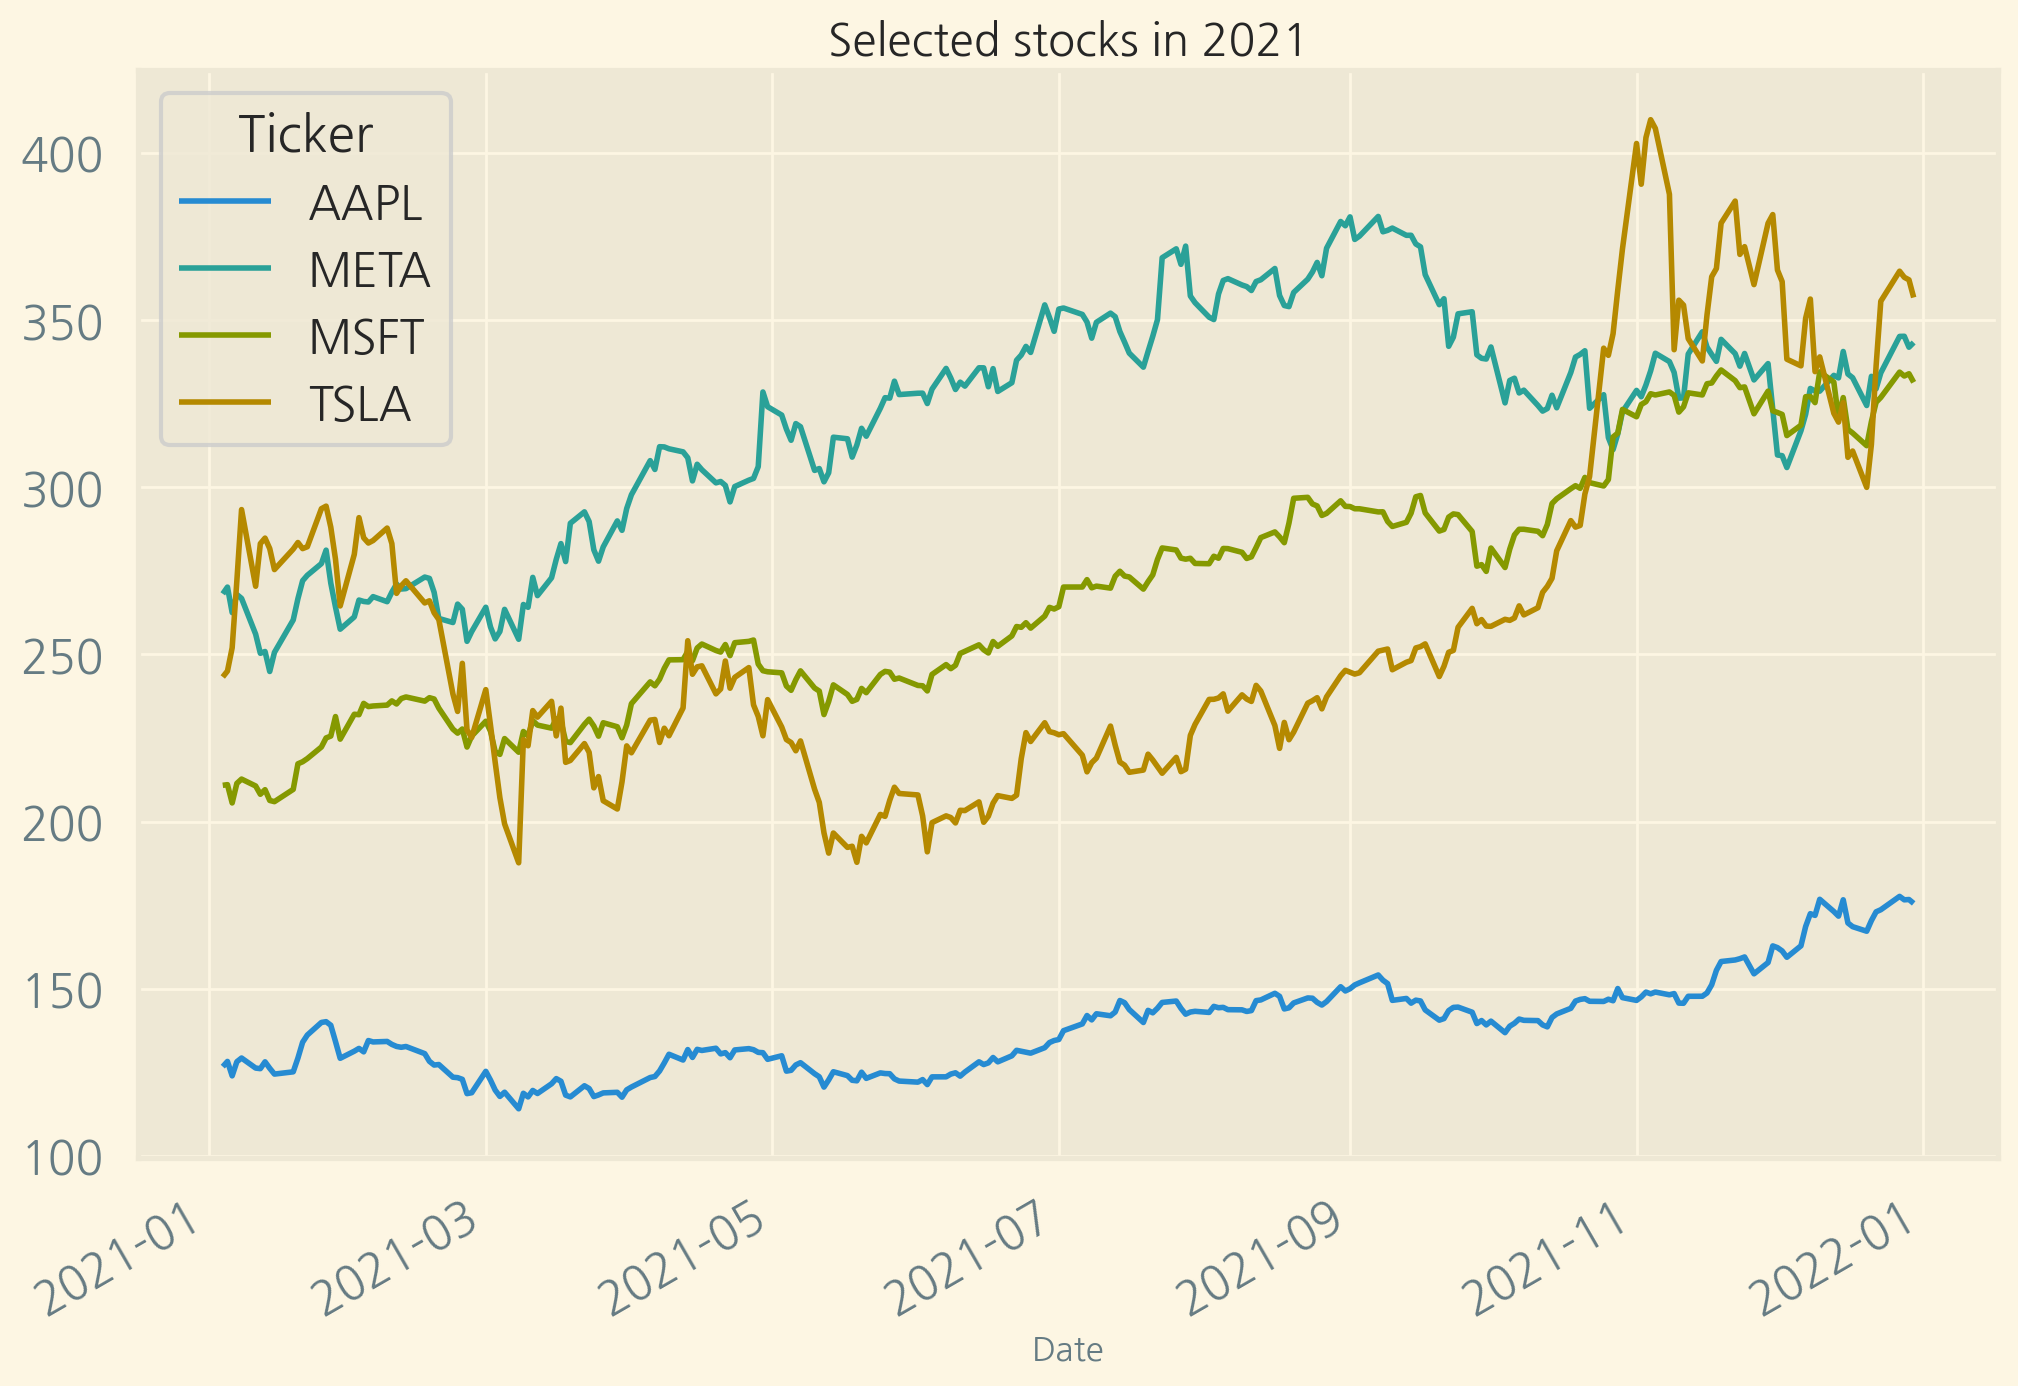

In [112]:
prices_df["Adj Close"].plot(title="Selected stocks in 2021");

4. Calculate annualized average returns and the corresponding standard deviation:

주가를 다운로드한 후, `pct_change` 메서드를 사용해 단순 수익률을 계산하고, 첫 번째 행을 삭제하여 결측값을 제거합니다.

잠재적인 포트폴리오를 평가하기 위해, 평균(기대) 연간 수익률과 해당하는 공분산 행렬을 계산합니다. 이는 데이터프레임의 `mean` 및 `cov` 메서드를 사용하여 얻습니다. 두 메트릭 모두 연간화하기 위해 연간 평균 거래일 수인 252를 곱합니다.

공분산 행렬을 사용하는 이유는 포트폴리오 변동성을 계산할 때 자산 간 상관관계를 고려해야 하기 때문입니다. 상당한 분산 투자 혜택을 얻으려면 자산들이 낮은 양의 상관관계나 음의 상관관계를 가져야 합니다.

In [113]:
# 주가의 일일 수익률을 계산하고, 결측값을 제거합니다.
returns_df = prices_df["Adj Close"].pct_change().dropna()

# 일일 수익률의 평균을 계산하고, 연간화하기 위해 252를 곱합니다.
avg_returns = returns_df.mean() * N_DAYS

# 일일 수익률의 공분산 행렬을 계산하고, 연간화하기 위해 252를 곱습니다.
cov_mat = returns_df.cov() * N_DAYS

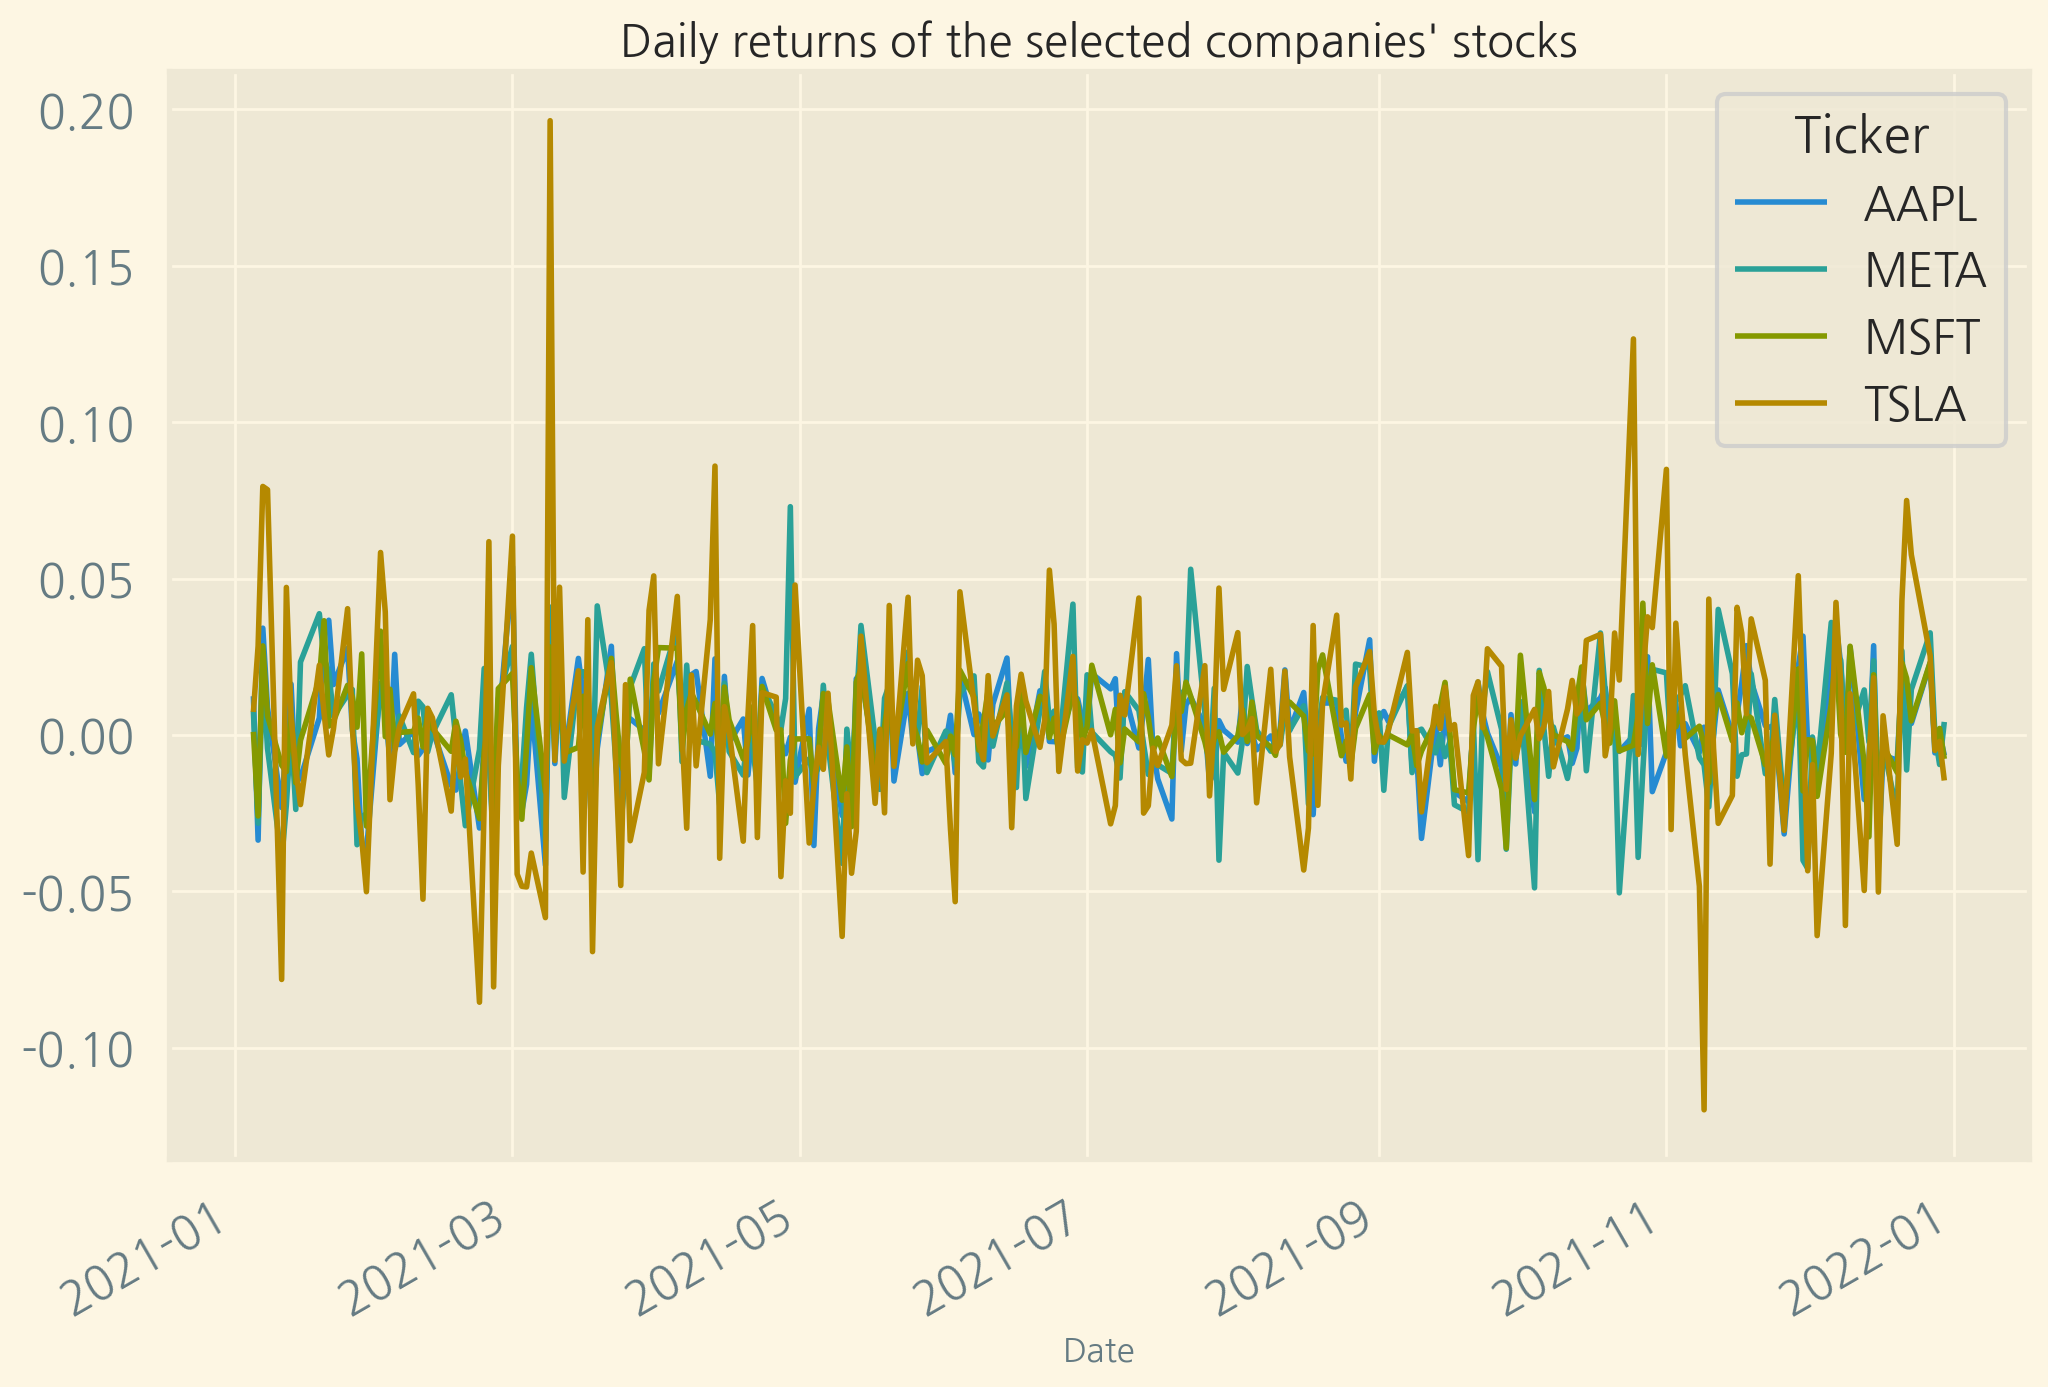

In [114]:
returns_df.plot(title="Daily returns of the selected companies' stocks");

5. Simulate random portfolio weights:

5단계에서는 임의의 포트폴리오 가중치를 계산합니다. 현대 포트폴리오 이론의 가정을 따르기 위해, 가중치는 양수이고 합계가 1이어야 합니다. 이를 위해 `np.random.random`을 사용해 0과 1 사이의 난수를 생성한 행렬을 만듭니다. 이 행렬의 크기는 `N_SIMULATIONS` x `n_assets`입니다. 가중치의 합계가 1이 되도록 하기 위해, 행렬의 각 행을 합계로 나눕니다.


In [115]:
# 난수 생성을 위한 시드 값을 설정합니다. 이렇게 하면 결과가 재현 가능해집니다.
np.random.seed(42)

# N_PORTFOLIOS x n_assets 크기의 난수 행렬을 생성합니다.
weights = np.random.random(size=(N_PORTFOLIOS, n_assets))

# 각 포트폴리오의 가중치 합이 1이 되도록 정규화합니다.
weights /=  np.sum(weights, axis=1)[:, np.newaxis]

6. Calculate the portfolio metrics:

6단계에서는 포트폴리오 지표인 수익률, 표준편차, 샤프 비율을 계산합니다. 예상 연간 포트폴리오 수익률을 계산하기 위해, 가중치를 이전에 계산한 연간 평균과 곱해야 합니다. 표준편차를 계산하려면 다음 공식을 사용해야 합니다: $ \omega^T \Sigma \omega $, 여기서 $ \omega $는 가중치 벡터, $ \Sigma $는 역사적 공분산 행렬입니다. 모든 시뮬레이션된 포트폴리오를 `for` 루프를 사용해 반복합니다.

이 경우, `for` 루프 구현은 벡터화된 행렬 방식보다 실제로 더 빠릅니다: `np.diag(np.sqrt(np.dot(weights, np.dot(cov_mat, weights.T))))`. 이유는 계산해야 하는 비대각 요소의 수가 급격히 증가하기 때문이며, 이는 관심 있는 메트릭에는 중요하지 않기 때문입니다. 이 접근 방식은 시뮬레이션 수가 비교적 적은 경우(~100)에서 `for` 루프보다 빠릅니다.

이 예에서는 무위험 수익률이 0%라고 가정하므로, 포트폴리오 수익률을 포트폴리오의 변동성으로 나누어 샤프 비율을 계산할 수 있습니다. 또 다른 가능한 접근 방식은 2021년 동안의 평균 연간 초과 수익률을 계산하여 비율을 계산하는 것입니다.

최적의 자산 배분을 찾고 그 성과를 평가할 때 유념해야 할 점은 과거의 데이터를 기반으로 최적화를 한다는 것입니다. 과거 성과를 사용해 가장 잘 작동할 것으로 예상되는 배분을 선택하지만, 시장 상황이 변하지 않는다고 가정합니다. 이는 우리가 잘 알고 있듯이, 거의 항상 그렇지 않기 때문에 과거 성과가 미래 성과를 반드시 예측하지는 않습니다.


In [116]:
# 포트폴리오의 예상 수익률을 계산합니다.
# 각 포트폴리오의 가중치와 평균 수익률을 곱하여 포트폴리오 수익률을 구합니다.
portf_rtns = np.dot(weights, avg_returns)

# 포트폴리오의 변동성을 저장할 리스트를 초기화합니다.
portf_vol = []

# 각 포트폴리오에 대해 변동성을 계산합니다.
for i in range(0, len(weights)):
    # 포트폴리오의 변동성을 계산하기 위해 가중치와 공분산 행렬을 사용합니다.
    vol = np.sqrt(
        np.dot(weights[i].T, np.dot(cov_mat, weights[i]))
    )
    # 계산된 변동성을 리스트에 추가합니다.
    portf_vol.append(vol)

# 리스트를 numpy 배열로 변환합니다.
portf_vol = np.array(portf_vol)  

# 포트폴리오의 샤프 비율을 계산합니다.
# 샤프 비율은 포트폴리오 수익률을 포트폴리오 변동성으로 나눈 값입니다.
portf_sharpe_ratio = portf_rtns / portf_vol

7. Create a DataFrame containing all the data: 

마지막 세 단계는 결과 시각화로 이어집니다. 먼저, 모든 관련 메트릭을 포함한 배열을 `pandas` 데이터프레임에 넣습니다. 

In [117]:
portf_results_df = pd.DataFrame(
    {"returns": portf_rtns,
     "volatility": portf_vol,
     "sharpe_ratio": portf_sharpe_ratio}
)
portf_results_df

returns  volatility  sharpe_ratio
0      0.407769    0.248552      1.640581
1      0.479159    0.418742      1.144282
2      0.413868    0.315844      1.310355
3      0.387857    0.237020      1.636392
4      0.402849    0.238890      1.686337
...         ...         ...           ...
99995  0.381660    0.227383      1.678488
99996  0.457363    0.338754      1.350130
99997  0.386712    0.215390      1.795406
99998  0.434947    0.263307      1.651859
99999  0.428804    0.241888      1.772740

[100000 rows x 3 columns]

8. Locate the points creating the Efficient Frontier:

둘째, 효율적 프론티어의 점을 식별합니다. 이를 위해 샘플에서 예상 수익률의 배열을 생성합니다. `np.linspace`를 사용해 계산을 매끄럽게 하기 위해 포트폴리오 수익률의 최소값과 최대값으로 값을 조정합니다. 각 예상 수익률에 대해, 최소 관찰된 변동성을 찾습니다. 같은 간격의 점이 있는 경우처럼 일치하는 값이 없을 때는 해당 지점을 건너뜁니다.

In [118]:
# 효율적 프론티어를 그리기 위해 사용할 점의 수를 설정합니다.
N_POINTS = 100

# 효율적 프론티어의 예상 수익률과 변동성을 저장할 리스트를 초기화합니다.
ef_rtn_list = []
ef_vol_list = []

# 포트폴리오 수익률의 최소값과 최대값 사이에서 N_POINTS 개의 점을 생성합니다.
possible_ef_rtns = np.linspace(
    portf_results_df["returns"].min(), 
    portf_results_df["returns"].max(), 
    N_POINTS
)
# 생성된 예상 수익률과 포트폴리오 수익률을 소수점 둘째 자리까지 반올림합니다.
possible_ef_rtns = np.round(possible_ef_rtns, 2)    
portf_rtns = np.round(portf_rtns, 2)

# 각 예상 수익률에 대해, 포트폴리오 수익률과 일치하는지 확인합니다.
for rtn in possible_ef_rtns:
    if rtn in portf_rtns:
        # 일치하는 경우, 해당 수익률을 효율적 프론티어 수익률 리스트에 추가합니다.
        ef_rtn_list.append(rtn)
        # 일치하는 인덱스를 찾습니다.
        matched_ind = np.where(portf_rtns == rtn)
        # 해당 인덱스에서 최소 변동성을 찾아 효율적 프론티어 변동성 리스트에 추가합니다.
        ef_vol_list.append(np.min(portf_vol[matched_ind]))

9. Plot the Efficient Frontier:

마지막 단계에서는 시뮬레이션된 포트폴리오, 개별 자산, 그리고 근사된 효율적 프론티어를 하나의 그래프에 플로팅합니다. 프론티어의 모양은 약간 울퉁불퉁하며, 이는 일부 극단적인 영역에서 자주 발생하지 않는 시뮬레이션된 값만 사용할 때 발생할 수 있습니다. 또한, 샤프 비율 값을 기준으로 시뮬레이션된 포트폴리오를 나타내는 점들의 색상을 지정합니다. 샤프 비율 정의에 따라 그래프의 왼쪽 위에 가장 높은 예상 수익률 대비 예상 변동성이 있는 최적의 지점을 나타냅니다.

사용 가능한 컬러맵은 `matplotlib` 문서에서 찾을 수 있습니다. 문제에 따라 순차적, 발산적, 질적인 등 다른 컬러맵이 더 적합할 수 있습니다.

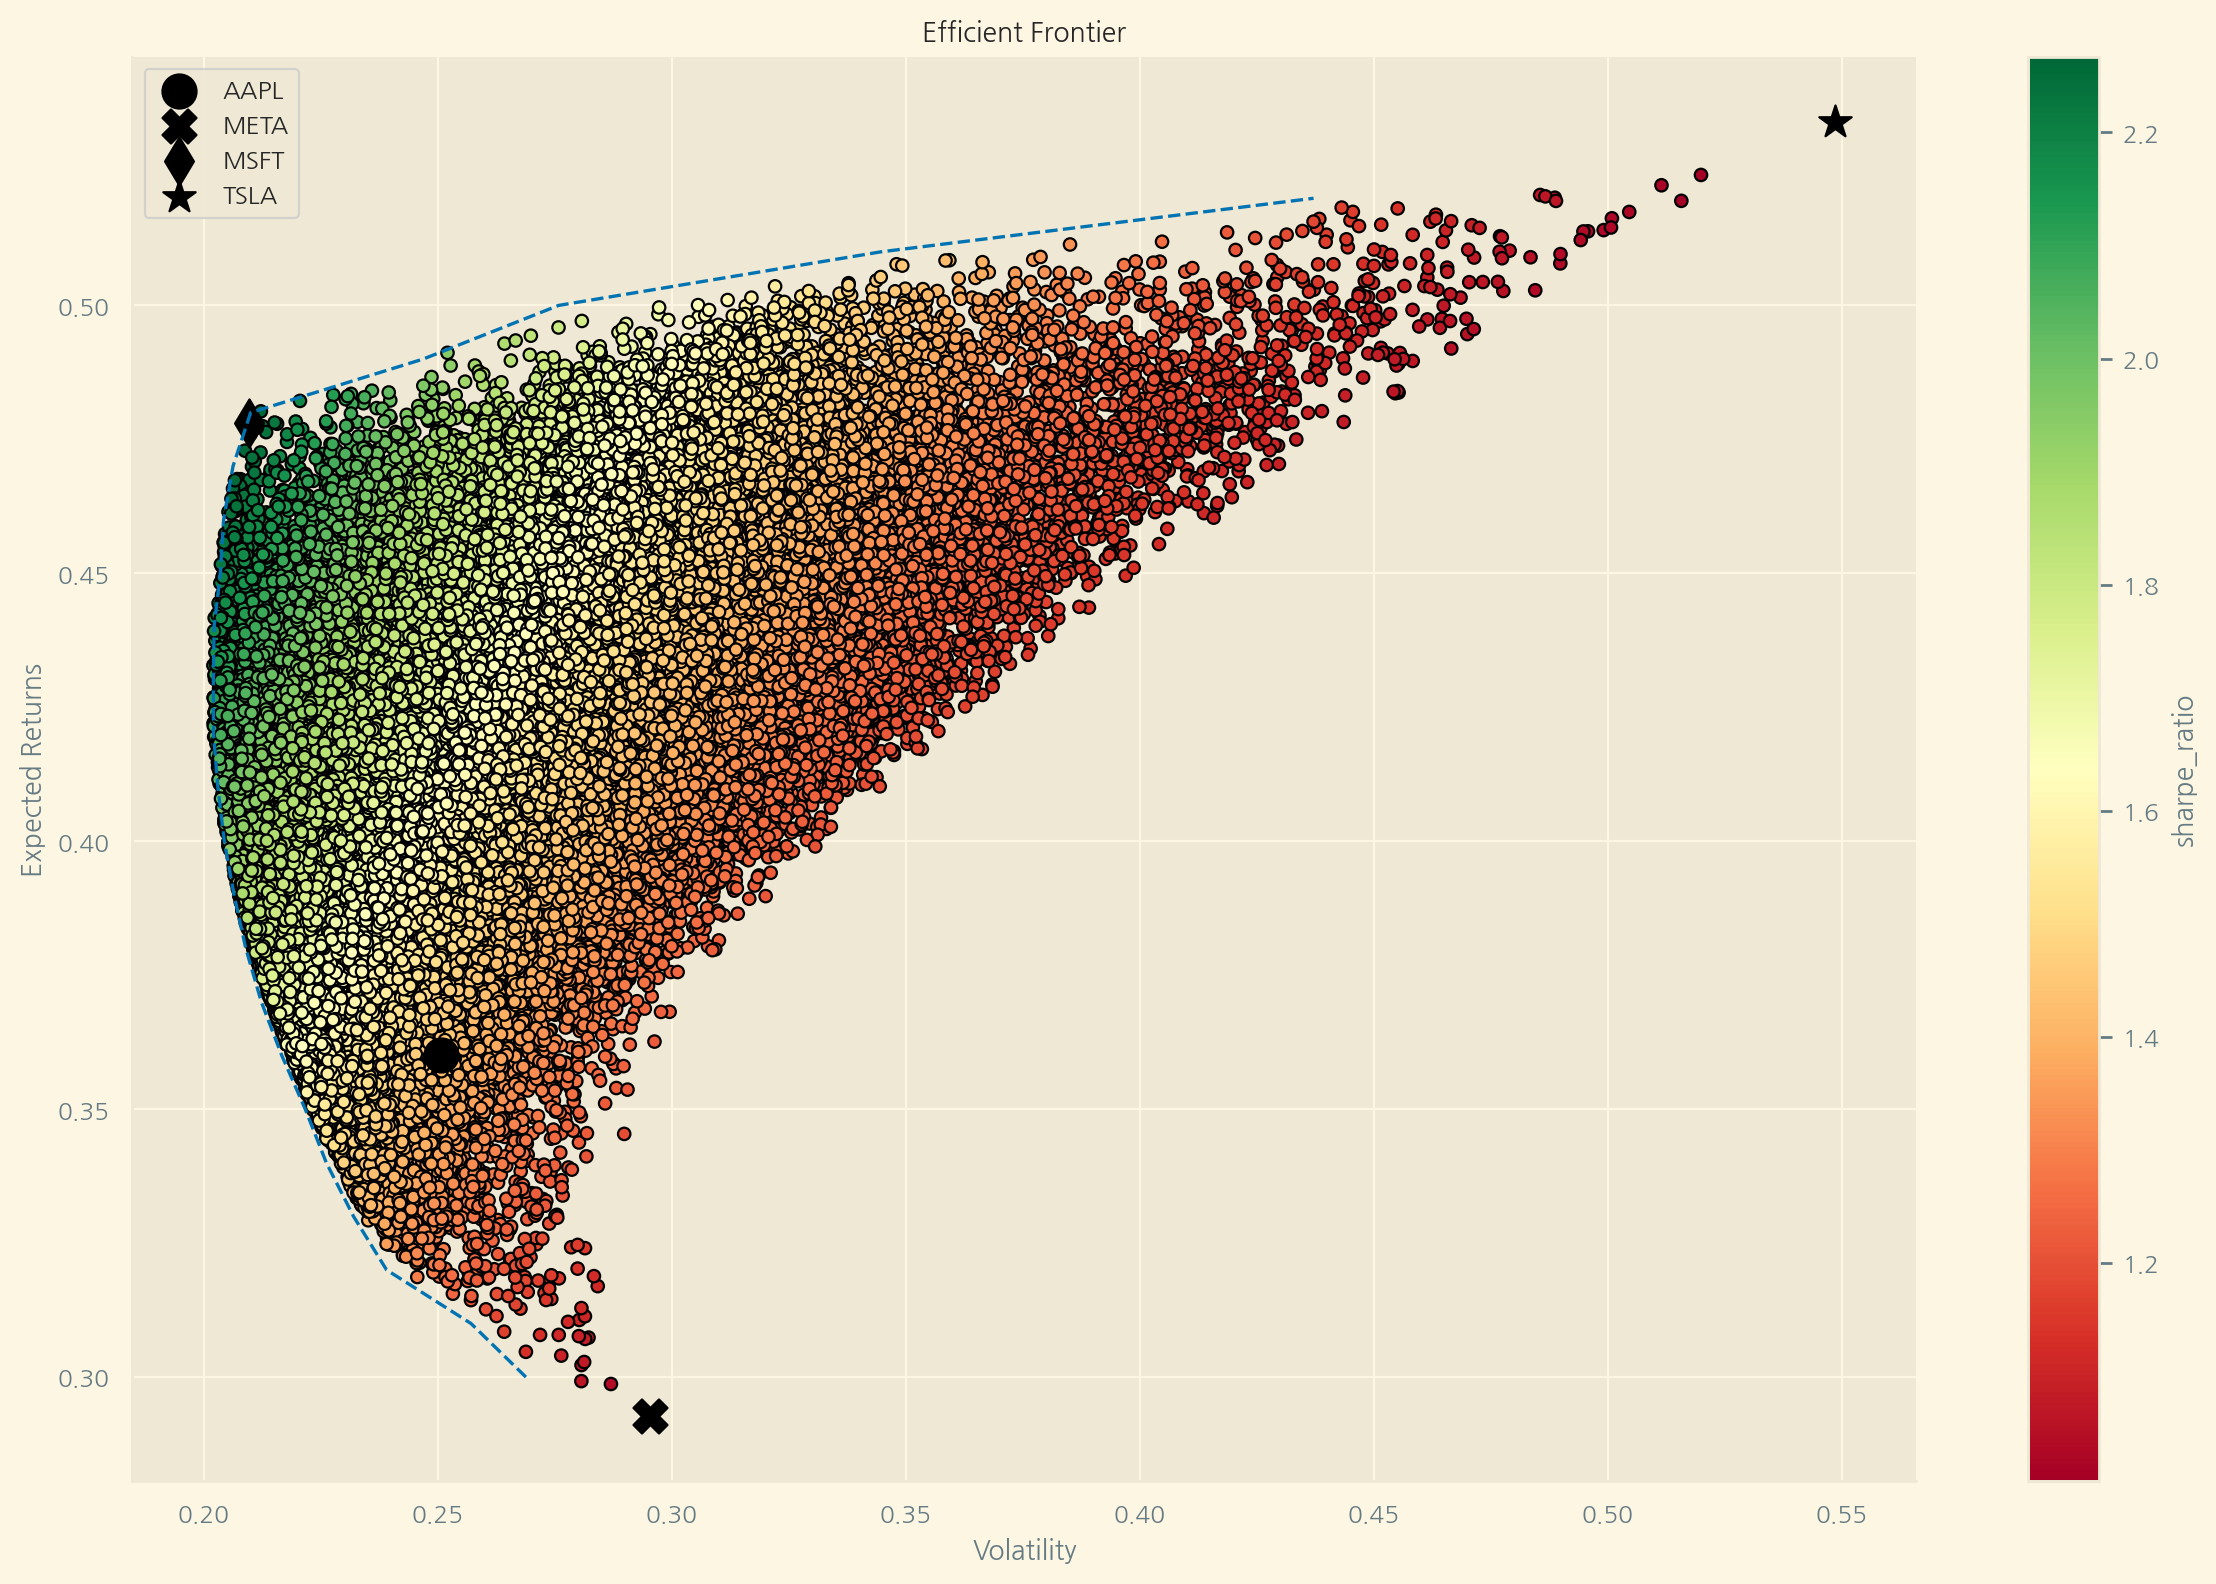

In [119]:
# 자산을 나타내는 마커의 리스트를 정의합니다.
MARKERS = ["o", "X", "d", "*"]

# seaborn의 plotting_context를 "paper"로 설정하여 그래프의 스타일을 조정합니다.
with sns.plotting_context("paper"):
    # 새로운 figure와 axes를 생성합니다.
    fig, ax = plt.subplots()
    
    # 포트폴리오 결과 데이터프레임을 산점도로 플로팅합니다.
    portf_results_df.plot(kind="scatter", x="volatility", 
                          y="returns", c="sharpe_ratio",
                          cmap="RdYlGn", edgecolors="black", 
                          ax=ax)
    
    # x축과 y축의 라벨 및 그래프의 제목을 설정합니다.
    ax.set(xlabel="Volatility", 
           ylabel="Expected Returns", 
           title="Efficient Frontier")
    
    # 효율적 프론티어를 파란색 점선으로 플로팅합니다.
    ax.plot(ef_vol_list, ef_rtn_list, "b--")
    
    # 각 자산에 대해 산점도를 추가합니다.
    for asset_index in range(n_assets):
        ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]), 
                   y=avg_returns[asset_index], 
                   marker=MARKERS[asset_index], 
                   s=150, color="black",
                   label=ASSETS[asset_index])
    
    # 범례를 추가합니다.
    ax.legend()

    # 그래프의 테두리를 제거합니다.
    sns.despine()
    
    # 레이아웃을 조정하여 그래프가 잘 맞도록 합니다.
    plt.tight_layout()
    # 그래프를 파일로 저장하는 코드 (현재 주석 처리됨)
    # plt.savefig("images/figure_11_10", dpi=200)

Figure 11.10: The efficient frontier identified using Monte Carlo simulations

**Figure 11.10에서 우리는 효율적 프론티어의 전형적인 총알 모양을 볼 수 있습니다.**

효율적 프론티어를 분석하여 얻을 수 있는 몇 가지 통찰은 다음과 같습니다:
- 효율적 프론티어의 선 왼쪽에 있는 것은 달성할 수 없습니다. 그러한 변동성 수준에서 그 정도의 예상 수익률을 얻을 수 없기 때문입니다.
- 마이크로소프트 주식만으로 구성된 포트폴리오의 성과는 효율적 프론티어에 매우 가깝게 위치합니다.

이상적으로, 우리는 개별 자산의 표준편차보다 낮은 결합 표준편차를 가지면서도 예외적인 수익률을 제공하는 포트폴리오를 찾아야 합니다. 예를 들어, 메타의 주식만으로 구성된 포트폴리오(이는 효율적이지 않습니다)를 고려하기보다는, 프론티어 바로 위에 있는 포트폴리오를 선택해야 합니다. 이는 후자가 동일한 예상 변동성 수준에서 훨씬 더 나은 예상 수익률을 제공하기 때문입니다.

### There's more

In [120]:
from chapter_11_utils import print_portfolio_summary

100,000개의 랜덤 포트폴리오를 시뮬레이션한 후, 샤프 비율이 가장 높은 포트폴리오(위험 단위당 최대 예상 수익률, 즉 접선 포트폴리오라고도 함)나 최소 변동성을 가진 포트폴리오를 조사할 수 있습니다. 이러한 포트폴리오를 시뮬레이션된 포트폴리오 중에서 찾기 위해, 배열에서 최소값/최대값의 인덱스를 반환하는 `np.argmin` 및 `np.argmax` 함수를 사용합니다. 코드는 다음과 같습니다:

In [121]:
# 샤프 비율이 가장 높은 포트폴리오의 인덱스를 찾습니다.
max_sharpe_ind = np.argmax(portf_results_df["sharpe_ratio"])
# 해당 인덱스를 사용하여 샤프 비율이 가장 높은 포트폴리오를 가져옵니다.
max_sharpe_portf = portf_results_df.loc[max_sharpe_ind]

# 변동성이 가장 낮은 포트폴리오의 인덱스를 찾습니다.
min_vol_ind = np.argmin(portf_results_df["volatility"])
# 해당 인덱스를 사용하여 변동성이 가장 낮은 포트폴리오를 가져옵니다.
min_vol_portf = portf_results_df.loc[min_vol_ind]

In [122]:
print_portfolio_summary(max_sharpe_portf, 
                        weights[max_sharpe_ind], 
                        ASSETS, 
                        name="Maximum Sharpe Ratio")

Maximum Sharpe Ratio portfolio ----
Performance
returns: 47.60% volatility: 21.00% sharpe_ratio: 226.65% 
Weights
AAPL: 1.72% META: 1.25% MSFT: 93.01% TSLA: 4.01% 

이 포트폴리오들의 구성 요소와 예상 성과도 조사할 수 있습니다. 여기서는 결과에만 초점을 맞추지만, 요약을 생성하는 데 사용된 코드는 책의 GitHub 저장소에서 확인할 수 있습니다. 샤프 비율이 가장 높은 포트폴리오는 대부분의 자원(~95%)을 마이크로소프트에 할당하고, 트위터에는 거의 아무것도 할당하지 않습니다. 이는 2021년 트위터의 연간 평균 수익률이 음수였기 때문입니다.

In [123]:
print_portfolio_summary(min_vol_portf, 
                        weights[min_vol_ind], 
                        ASSETS, 
                        name="Minimum Volatility")

Minimum Volatility portfolio ----
Performance
returns: 43.28% volatility: 20.21% sharpe_ratio: 214.20% 
Weights
AAPL: 16.19% META: 14.29% MSFT: 68.99% TSLA: 0.53% 

마지막으로, 이 두 포트폴리오를 효율적 프론티어 그래프에 표시합니다. 이를 위해 선택된 포트폴리오에 해당하는 각 하나의 점을 포함한 두 개의 추가 산점도를 추가합니다. 그런 다음 `marker` 인수를 사용해 마커 모양을 정의하고, `s` 인수를 사용해 마커 크기를 설정합니다. 다른 모든 점들 사이에서 포트폴리오를 더 잘 보이게 하기 위해 마커의 크기를 늘립니다. 코드는 다음과 같습니다:

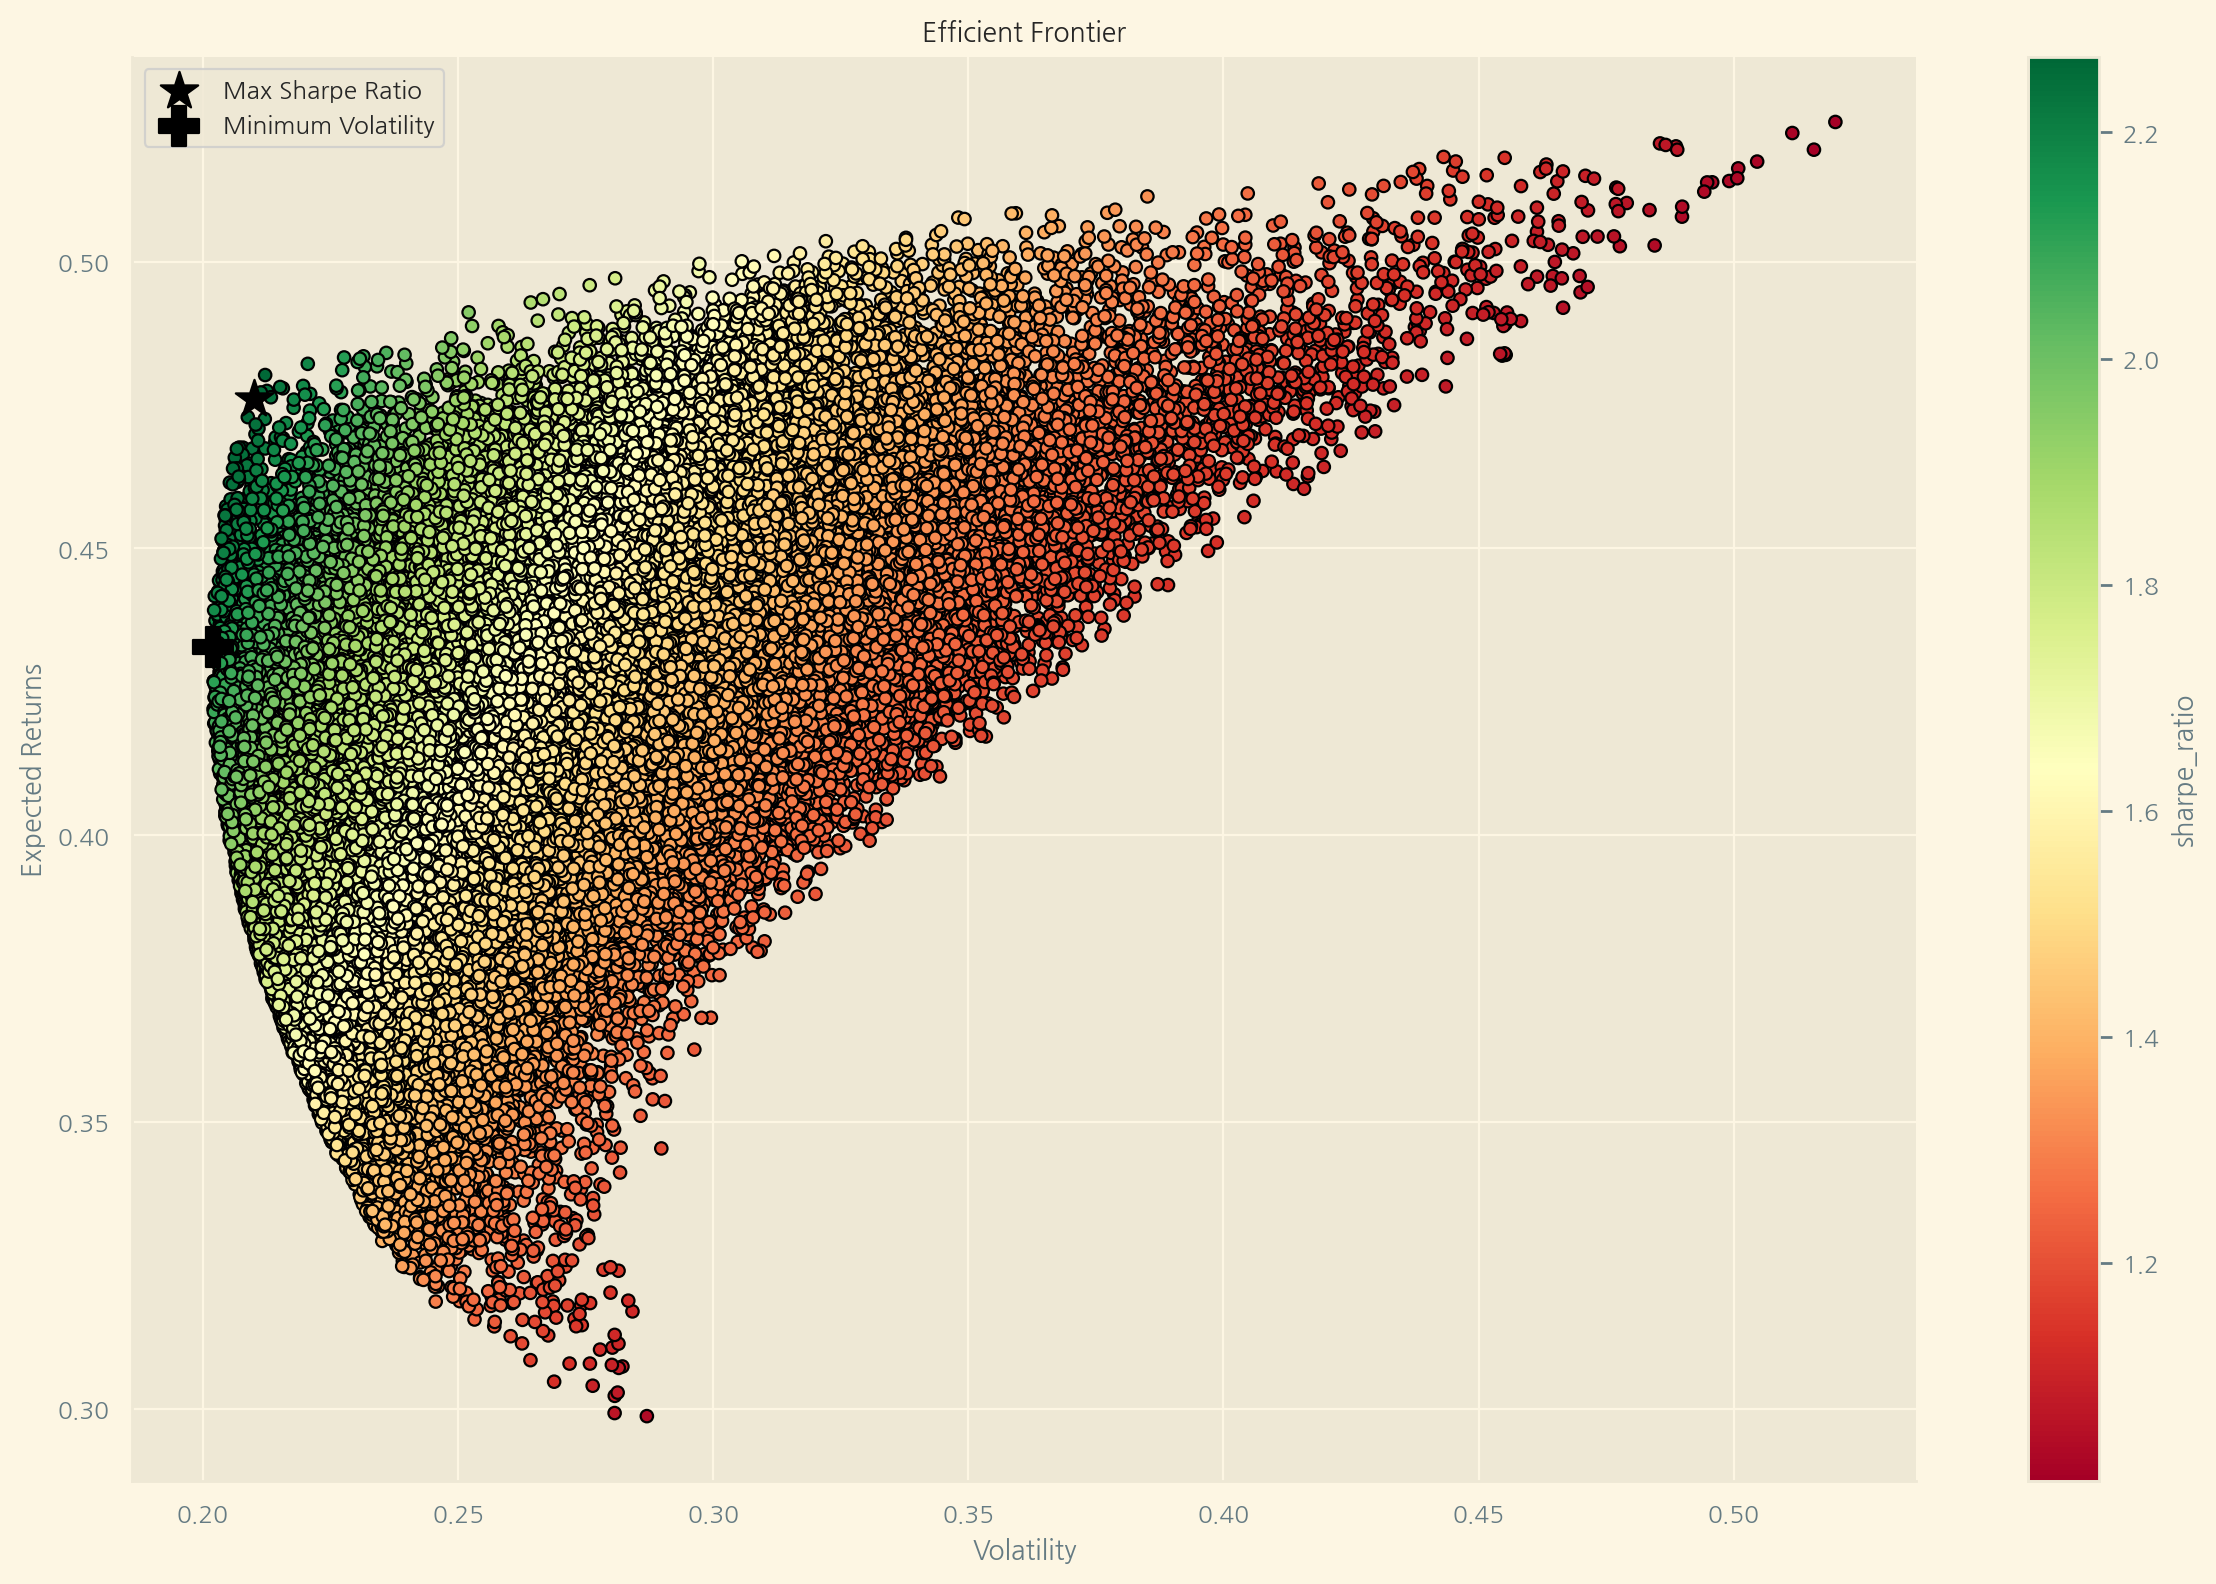

In [124]:
with sns.plotting_context("paper"):
    fig, ax = plt.subplots()
    portf_results_df.plot(kind="scatter", x="volatility", 
                          y="returns", c="sharpe_ratio",
                          cmap="RdYlGn", edgecolors="black", 
                          ax=ax)
    ax.scatter(x=max_sharpe_portf.volatility, 
               y=max_sharpe_portf.returns, 
               c="black", marker="*", 
               s=200, label="Max Sharpe Ratio")
    ax.scatter(x=min_vol_portf.volatility, 
               y=min_vol_portf.returns, 
               c="black", marker="P", 
               s=200, label="Minimum Volatility")
    ax.set(xlabel="Volatility", ylabel="Expected Returns", 
           title="Efficient Frontier")
    ax.legend()

    sns.despine()
    plt.tight_layout()
    # plt.savefig("images/figure_11_11", dpi=200)

Figure 11.11: Efficient frontier with the Global Minimum Volatility and Max Sharpe Ratio portfolios 

그래프가 너무 복잡해지는 것을 피하기 위해 개별 자산과 효율적 프론티어 선을 그리지 않았습니다. 이 그래프는 Figure 11.10을 분석하면서 얻은 직관과 일치합니다. 첫째, 최소 변동성 포트폴리오는 프론티어의 가장 왼쪽에 위치하며, 이는 가장 낮은 예상 변동성에 해당합니다. 둘째, 최대 샤프 비율 포트폴리오는 그래프의 왼쪽 상단에 위치하며, 이곳은 예상 수익률과 변동성의 비율이 가장 높은 지점입니다.

## 11.3 Finding the efficient frontier using optimization with `scipy`

**SciPy를 사용한 최적화를 통해 효율적 프론티어 찾기**

이전 방법에서는 몬테카를로 시뮬레이션을 기반으로 한 브루트 포스 접근 방식을 사용하여 효율적 프론티어를 시각화했습니다. 이번 방법에서는 더 정교한 방법을 사용하여 프론티어를 찾습니다.

정의에 따르면, 효율적 프론티어는 특정 변동성 수준에 대해 가장 높은 예상 포트폴리오 수익률을 제공하거나, 특정 예상 수익률 수준에 대해 가장 낮은 리스크(변동성)를 제공하는 포트폴리오 집합으로 구성됩니다. 우리는 이 사실을 활용하여 수치 최적화에 적용할 수 있습니다.

최적화의 목표는 목표 변수를 조정하고 일부 경계와 제약 조건을 고려하여 목적 함수의 최적(최선)의 값을 찾는 것입니다(이러한 조건은 목표 변수에 영향을 미칩니다). 이 경우, 목적 함수는 포트폴리오 변동성을 반환하는 함수이고, 목표 변수는 포트폴리오 가중치입니다.

수학적으로, 문제는 다음과 같이 표현될 수 있습니다:

$
\text{min } \omega^T \Sigma \omega
$

$
\text{s.t. } \omega^T 1 = 1
$

$
\omega \geq 0
$

$
\omega^T \mu = \mu_p
$

여기서, $\omega$는 가중치 벡터, $\Sigma$는 공분산 행렬, $\mu$는 수익률 벡터, $\mu_p$는 예상 포트폴리오 수익률입니다.

효율적 프론티어를 찾기 위해, 최적의 포트폴리오 가중치를 찾는 최적화 루틴을 예상 포트폴리오 수익률 범위에 걸쳐 반복합니다. 

이번 방법에서는 이전 방법과 동일한 데이터셋을 사용하여 두 접근 방식에서 얻은 결과가 유사함을 보여줍니다.

### Getting Ready

This recipe requires running all the code from the recipe *Finding the Efficient Frontier using Monte Carlo simulations*.

### How to do it...

소개에서 언급했듯이, 이전 방법에서 사용한 예제를 계속 사용합니다. 이를 위해, 필요한 데이터를 모두 갖추기 위해 1단계에서 4단계까지를 실행합니다(간략하게 하기 위해 여기에는 포함하지 않음). 추가 전제조건으로 `SciPy`의 최적화 모듈을 가져옵니다.

1. Import the libraries:

In [125]:
import numpy as np
import scipy.optimize as sco
from chapter_11_utils import print_portfolio_summary

2. Define functions calculating portfolio returns and volatility:

2단계에서는 역사적 데이터와 포트폴리오 가중치가 주어졌을 때 예상 포트폴리오 수익률과 변동성을 반환하는 두 개의 함수를 정의합니다. 이러한 함수들은 메트릭을 직접 계산하는 대신 정의해야 하며, 최적화 과정에서 반복적으로 가중치를 변경하면서 목표 변수(가중치)의 현재 값을 사용할 수 있어야 하기 때문입니다. 알고리즘은 최적화하려는 메트릭에 대해 반복적으로 다양한 가중치를 시도합니다.


In [126]:
def get_portf_rtn(w, avg_rtns):
    # 주어진 가중치 벡터(w)와 평균 수익률 벡터(avg_rtns)를 사용하여 포트폴리오의 예상 수익률을 계산합니다.
    return np.sum(avg_rtns * w)

def get_portf_vol(w, avg_rtns, cov_mat):
    # 주어진 가중치 벡터(w)와 공분산 행렬(cov_mat)을 사용하여 포트폴리오의 변동성을 계산합니다.
    # np.dot을 사용하여 가중치 벡터와 공분산 행렬을 곱한 후, 다시 가중치 벡터와 곱하여 변동성을 계산합니다.
    return np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))

3. Define the function calculating the efficient frontier:

3단계에서는 `get_efficient_frontier`라는 함수를 정의합니다. 이 함수의 목표는 역사적 메트릭과 고려된 예상 포트폴리오 수익률 범위가 주어졌을 때, 효율적인 포트폴리오 목록을 반환하는 것입니다. 이는 이 방법의 가장 중요한 단계이며, 많은 세부 사항이 포함되어 있습니다. 함수의 논리는 다음과 같이 순차적으로 설명됩니다:

1. 함수는 고려된 범위 내의 각 예상 포트폴리오 수익률에 대해 최적화 절차를 실행하고, 결과로 나온 최적의 포트폴리오를 목록에 저장합니다.
2. `for` 루프 외부에서는 최적화기에 전달할 몇 개의 객체를 정의합니다:
   - 목적 함수에 전달되는 인수들입니다. 이 경우, 이는 역사적 평균 수익률과 공분산 행렬입니다. 최적화할 함수는 이 인수를 받아야 합니다. 따라서 `get_portf_vol` 함수(2단계에서 정의함)는 반환 값을 목적 함수에 전달하지만, 이는 계산에 필요하지 않으며 함수 내에서는 사용되지 않습니다.
   - 각 목표 변수(가중치)에 대한 경계(`bounds`, 중첩된 튜플)를 정의하여 허용 가능한 최소값과 최대값을 포함하는 튜플을 제공합니다. 이 경우, 값의 범위는 0에서 1 사이입니다(현대 포트폴리오 이론에 따라 음수 가중치가 없음).
   - 초기 추정치(`initial_guess`), 즉 목표 변수의 초기 추정치입니다. 초기 추정치를 사용하는 목적은 최적화가 더 빠르고 효율적으로 수행되도록 하기 위함입니다. 이 경우, 추정치는 균등 가중 배분입니다.
3. `for` 루프 내부에서는 최적화에 사용되는 마지막 요소인 제약 조건을 정의합니다. 두 가지 제약 조건을 정의합니다:
   - 예상 포트폴리오 수익률이 제공된 값과 동일해야 합니다.
   - 가중치의 합이 1이어야 합니다.

첫 번째 제약 조건은 루프 내에서 제약 조건의 튜플이 정의되는 이유입니다. 이는 루프가 고려된 예상 포트폴리오 수익률 범위를 거치며, 각 값에 대해 최적의 리스크 수준을 찾기 때문입니다.

4. 우리는 일반적인 최소화 문제에 자주 사용되는 Sequential Least-Squares Programming(SLSQP) 알고리즘을 사용하여 최적화기를 실행합니다. 최소화할 함수로는 이전에 정의한 `get_portfolio_vol` 함수를 전달합니다.

최적화기는 `eq` 제약 조건을 0으로 설정합니다. 이것이 바로 `np.sum(weights) == 1`이라는 의도된 제약 조건이 `np.sum(weights) - 1 == 0`으로 표현되는 이유입니다.


In [127]:
def get_efficient_frontier(avg_rtns, cov_mat, rtns_range):
    # 효율적 프론티어를 계산하는 함수입니다.
    
    efficient_portfolios = []  # 효율적 포트폴리오를 저장할 리스트입니다.
    
    n_assets = len(avg_rtns)  # 자산의 개수를 계산합니다.
    args = (avg_rtns, cov_mat)  # 최적화 함수에 전달할 인수입니다.
    bounds = tuple((0,1) for asset in range(n_assets))  # 각 자산의 가중치가 0과 1 사이에 있도록 경계를 설정합니다.
    initial_guess = n_assets * [1. / n_assets, ]  # 초기 추정치는 모든 자산에 대해 동일한 가중치를 가집니다.
    
    for ret in rtns_range:  # 주어진 수익률 범위에 대해 반복합니다.
        constr = (
            {"type": "eq", 
             "fun": lambda x: get_portf_rtn(x, avg_rtns) - ret},  # 예상 포트폴리오 수익률이 주어진 값과 같아야 합니다.
            {"type": "eq", 
             "fun": lambda x: np.sum(x) - 1}  # 모든 자산의 가중치 합이 1이어야 합니다.
        )
        ef_portf = sco.minimize(get_portf_vol, 
                                initial_guess, 
                                args=args, 
                                method="SLSQP", 
                                constraints=constr,
                                bounds=bounds)  # SLSQP 알고리즘을 사용하여 최적화합니다.
        efficient_portfolios.append(ef_portf)  # 최적화된 포트폴리오를 리스트에 추가합니다.
    
    return efficient_portfolios  # 효율적 포트폴리오 목록을 반환합니다.

SLSQP(Sequential Least Squares Quadratic Programming) 알고리즘은 제약 조건이 있는 최적화 문제를 푸는 방법입니다. 목표는 어떤 함수의 값을 최소화하거나 최대화하는 것입니다. 여기서 중요한 점은, 단순히 최적화를 하는 것이 아니라 주어진 제약 조건도 함께 만족시켜야 한다는 것입니다.

SLSQP는 다음과 같은 과정을 거칩니다:

1. **함수 근사**: 처음에 목표 함수와 제약 조건을 간단한 형태로 근사합니다. 보통 2차 함수 형태로 근사하게 됩니다.
2. **최적화 반복**: 현재의 근사된 문제를 해결하여 최적의 값을 찾습니다. 그런 다음, 이 결과를 바탕으로 원래의 문제를 조금 더 잘 근사하도록 조정합니다.
3. **수렴 확인**: 이 과정을 반복하면서 점점 더 나은 해를 찾다가, 어느 시점에서 결과가 크게 변하지 않으면 최종 해로 간주하고 종료합니다.

이 알고리즘은 특히, 제약 조건을 가진 문제를 효율적으로 풀 수 있는 장점이 있습니다.

4. Define the considered range of expected portfolio returns:

In [128]:
rtns_range = np.linspace(-0.1, 0.55, 200)

5. Calculate the Efficient Frontier:

5단계와 6단계에서는 이전 방법에서 경험적으로 관찰된 범위를 기반으로 예상 포트폴리오 수익률의 범위를 정의하고 최적화 함수를 실행합니다.


In [129]:
# 주어진 평균 수익률, 공분산 행렬, 예상 수익률 범위를 사용하여 효율적 프론티어를 계산합니다.
efficient_portfolios = get_efficient_frontier(avg_returns, 
                                              cov_mat, 
                                              rtns_range)

6. Extract the volatilities of the efficient portfolios:

6단계에서는 효율적인 포트폴리오 목록을 순회하여 최적의 변동성을 추출합니다. `scipy.optimize.OptimizeResult` 객체의 `fun` 요소에 접근하여 변동성을 추출합니다(이것이 목적 함수에 해당하며, 이 경우 포트폴리오 변동성입니다).


In [130]:
# 효율적인 포트폴리오 목록에서 변동성을 추출합니다.
# 각 포트폴리오의 변동성은 'fun' 키에 저장되어 있습니다.
vols_range = [x["fun"] for x in efficient_portfolios]

7. Plot the calculated Efficient Frontier, together with the simulated portfolios:

7단계에서는 이전 방법(몬테카를로 시뮬레이션을 사용한 효율적 프론티어 찾기)에서의 플롯 위에 계산된 효율적 프론티어를 추가합니다. 모든 시뮬레이션된 포트폴리오는 효율적 프론티어 상 또는 그 아래에 있으며, 이는 예상한 바입니다.


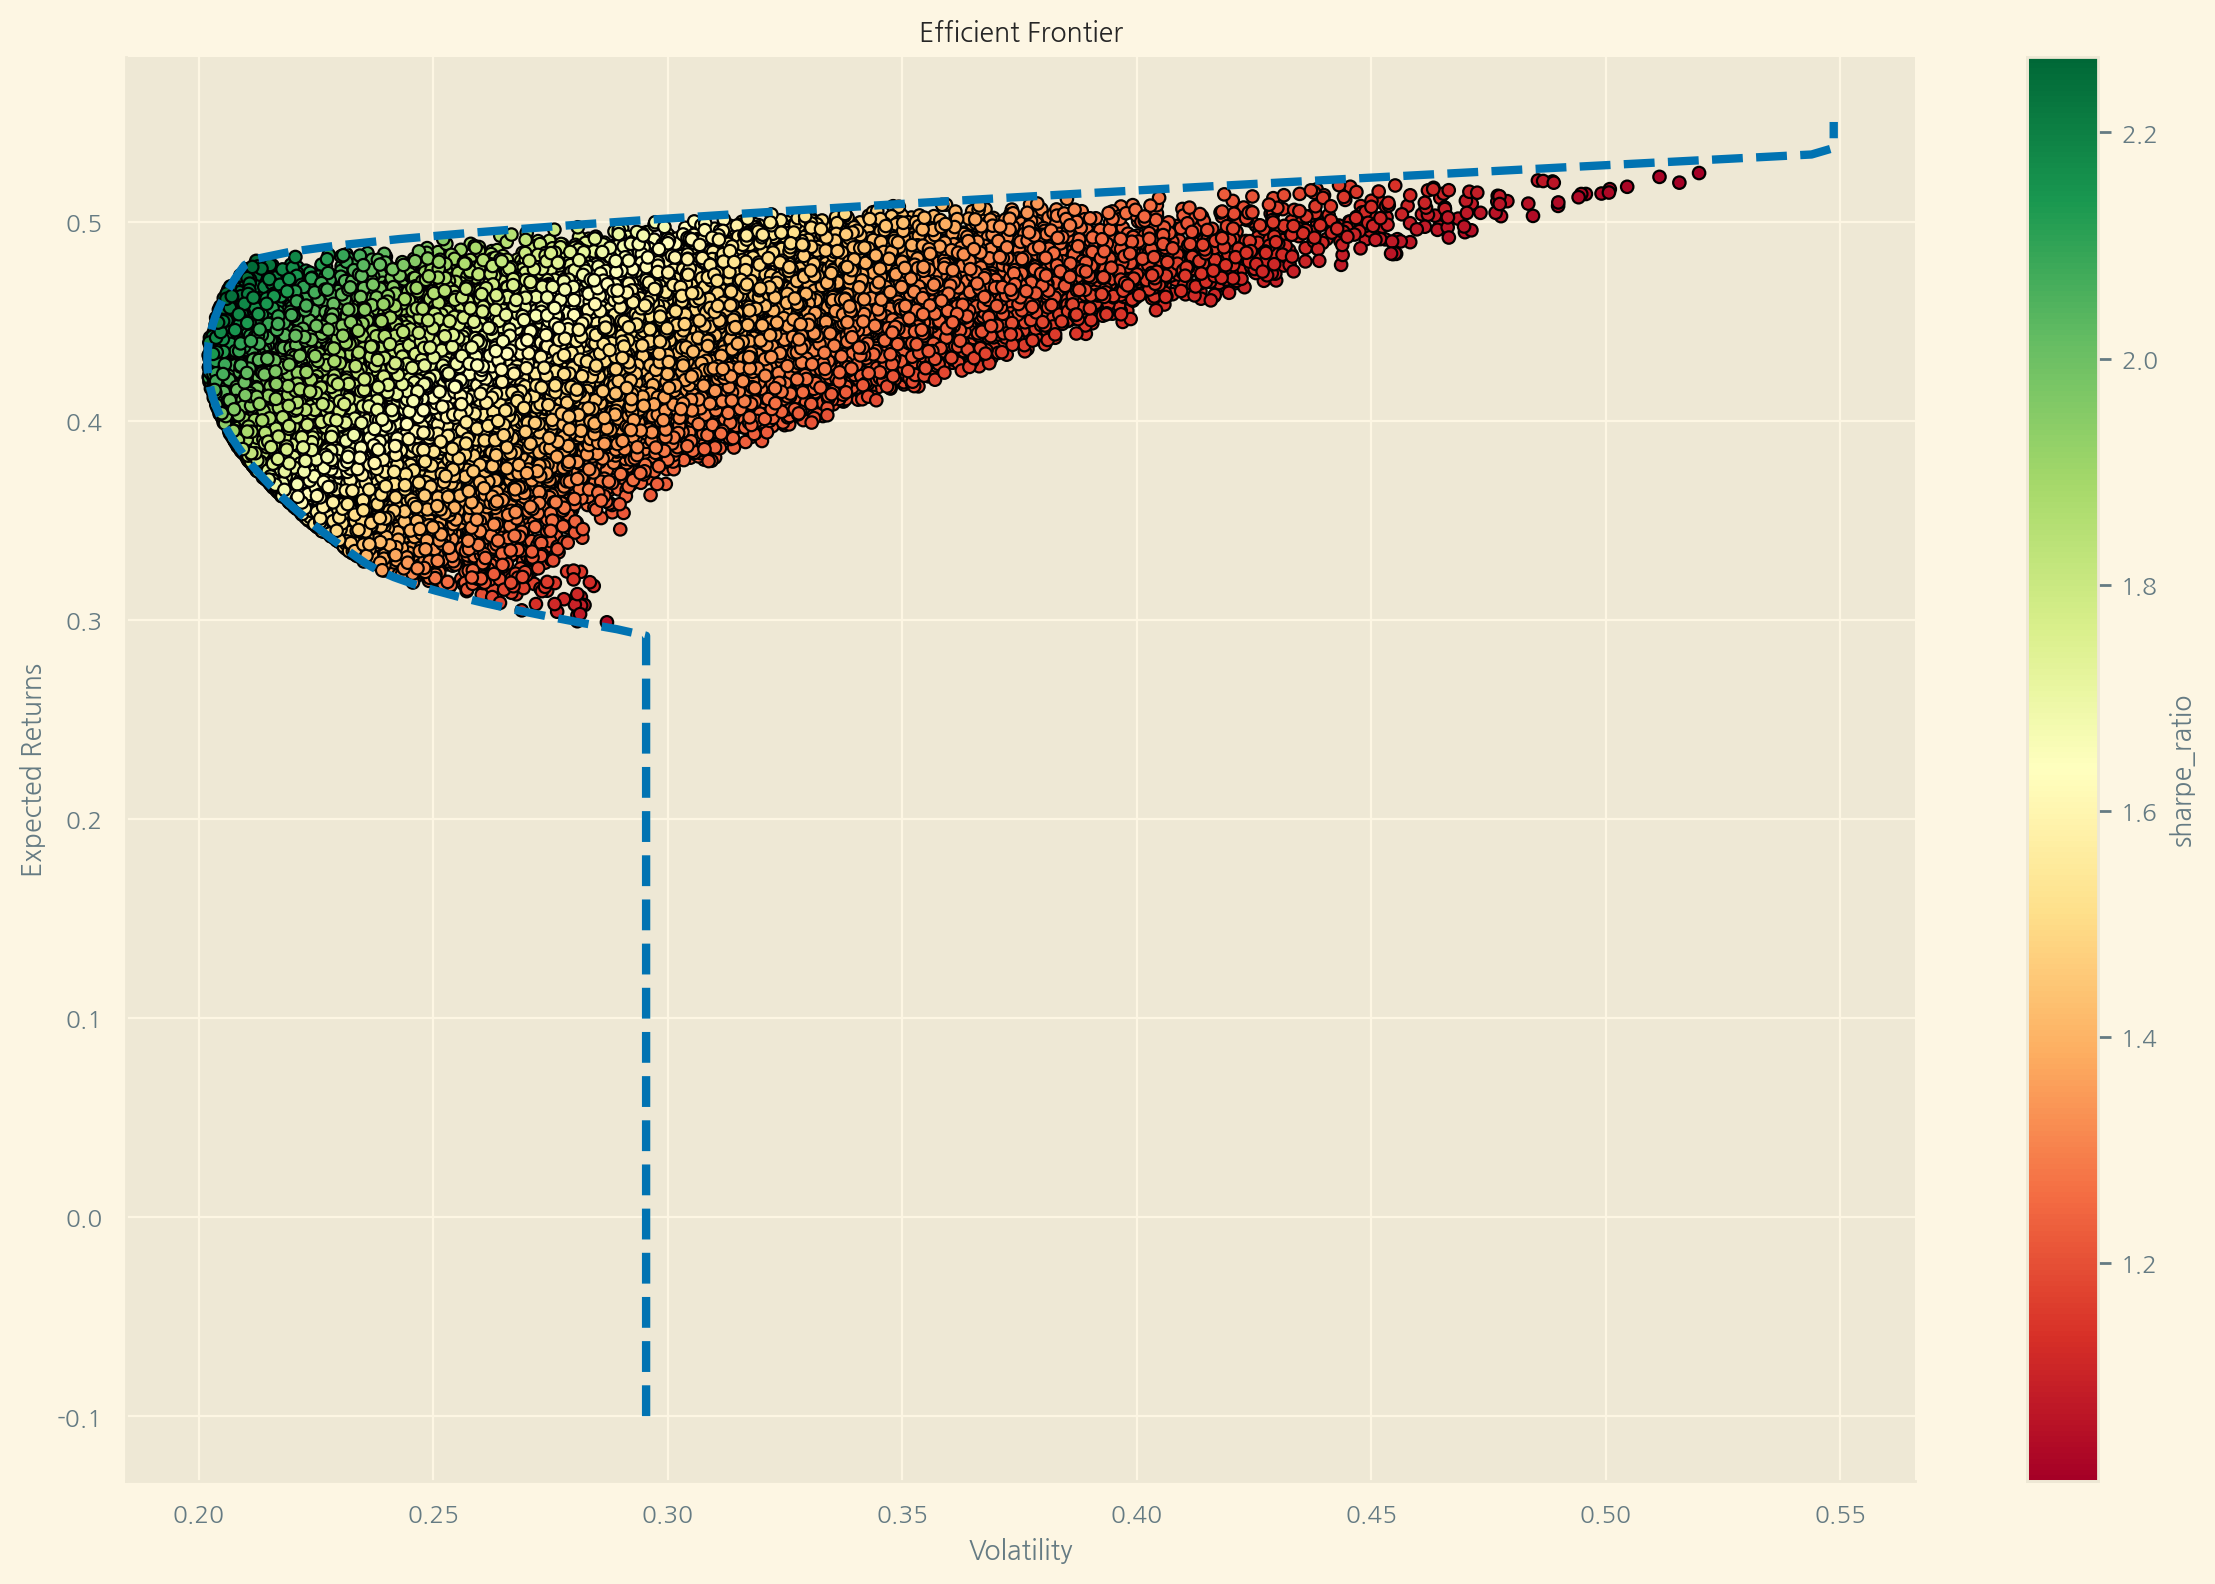

In [131]:
# seaborn의 plotting_context를 "paper"로 설정하여 그래프의 스타일을 조정합니다.
with sns.plotting_context("paper"):
    # 새로운 figure와 axes를 생성합니다.
    fig, ax = plt.subplots()
    # 포트폴리오 결과 데이터프레임을 산점도로 플로팅합니다.
    portf_results_df.plot(kind="scatter", x="volatility", 
                          y="returns", c="sharpe_ratio",
                          cmap="RdYlGn", edgecolors="black", 
                          ax=ax)
    # 효율적 프론티어를 플로팅합니다.
    ax.plot(vols_range, rtns_range, "b--", linewidth=3)
    # x축과 y축 라벨 및 그래프 제목을 설정합니다.
    ax.set(xlabel="Volatility", 
           ylabel="Expected Returns", 
           title="Efficient Frontier")

    # seaborn의 despine 함수를 사용하여 그래프의 테두리를 제거합니다.
    sns.despine()
    # 레이아웃을 조정하여 그래프 요소들이 겹치지 않도록 합니다.
    plt.tight_layout()
    # plt.savefig("images/figure_11_12", dpi=200)  # 그래프를 이미지 파일로 저장합니다.

8. Identify the minimum volatility portfolio:

8단계와 9단계에서는 최소 변동성 포트폴리오를 식별하고, 성과 지표를 출력하며, 효율적 프론티어에서 포트폴리오의 가중치를 표시합니다.


In [132]:
# vols_range에서 최소 변동성의 인덱스를 찾습니다.
min_vol_ind = np.argmin(vols_range)

# 최소 변동성 포트폴리오의 수익률을 찾습니다.
min_vol_portf_rtn = rtns_range[min_vol_ind]

# 최소 변동성 포트폴리오의 변동성을 찾습니다.
min_vol_portf_vol = efficient_portfolios[min_vol_ind]["fun"]

# 최소 변동성 포트폴리오의 성과 지표를 딕셔너리로 만듭니다.
min_vol_portf = {
    "Return": min_vol_portf_rtn,  # 수익률
    "Volatility": min_vol_portf_vol,  # 변동성
    "Sharpe Ratio": (min_vol_portf_rtn / min_vol_portf_vol)  # 샤프 비율
}

# 최소 변동성 포트폴리오의 성과 지표를 출력합니다.
min_vol_portf

{'Return': 0.4291457286432161,
 'Volatility': 0.20179853708243134,
 'Sharpe Ratio': 2.126604755652501}

9. Print the performance summary:

이제 두 가지 최소 변동성 포트폴리오를 비교할 수 있습니다: 하나는 몬테카를로 시뮬레이션을 사용해 얻은 것이고, 다른 하나는 최적화에서 얻은 것입니다. 할당 패턴에서 공통적으로 보이는 것은 메타와 마이크로소프트에 대부분의 자원을 할당한다는 것입니다. 또한, 최적화된 전략의 변동성이 약간 더 낮음을 확인할 수 있습니다. 이는 100,000개의 포트폴리오 중에서도(고려된 예상 포트폴리오 수익률 범위에 대한) 실제 최소 변동성 포트폴리오가 시뮬레이션되지 않았음을 의미합니다.

In [133]:
# 최소 변동성 포트폴리오의 요약 정보를 출력하는 함수 호출
# min_vol_portf: 최소 변동성 포트폴리오의 성과 지표 딕셔너리
# efficient_portfolios[min_vol_ind]["x"]: 최소 변동성 포트폴리오의 자산 가중치
# ASSETS: 자산 목록
# name="Minimum Volatility": 출력할 포트폴리오 이름
print_portfolio_summary(min_vol_portf, 
                        efficient_portfolios[min_vol_ind]["x"], 
                        ASSETS, 
                        name="Minimum Volatility")

Minimum Volatility portfolio ----
Performance
Return: 42.91% Volatility: 20.18% Sharpe Ratio: 212.66% 
Weights
AAPL: 18.06% META: 14.93% MSFT: 67.01% TSLA: 0.00% 

### There's more

최적화 접근 방식을 사용하여 가장 높은 예상 샤프 비율을 생성하는 포트폴리오의 가중치, 즉 접선 포트폴리오를 찾을 수도 있습니다. 이를 위해 먼저 목표 함수를 재정의해야 하는데, 이제 목표 함수는 샤프 비율의 음수가 됩니다. 음수를 사용하는 이유는 최적화 알고리즘이 최소화 문제를 해결하기 때문입니다. 목표 함수의 부호를 변경하여 최대화 문제를 쉽게 접근할 수 있습니다.

1. Define the new objective function (negative Sharpe ratio): 

In [134]:
def neg_sharpe_ratio(w, avg_rtns, cov_mat, rf_rate):
    # 포트폴리오의 수익률을 계산합니다.
    portf_returns = np.sum(avg_rtns * w)
    
    # 포트폴리오의 변동성을 계산합니다.
    portf_volatility = np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))
    
    # 포트폴리오의 샤프 비율을 계산합니다.
    portf_sharpe_ratio = (
        (portf_returns - rf_rate) / portf_volatility
    )
    
    # 샤프 비율의 음수를 반환합니다. (최적화 알고리즘이 최소화 문제를 해결하기 때문입니다.)
    return -portf_sharpe_ratio

두 번째 단계는 효율적 프론티어에서 이미 수행한 것과 매우 유사하지만, 이번에는 하나의 가중치 집합만 찾기 때문에 `for` 루프를 사용하지 않습니다. 인수에 무위험 수익률을 포함하지만, 간단하게 0%라고 가정합니다. 그리고 하나의 제약 조건만 사용합니다. 즉, 목표 변수의 합이 1이 되어야 합니다.

2. Find the optimized portfolio:

In [135]:
# 자산의 수를 계산합니다.
n_assets = len(avg_returns)
# 무위험 수익률을 0으로 설정합니다.
RF_RATE = 0

# 최적화 함수에 전달할 인수들을 정의합니다.
args = (avg_returns, cov_mat, RF_RATE)
# 제약 조건을 정의합니다. 모든 가중치의 합이 1이 되어야 합니다.
constraints = ({"type": "eq", 
                "fun": lambda x: np.sum(x) - 1})
# 각 자산의 가중치가 0과 1 사이에 있어야 한다는 경계를 설정합니다.
bounds = tuple((0,1) for asset in range(n_assets))
# 초기 추정치를 각 자산에 대해 동일한 가중치로 설정합니다.
initial_guess = n_assets * [1. / n_assets]

# SLSQP 방법을 사용하여 샤프 비율을 최대화하는 포트폴리오를 찾습니다.
max_sharpe_portf = sco.minimize(neg_sharpe_ratio, 
                                x0=initial_guess, 
                                args=args,
                                method="SLSQP", 
                                bounds=bounds, 
                                constraints=constraints)

3. Extract information about the maximum Sharpe Ratio portfolio:

In [136]:
# 최적화된 포트폴리오의 가중치를 가져옵니다.
max_sharpe_portf_w = max_sharpe_portf["x"]

# 최적화된 포트폴리오의 성과 지표를 계산합니다.
max_sharpe_portf = {
    # 포트폴리오의 예상 수익률을 계산합니다.
    "Return": get_portf_rtn(max_sharpe_portf_w, avg_returns),
    # 포트폴리오의 변동성을 계산합니다.
    "Volatility": get_portf_vol(max_sharpe_portf_w, 
                                avg_returns, 
                                cov_mat),
    # 포트폴리오의 샤프 비율을 계산합니다. (음수로 반환된 값을 양수로 변환)
    "Sharpe Ratio": -max_sharpe_portf["fun"]
}

# 최적화된 포트폴리오의 성과 지표를 출력합니다.
max_sharpe_portf

{'Return': 0.47866902889380375,
 'Volatility': 0.20995552212571417,
 'Sharpe Ratio': 2.279859200879666}

4. Print performance summary:

In [137]:
# 최적화된 포트폴리오의 요약 정보를 출력하는 함수입니다.
# max_sharpe_portf: 최적화된 포트폴리오의 성과 지표를 담고 있는 딕셔너리
# max_sharpe_portf_w: 최적화된 포트폴리오의 각 자산에 대한 가중치
# ASSETS: 자산의 이름 리스트
# name: 출력할 포트폴리오의 이름
print_portfolio_summary(max_sharpe_portf, 
                        max_sharpe_portf_w, 
                        ASSETS, 
                        name="Maximum Sharpe Ratio")

Maximum Sharpe Ratio portfolio ----
Performance
Return: 47.87% Volatility: 21.00% Sharpe Ratio: 227.99% 
Weights
AAPL: 0.00% META: 0.00% MSFT: 99.04% TSLA: 0.96% 

### See also 
- Markowitz, H., 1952. “Portfolio Selection,” The Journal of Finance, 7(1): 77–91

## 11.4 Finding the efficient frontier using convex optimization with `cvxpy`

**CVXPY를 사용한 볼록 최적화를 통한 효율적 프론티어 찾기**

이전 방법에서는 SciPy 라이브러리를 사용한 수치 최적화를 통해 효율적 프론티어를 찾았습니다. 우리는 포트폴리오 변동성을 최소화할 메트릭으로 사용했습니다. 그러나 동일한 문제를 약간 다르게 정의하여 볼록 최적화를 사용해 효율적 프론티어를 찾을 수도 있습니다.

평균-분산 최적화 문제를 위험 회피 프레임워크로 재구성할 수 있으며, 이 경우 투자자는 위험 조정 수익을 최대화하고자 합니다:

$
\text{max } \omega^T \mu - \gamma \omega^T \Sigma \omega
$

$
\text{s.t. } \omega^T 1 = 1
$

$
\omega \geq 0
$

여기서 $\gamma \in [0, \infty)$는 위험 회피 매개변수이며, 제약 조건은 가중치의 합이 1이 되어야 하며, 공매도는 허용되지 않음을 명시합니다. $\gamma$ 값이 클수록 투자자는 더 높은 위험 회피 성향을 가집니다.

공매도는 자산을 빌려서 공개 시장에서 판매한 다음, 나중에 더 낮은 가격에 해당 자산을 매입하는 것을 가정합니다. 이번 방법에서는 이전 두 방법에서 사용한 것과 동일한 데이터를 사용하여 결과를 비교할 수 있도록 합니다.

### Getting Ready

This recipe requires running all the code from the previous recipes:
* *Finding the Efficient Frontier using Monte Carlo simulations*
* *Finding the Efficient Frontier using optimization with `scipy`*

### How to do it...

소개에서 언급했듯이, 이전 두 방법에서 사용한 예제를 계속 사용합니다. 따라서 몬테카를로 시뮬레이션을 사용한 효율적 프론티어 찾기 방법의 1단계부터 4단계까지를 실행합니다(간략하게 하기 위해 여기에는 포함하지 않음). 추가 단계로, `cvxpy` 볼록 최적화 라이브러리를 가져옵니다. 또한, 역사적 평균 수익률과 공분산 행렬을 `numpy` 배열로 변환합니다.

1. Import the libraries:

In [138]:
import cvxpy as cp

2. Convert the annualized average returns and the covariance matrix to `numpy` arrays:

In [139]:
avg_returns = avg_returns.values
cov_mat = cov_mat.values

3. Set up the optimization problem:

3단계에서는 최적화 문제를 설정합니다. 먼저 목표 변수(가중치), 위험 회피 매개변수(`gamma_par`, 여기서 "par"는 최적화 루틴의 매개변수임을 강조하기 위해 추가됨), 포트폴리오 수익률 및 변동성(모두 이전에 정의한 `weights` 객체를 사용), 그리고 최대화하려는 위험 조정 수익으로 이루어진 목적 함수를 정의합니다. 그런 다음, `cp.Problem` 객체를 생성하고 목적 함수와 제약 조건 목록을 인수로 전달합니다.

다음과 같은 곱셈을 표현하기 위해 `cp.quad_form(x, y)`를 사용합니다: $ x^T y x $.

In [140]:
# 포트폴리오 최적화를 위한 변수와 매개변수 설정
weights = cp.Variable(n_assets)  # 각 자산의 가중치를 나타내는 변수
gamma_par = cp.Parameter(nonneg=True)  # 위험 회피 매개변수 (음수가 아닌 값)

# 포트폴리오 수익률 계산
portf_rtn_cvx = avg_returns @ weights  # 평균 수익률과 가중치의 내적

# 포트폴리오 변동성 계산
portf_vol_cvx = cp.quad_form(weights, cov_mat)  # 가중치와 공분산 행렬을 이용한 2차 형식

# 목적 함수 정의: 위험 조정 수익 최대화
objective_function = cp.Maximize(
    portf_rtn_cvx - gamma_par * portf_vol_cvx  # 수익률에서 위험 가중치를 뺀 값
)

# 최적화 문제 설정
problem = cp.Problem(
    objective_function,  # 최대화할 목적 함수
    [cp.sum(weights) == 1, weights >= 0]  # 제약 조건: 가중치 합 = 1, 모든 가중치 >= 0
)

4. Calculate the Efficient Frontier:

4단계에서는 여러 위험 회피 매개변수 값에 대해 볼록 최적화 문제를 해결함으로써 효율적 프론티어를 찾습니다. 고려된 값들을 정의하기 위해, `np.logspace` 함수를 사용하여 25개의 $\gamma$ 값을 얻습니다. 각 매개변수 값에 대해, `problem.solve()`를 실행하여 최적의 해를 찾고, 관심 있는 값을 지정된 리스트에 저장합니다.

`np.logspace`는 `np.linspace`와 유사합니다. 차이점은 `np.logspace`가 로그 스케일에서 균등하게 분포된 숫자를 반환하는 반면, `np.linspace`는 선형 스케일에서 분포된 숫자를 반환한다는 점입니다.


In [141]:
# 효율적 프론티어 계산을 위한 설정
N_POINTS = 25  # 계산할 포인트 수
portf_rtn_cvx_ef = []  # 포트폴리오 수익률을 저장할 리스트
portf_vol_cvx_ef = []  # 포트폴리오 변동성을 저장할 리스트
weights_ef = []  # 각 포인트의 자산 가중치를 저장할 리스트
gamma_range = np.logspace(-3, 3, num=N_POINTS)  # 위험 회피 계수의 로그 스케일 범위

# 각 위험 회피 계수에 대해 최적화 수행
for gamma in gamma_range:
    gamma_par.value = gamma  # 현재 위험 회피 계수 설정
    problem.solve()  # 최적화 문제 해결
    
    # 결과 저장
    portf_vol_cvx_ef.append(cp.sqrt(portf_vol_cvx).value)  # 포트폴리오 변동성 저장
    portf_rtn_cvx_ef.append(portf_rtn_cvx.value)  # 포트폴리오 수익률 저장
    weights_ef.append(weights.value)  # 최적 자산 가중치 저장

5. Plot the allocation for different values of the risk-aversion parameter:

5단계에서는 다양한 위험 회피 수준에 따른 자산 배분을 그래프로 나타냅니다. 마지막으로, 개별 자산과 함께 효율적 프론티어를 그래프로 표시합니다.

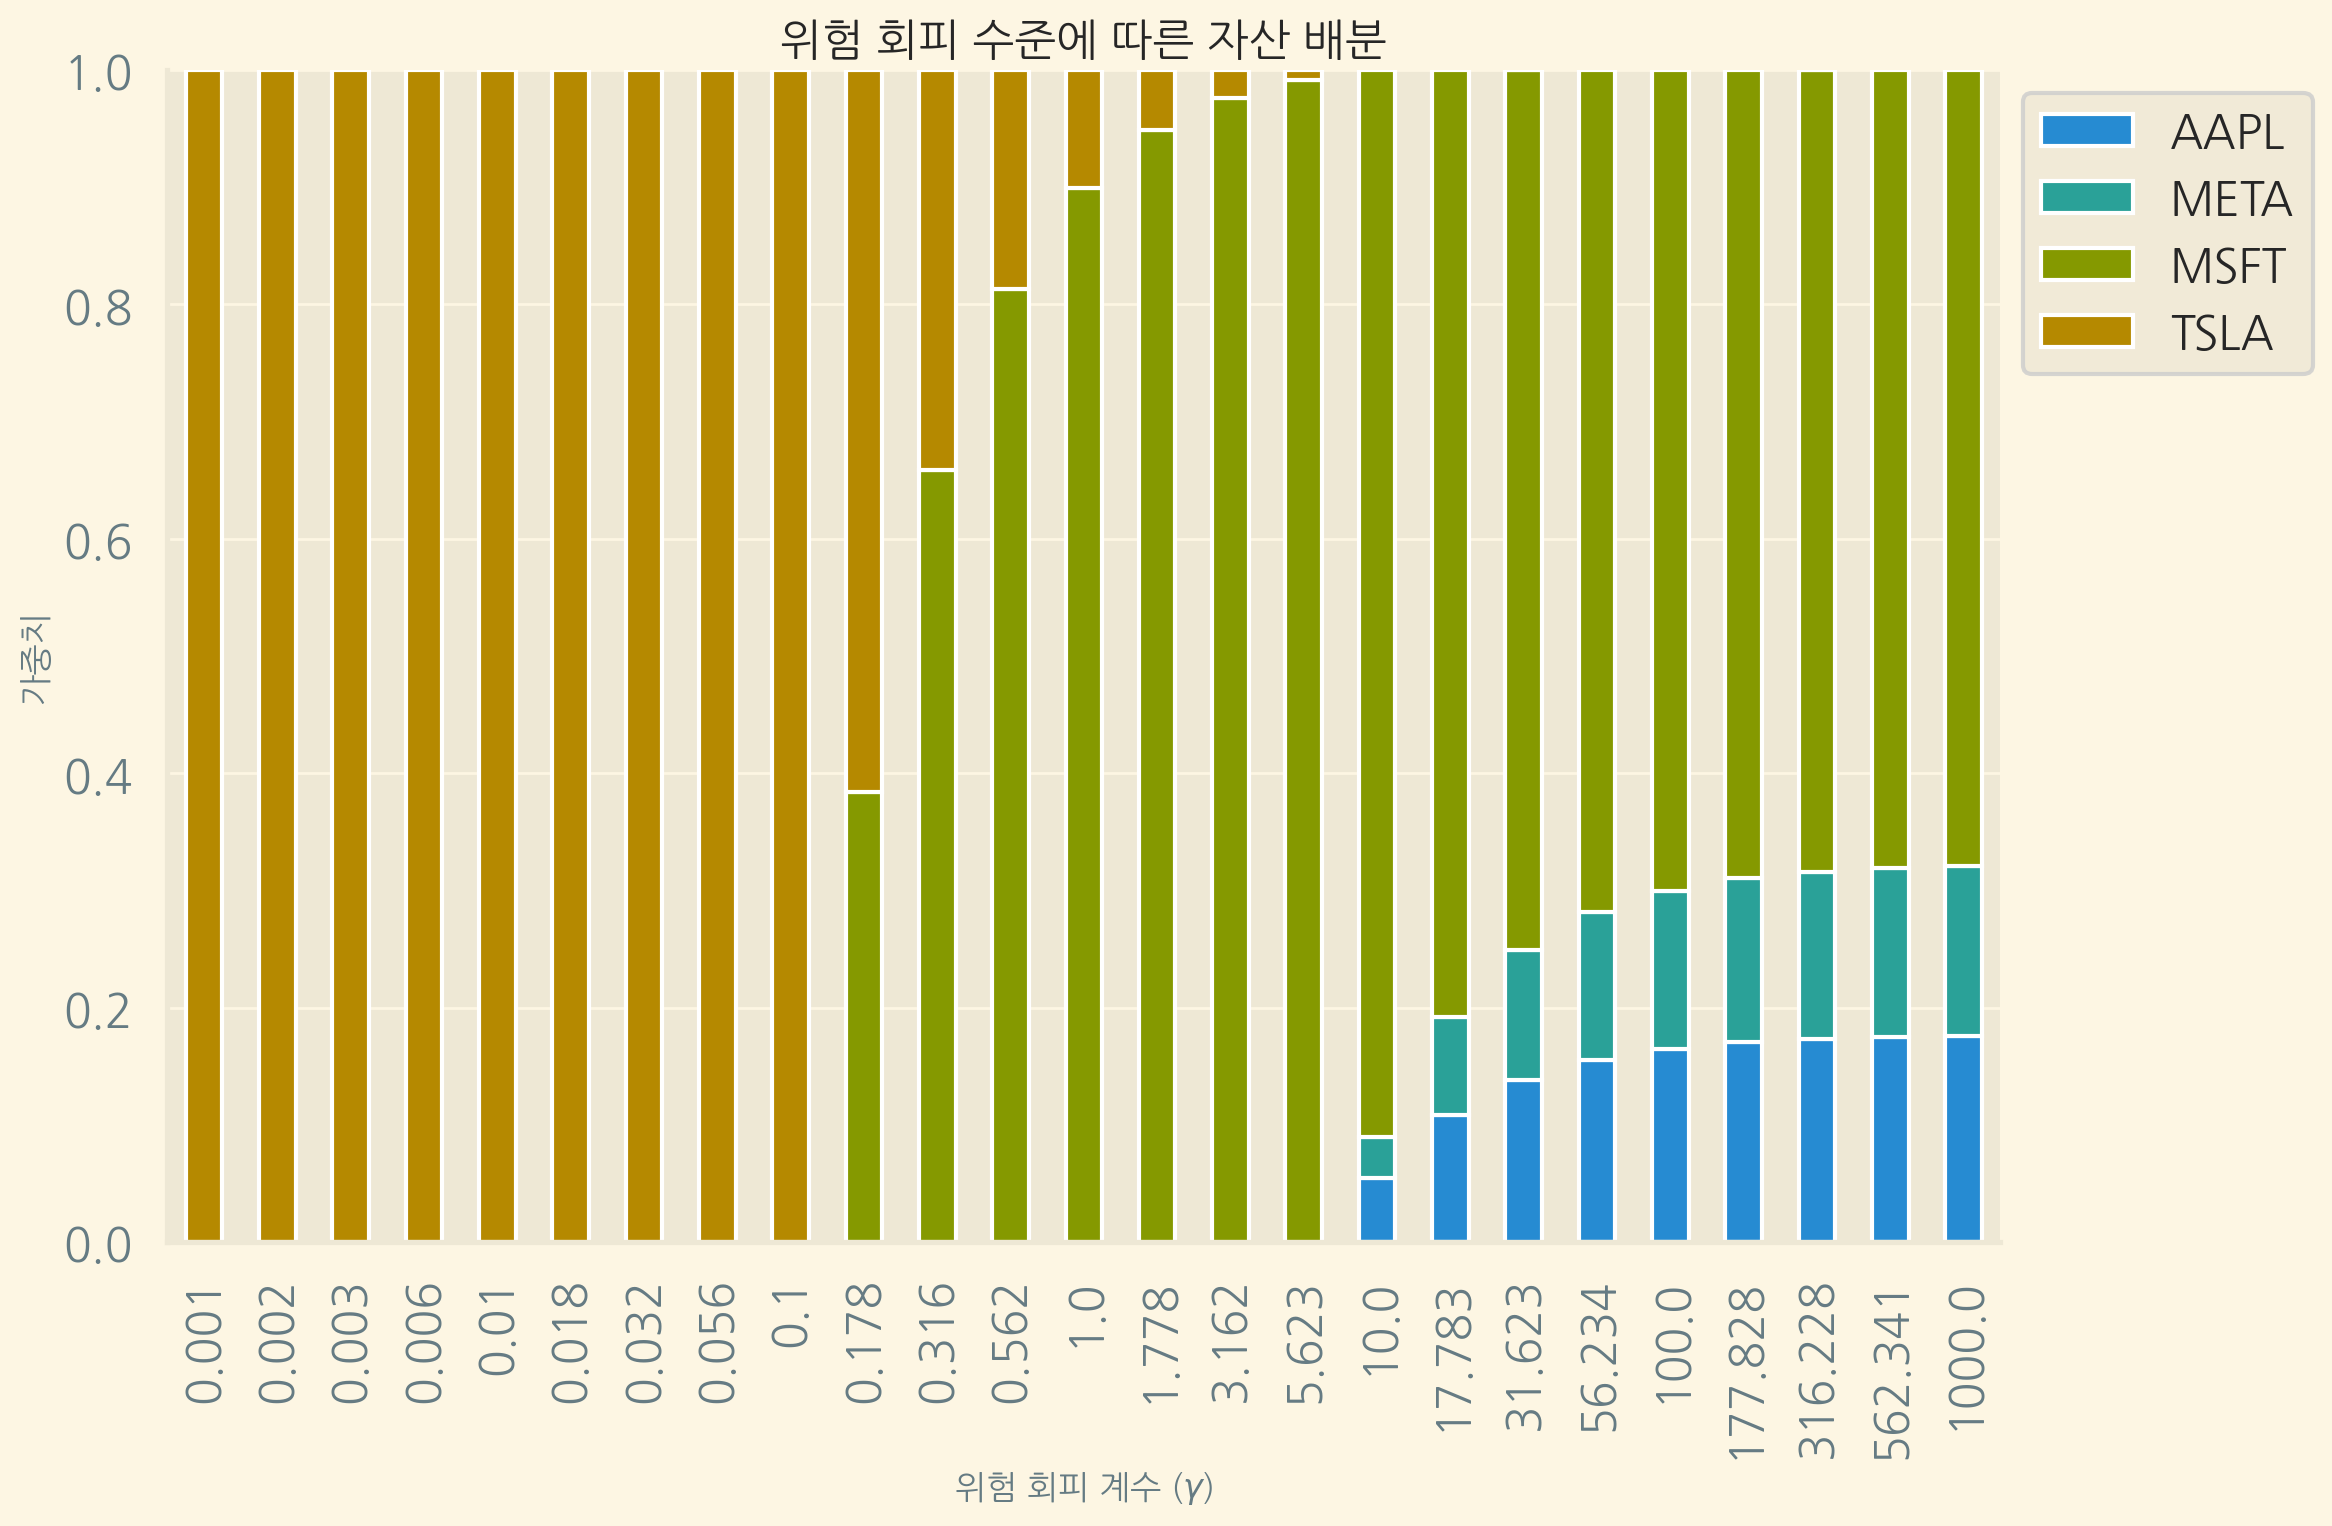

In [142]:
# 위험 회피 수준에 따른 자산 배분을 시각화합니다
weights_df = pd.DataFrame(weights_ef, 
                          columns=ASSETS, 
                          index=np.round(gamma_range, 3))

# 누적 막대 그래프로 자산 배분을 표시합니다
ax = weights_df.plot(kind="bar", stacked=True) 

# 그래프 제목과 축 레이블을 설정합니다
ax.set(title="위험 회피 수준에 따른 자산 배분",
       xlabel=r"위험 회피 계수 ($\gamma$)", 
       ylabel="가중치")

# 범례를 그래프 오른쪽 바깥에 위치시킵니다
ax.legend(bbox_to_anchor=(1,1))

# 그래프의 상단과 오른쪽 테두리를 제거하여 깔끔하게 만듭니다
sns.despine()

# 그래프 레이아웃을 조정합니다
plt.tight_layout()

# 그래프를 파일로 저장하려면 아래 주석을 해제하세요
# plt.savefig("images/figure_11_13", dpi=200)

Figure 11.13: Asset allocation per various levels of risk-aversion 

**Figure 11.13에서, 위험 회피 성향이 매우 작은 값일 때 투자자는 모든 자원을 테슬라에 100% 할당합니다. 위험 회피 성향이 증가함에 따라 테슬라에 대한 할당은 줄어들고, 마이크로소프트 및 다른 자산에 더 많은 비중이 할당됩니다. 고려된 매개변수 값의 다른 한쪽 끝에서는 투자자가 테슬라에 0%를 할당하게 됩니다.**

6. Plot the Efficient Frontier, together with the individual assets:

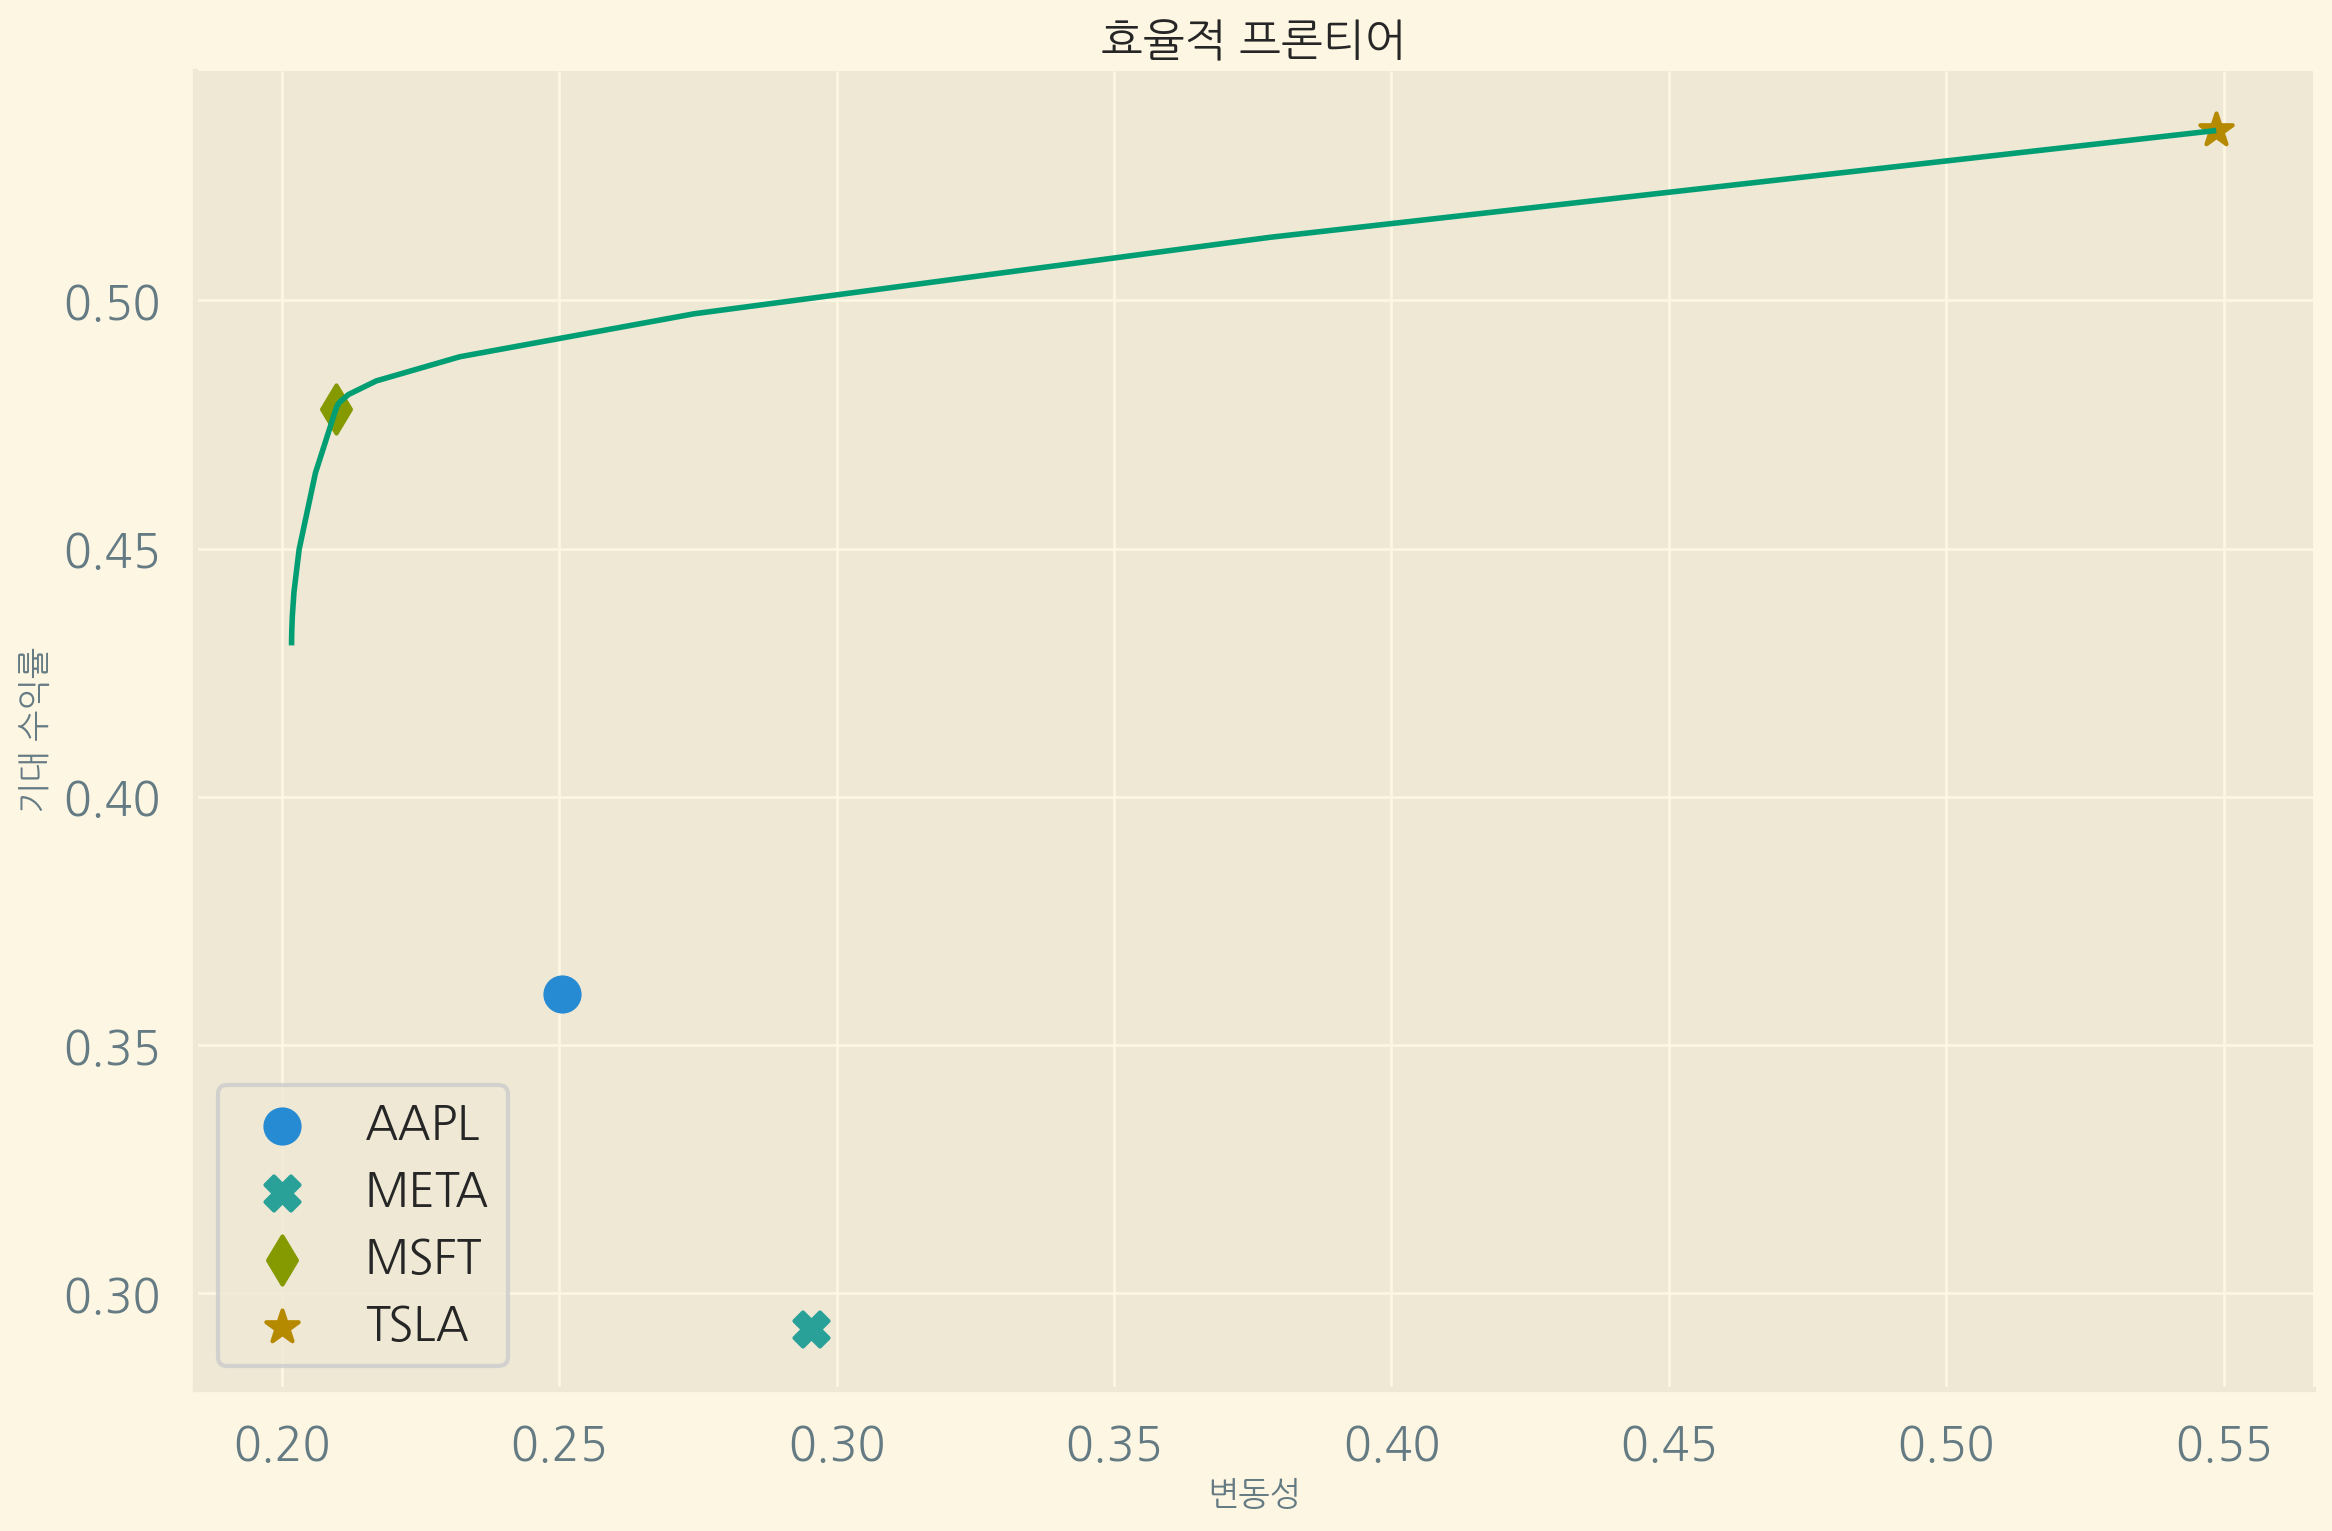

In [143]:
# 마커 스타일을 정의합니다. 각 자산마다 다른 모양의 마커를 사용합니다.
MARKERS = ["o", "X", "d", "*"]

# 그래프를 그리기 위한 figure와 axes 객체를 생성합니다.
fig, ax = plt.subplots()

# 효율적 프론티어를 녹색 실선으로 그립니다.
ax.plot(portf_vol_cvx_ef, portf_rtn_cvx_ef, "g-")

# 각 자산을 그래프에 점으로 표시합니다.
for asset_index in range(n_assets):
     plt.scatter(x=np.sqrt(cov_mat[asset_index, asset_index]),  # x축: 변동성
                 y=avg_returns[asset_index],  # y축: 기대 수익률
                 marker=MARKERS[asset_index],  # 마커 스타일
                 label=ASSETS[asset_index],  # 범례 레이블
                 s=150)  # 마커 크기

# 그래프의 제목과 축 레이블을 설정합니다.
ax.set(title="효율적 프론티어",
       xlabel="변동성", 
       ylabel="기대 수익률")

# 범례를 추가합니다.
ax.legend()

# 그래프의 상단과 오른쪽 테두리를 제거하여 깔끔하게 만듭니다.
sns.despine()

# 그래프 레이아웃을 조정합니다.
plt.tight_layout()

# 그래프를 파일로 저장하려면 아래 주석을 해제하세요.
# plt.savefig("images/figure_11_14", dpi=200)

Figure 11.14: Efficient frontier identified by solving the convex optimization problem

생성된 프론티어는 Figure 11.10에서 몬테카를로 시뮬레이션을 사용해 생성한 것과 유사합니다. 그 당시 마이크로소프트 주식만으로 구성된 포트폴리오가 효율적 프론티어에 매우 가깝다는 것을 확인했습니다. 이제 테슬라 주식만으로 구성된 포트폴리오에 대해서도 동일한 말을 할 수 있습니다. 몬테카를로 시뮬레이션을 사용할 때, 수익률/변동성 평면의 해당 부분에서 충분한 관측값이 생성되지 않아 해당 포트폴리오 주변의 효율적 프론티어 선을 그릴 수 없었습니다. "There's more..." 섹션에서는 이번에 생성된 프론티어를 이전 방법(SciPy 라이브러리를 사용한 방법)에서 얻은 프론티어와 비교하기도 합니다.

### There's more
**자산 배분 문제의 두 가지 형태의 결과 비교**

두 효율적 프론티어를 비교를 위해 그래프로 나타낼 수 있습니다. 하나는 예상 수익률 수준에 대한 변동성을 최소화하여 계산한 것이고, 다른 하나는 볼록 최적화를 사용하여 위험 조정 수익을 최대화한 것입니다.

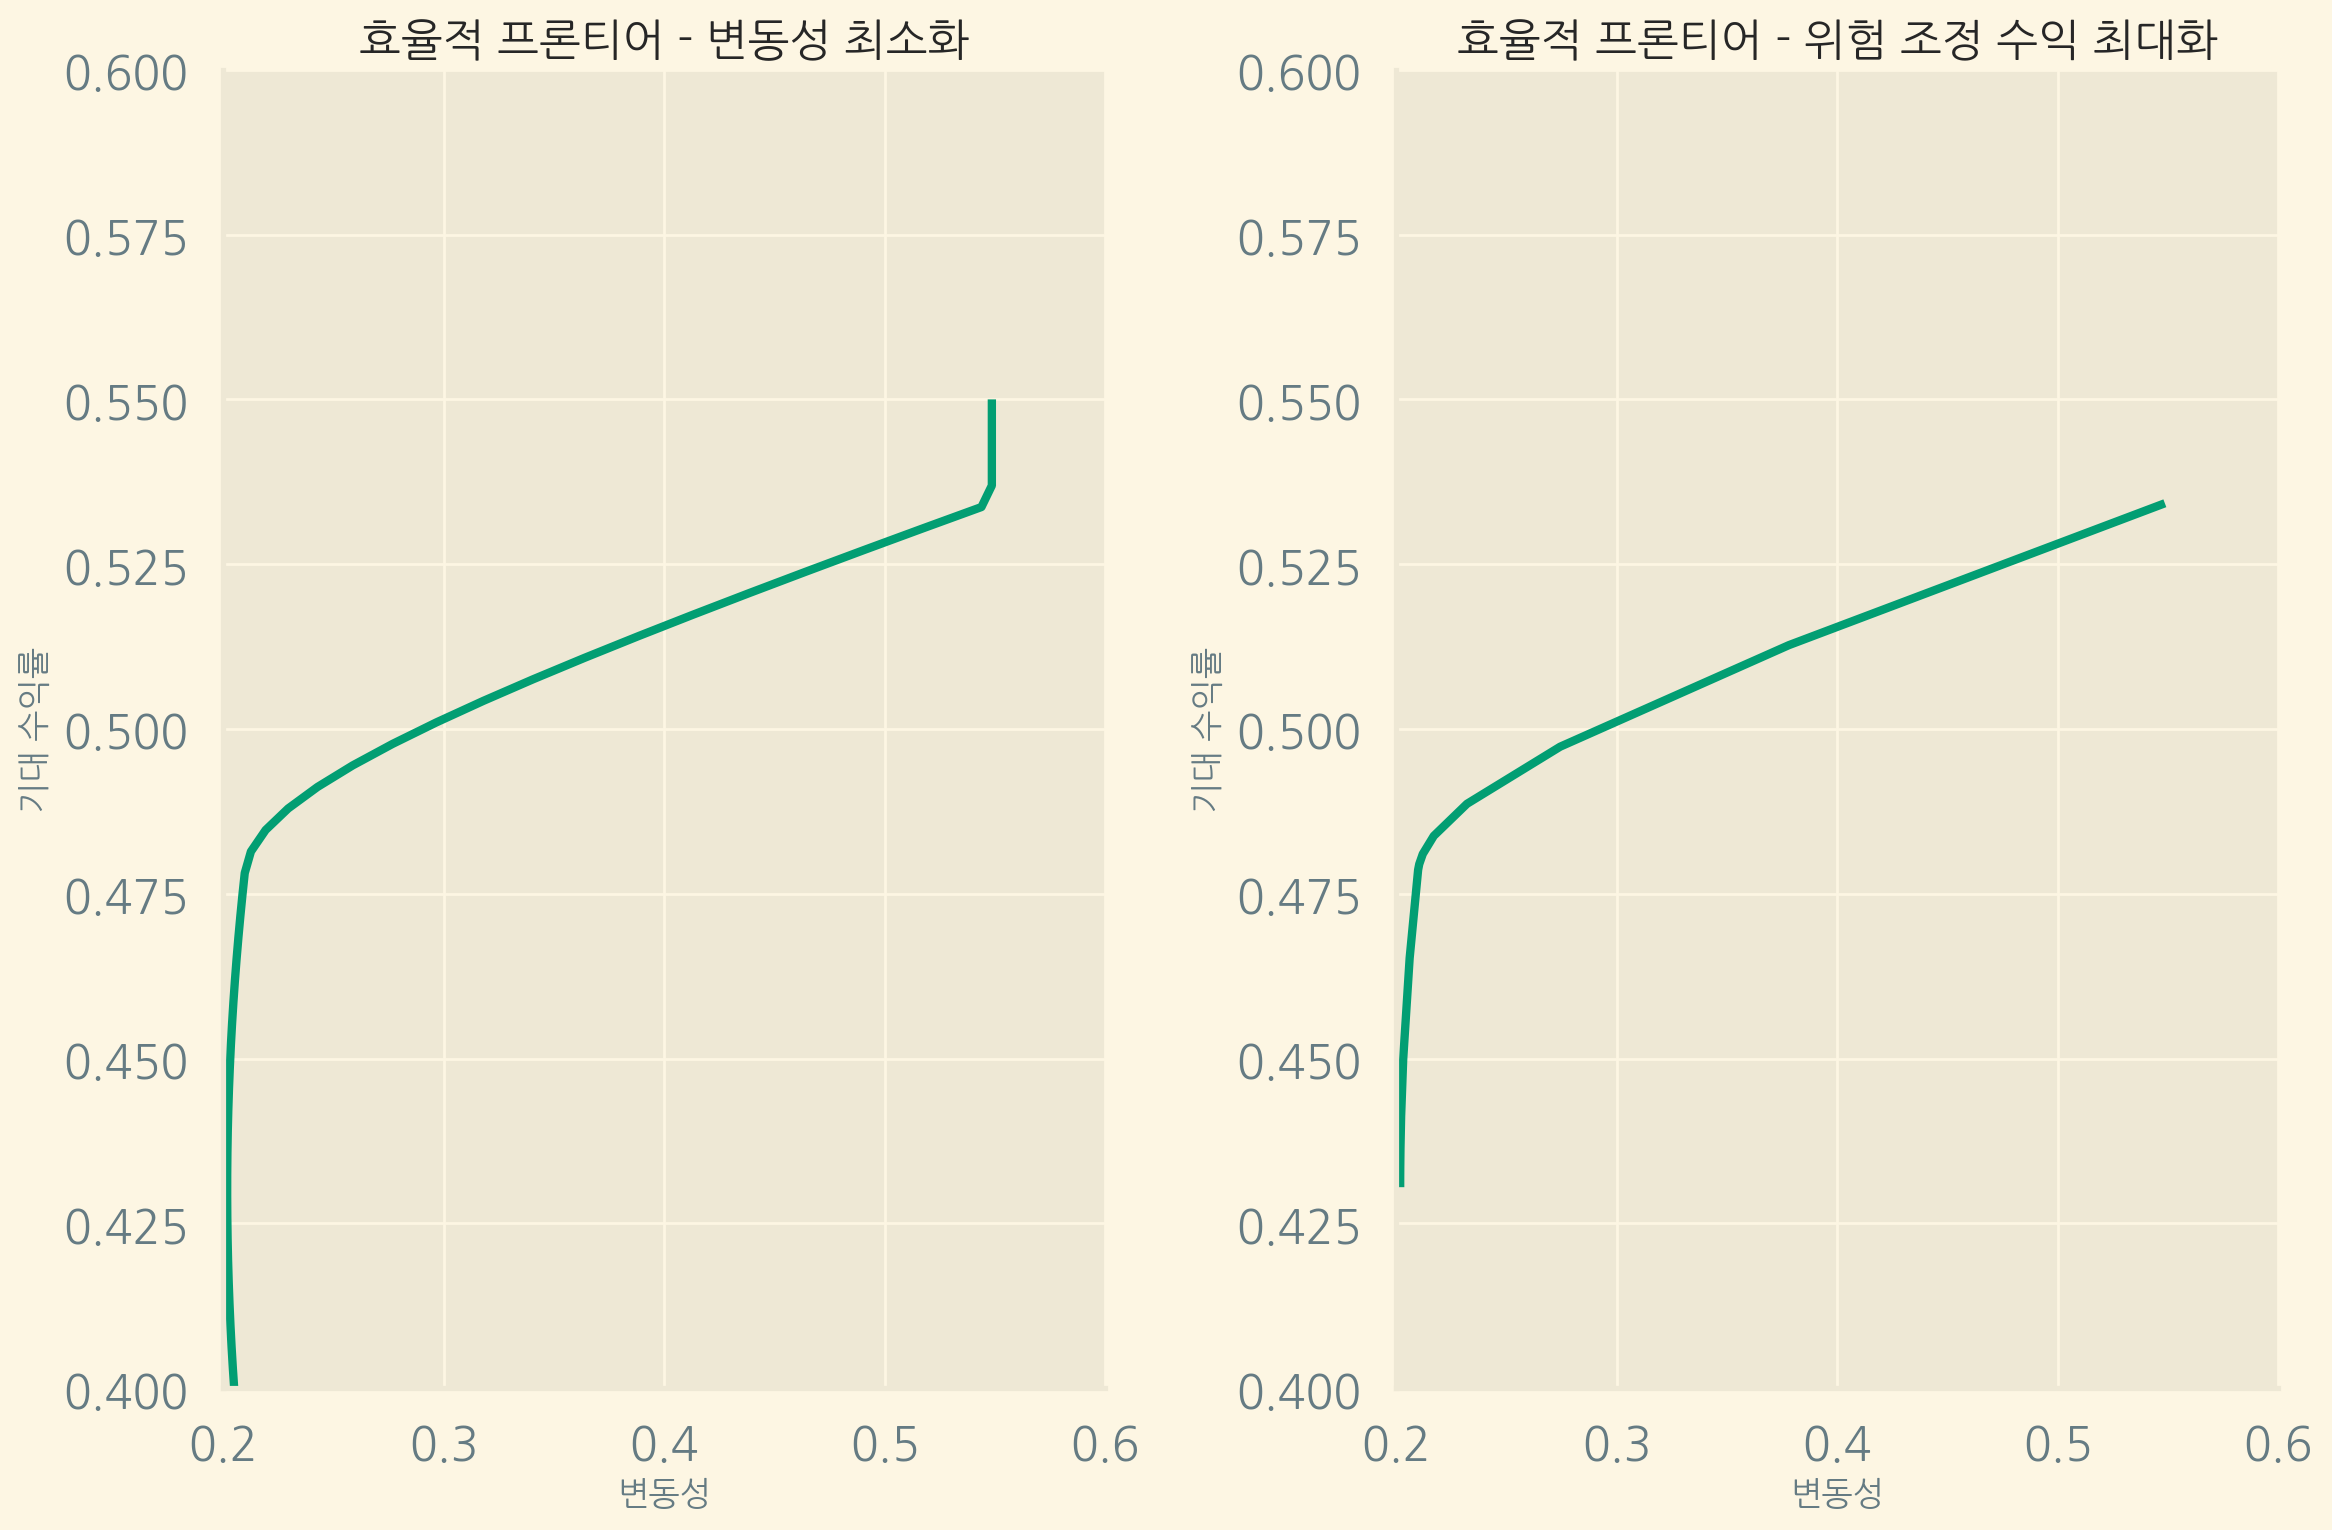

In [144]:
# 그래프의 x축과 y축 범위를 설정합니다
x_lim = [0.2, 0.6]
y_lim = [0.4, 0.6]

# 1x2 서브플롯을 생성합니다
fig, ax = plt.subplots(1, 2)

# 첫 번째 서브플롯: 변동성 최소화 방법으로 구한 효율적 프론티어
ax[0].plot(vols_range, rtns_range, "g-", linewidth=3)
ax[0].set(title="효율적 프론티어 - 변동성 최소화",
          xlabel="변동성", 
          ylabel="기대 수익률",
          xlim=x_lim, 
          ylim=y_lim)

# 두 번째 서브플롯: 위험 조정 수익 최대화 방법으로 구한 효율적 프론티어
ax[1].plot(portf_vol_cvx_ef, portf_rtn_cvx_ef, "g-", linewidth=3)
ax[1].set(title="효율적 프론티어 - 위험 조정 수익 최대화",
          xlabel="변동성", 
          ylabel="기대 수익률",
          xlim=x_lim, 
          ylim=y_lim)

# 그래프의 상단과 오른쪽 테두리를 제거하여 깔끔하게 만듭니다
sns.despine()

# 그래프 레이아웃을 조정합니다
plt.tight_layout()

# 그래프를 파일로 저장하려면 아래 주석을 해제하세요
# plt.savefig("images/figure_11_15", dpi=200)

Figure 11.15: Comparison of efficient frontiers generated by minimizing volatility per expected level of return (left) and by maximizing the risk-adjusted return (right)

생성된 효율적 프론티어는 매우 유사하지만, 약간의 차이가 있습니다. 첫째, 최소화를 사용하여 얻은 프론티어는 더 부드럽고, 프론티어를 계산하기 위해 더 많은 점을 사용했습니다. 둘째, 오른쪽 프론티어는 가능한 변동성/수익률 쌍의 범위가 약간 더 넓게 정의되어 있습니다.

**레버리지 허용하기**

분석에 포함할 수 있는 또 다른 흥미로운 개념은 최대 허용 레버리지입니다. 우리는 가중치에 대한 비음수 제약 조건을 벡터의 노름을 사용한 최대 레버리지 제약 조건으로 대체합니다.

다음 코드 스니펫에서는 3단계에서 정의한 것에 추가된 내용만을 보여줍니다.

In [146]:
# 최대 레버리지를 나타내는 매개변수를 정의합니다
max_leverage = cp.Parameter()

# 레버리지를 고려한 새로운 최적화 문제를 정의합니다
prob_with_leverage = cp.Problem(
    objective_function,  # 이전에 정의한 목적 함수를 사용합니다
    [
        cp.sum(weights) == 1,  # 가중치의 합이 1이 되도록 하는 제약 조건
        cp.norm(weights, 1) <= max_leverage  # 레버리지 제약 조건: 가중치의 L1 노름이 최대 레버리지 이하여야 함
    ]
)

다음 코드 스니펫에서는 두 개의 루프를 포함하도록 코드를 수정합니다. 하나는 위험 회피 매개변수의 가능한 값에 대한 루프이고, 다른 하나는 최대 허용 레버리지를 나타내는 루프입니다. 레버리지가 1(즉, 레버리지가 없음)일 때는 이전 최적화 문제와 유사한 경우가 됩니다(단, 이번에는 비음수 제약 조건이 없습니다).

결과를 저장하기 위해 사용된 자리 표시자 객체도 2차원 행렬(`np.ndarrays`)이거나, 가중치의 경우에는 3차원을 포함하도록 재정의합니다.

In [147]:
# 레버리지 범위를 설정합니다 (1은 레버리지 없음, 2는 2배 레버리지, 5는 5배 레버리지)
LEVERAGE_RANGE = [1, 2, 5]
len_leverage = len(LEVERAGE_RANGE)

# 효율적 프론티어를 계산할 포인트 수를 설정합니다
N_POINTS = 25

# 포트폴리오 변동성, 수익률, 가중치를 저장할 배열을 초기화합니다
portf_vol_l = np.zeros((N_POINTS, len_leverage))  # 변동성 저장
portf_rtn_l = np.zeros((N_POINTS, len_leverage))  # 수익률 저장
weights_ef = np.zeros((len_leverage, N_POINTS, n_assets))  # 자산 가중치 저장

# 각 레버리지 수준과 위험 회피 계수에 대해 최적화를 수행합니다
for lev_ind, leverage in enumerate(LEVERAGE_RANGE):
    for gamma_ind in range(N_POINTS):
        # 현재 레버리지와 위험 회피 계수 값을 설정합니다
        max_leverage.value = leverage
        gamma_par.value = gamma_range[gamma_ind]
        
        # 최적화 문제를 해결합니다
        prob_with_leverage.solve()
        
        # 결과를 저장합니다
        portf_vol_l[gamma_ind, lev_ind] = cp.sqrt(portf_vol_cvx).value  # 포트폴리오 변동성
        portf_rtn_l[gamma_ind, lev_ind] = portf_rtn_cvx.value  # 포트폴리오 수익률
        weights_ef[lev_ind, gamma_ind, :] = weights.value  # 최적 자산 가중치

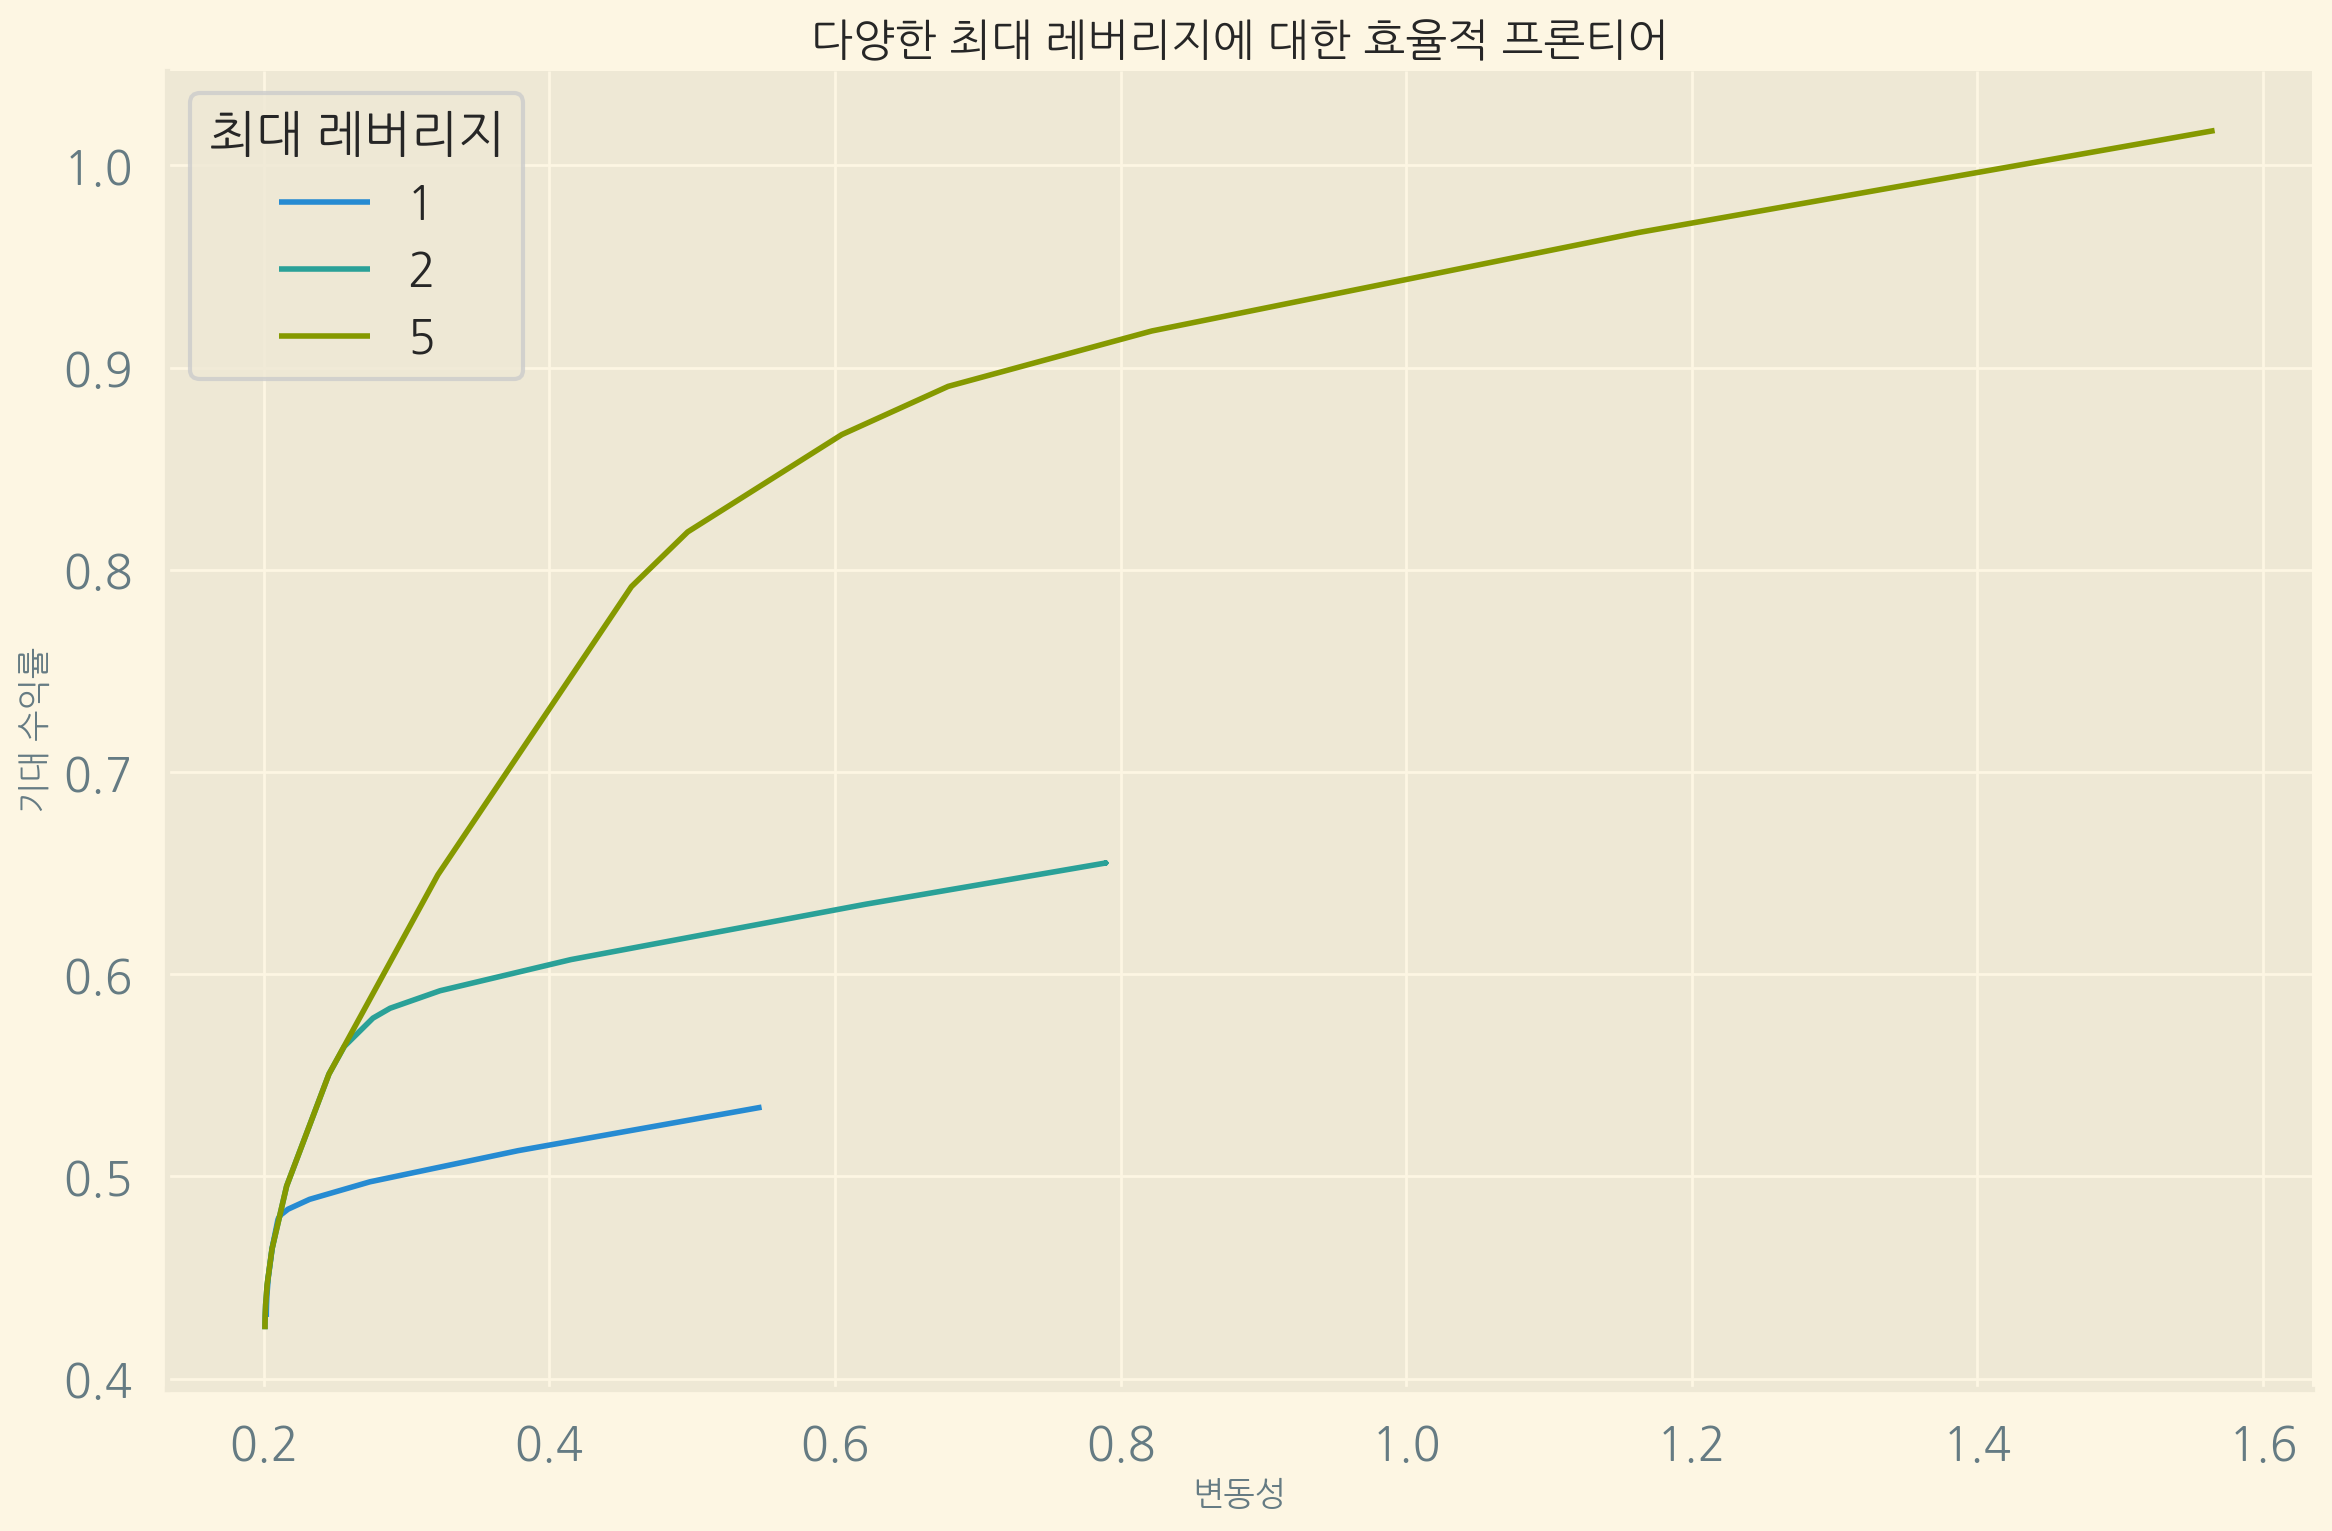

In [148]:
# 그래프를 그리기 위한 figure와 axes 객체를 생성합니다
fig, ax = plt.subplots()

# 각 레버리지 수준에 대해 효율적 프론티어를 그립니다
for leverage_index, leverage in enumerate(LEVERAGE_RANGE):
    # 포트폴리오 변동성과 수익률을 사용하여 선 그래프를 그립니다
    plt.plot(portf_vol_l[:, leverage_index], 
             portf_rtn_l[:, leverage_index], 
             label=f"{leverage}")

# 그래프의 제목과 축 레이블을 설정합니다
ax.set(title="다양한 최대 레버리지에 대한 효율적 프론티어",
       xlabel="변동성", 
       ylabel="기대 수익률")

# 범례를 추가하고 제목을 설정합니다
ax.legend(title="최대 레버리지")

# 그래프의 불필요한 테두리를 제거합니다
sns.despine()

# 그래프의 레이아웃을 조정합니다
plt.tight_layout()

# 그래프를 파일로 저장하려면 아래 주석을 해제하세요
# plt.savefig("images/figure_11_16", dpi=200)

Figure 11.16: 최대 레버리지 값에 따른 효율적 프론티어

마지막으로, 다양한 위험 회피 수준에 따른 가중치 할당을 보여주는 그래프도 다시 만듭니다. 최대 레버리지가 1인 경우에는 공매도가 없습니다.

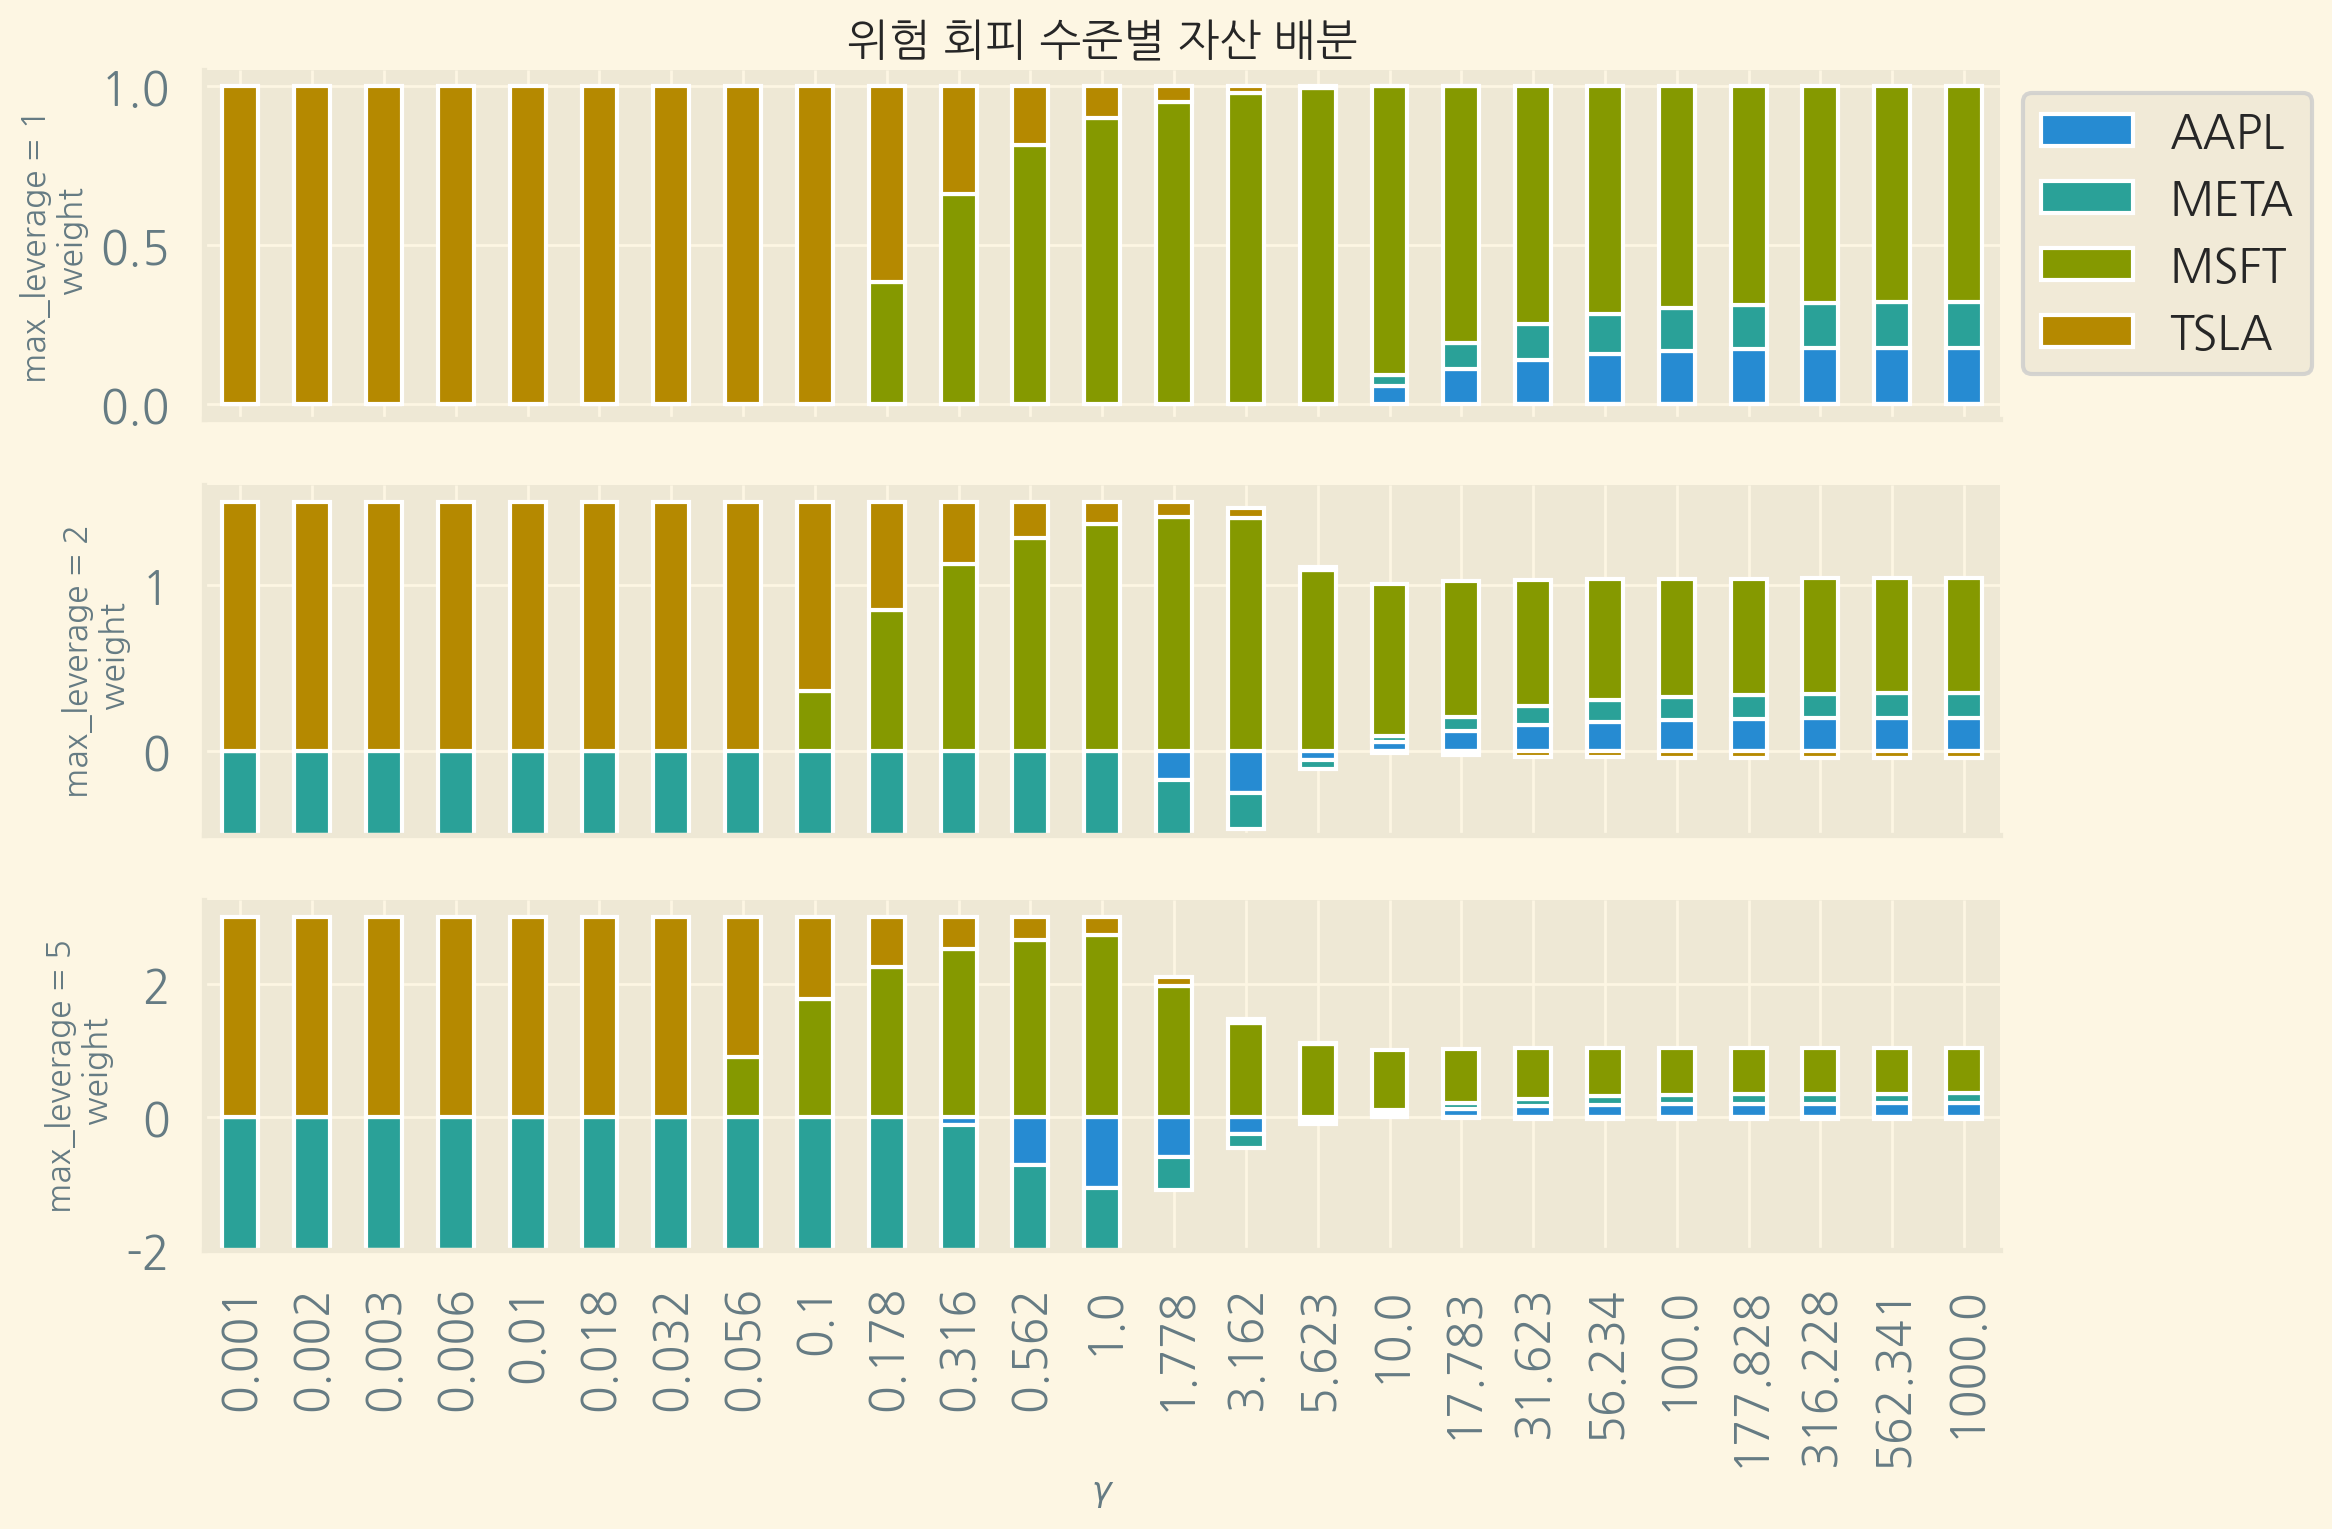

In [149]:
# 레버리지 수준별로 서브플롯 생성
fig, ax = plt.subplots(len_leverage, 1, sharex=True)

# 각 레버리지 수준에 대해 반복
for ax_index in range(len_leverage):
    # 가중치 데이터프레임 생성
    weights_df = pd.DataFrame(weights_ef[ax_index], 
                              columns=ASSETS, 
                              index=np.round(gamma_range, 3))
    
    # 누적 막대 그래프로 가중치 표시
    weights_df.plot(kind="bar", 
                    stacked=True, 
                    ax=ax[ax_index], 
                    legend=None) 
    
    # y축 레이블 설정
    ax[ax_index].set(
        ylabel=(f"max_leverage = {LEVERAGE_RANGE[ax_index]}" 
                "\n weight")
    )

# x축 레이블 설정 (마지막 서브플롯에만)    
ax[len_leverage - 1].set(xlabel=r"$\gamma$")

# 범례 추가 (첫 번째 서브플롯에만)
ax[0].legend(bbox_to_anchor=(1,1)) 

# 전체 그래프 제목 설정
ax[0].set_title("위험 회피 수준별 자산 배분",
                fontsize=16)

# 불필요한 테두리 제거
sns.despine()

# 레이아웃 조정
plt.tight_layout()

# 그래프 저장 (필요시 주석 해제)
# plt.savefig("images/figure_11_17", dpi=200)

Figure 11.17:  위험 회피 수준과 최대 레버리지에 따른 자산 배분

명확한 패턴을 확인할 수 있습니다: 위험 회피도가 증가함에 따라 투자자들은 레버리지 사용을 완전히 중단하고, 모든 최대 허용 레버리지 수준에서 유사한 배분으로 수렴합니다.

## 11.5 Finding the optimal portfolio with Hierarchical Risk Parity

**계층적 위험 균형(Hierarchical Risk Parity, HRP)을 사용한 최적 포트폴리오 찾기**

De Prado(2018)는 이차 최적화 기법이 불안정성, 집중화, 저조한 성과로 인해 신뢰할 수 없는 솔루션을 제공하는 경향이 있다고 설명합니다. 이러한 문제의 주요 원인은 공분산 행렬을 역행렬로 변환해야 하는데, 이 행렬이 수치적으로 불량 상태일 때 큰 오류를 유발할 수 있기 때문입니다. 또한, 투자 자산 간의 상관관계가 높을수록 분산 투자의 필요성이 커지며, 이는 포트폴리오 가중치 추정에서 더 큰 오류를 유발하는 "마코위츠의 저주"와 관련이 있습니다.
- 마코위츠의 저주: 자산의 수가 많을수록 공분산 행렬의 추정 오류가 커져, 포트폴리오의 가중치 계산이 부정확해질 수 있습니다.

잠재적인 해결책은 계층적 구조를 도입하는 것이며, 이를 통해 작은 추정 오류가 전혀 다른 자산 배분으로 이어지지 않게 할 수 있습니다. 이는 이차 최적화 기법이 가중치를 자유롭게 재조정할 수 있기 때문에 가능한 일입니다(명시적인 제약 조건이 없는 경우).

계층적 위험 균형(HRP)은 그래프 이론과 머신러닝 기법을 결합하여 공분산 행렬에 있는 정보를 기반으로 분산된 포트폴리오를 구축하는 새로운 포트폴리오 최적화 방법입니다. 알고리즘의 고수준 작업은 다음과 같습니다:

1. 자산의 상관관계(공분산 행렬)를 기반으로 거리 행렬을 계산합니다.
2. 거리 행렬을 기반으로 계층적 군집화를 수행하여 자산을 트리 구조로 클러스터링합니다.
3. 각 트리의 분기 내에서 최소 분산 포트폴리오를 계산합니다.
4. 트리의 레벨을 반복하며 각 노드에서 포트폴리오를 결합합니다.

알고리즘에 대한 자세한 설명은 De Prado(2018)를 참조하십시오.

HRP 접근 방식의 몇 가지 장점은 다음과 같습니다:
- 공분산 행렬의 정보를 완전히 활용하며, 역행렬로 변환할 필요가 없습니다.
- 클러스터링된 자산을 대체재가 아닌 보완재로 처리합니다.
- 알고리즘이 생성한 가중치는 더 안정적이고 견고합니다.
- 솔루션은 시각화를 통해 직관적으로 이해할 수 있습니다.
- 추가 제약 조건을 포함할 수 있습니다.
- 문헌에서는 이 방법이 고전적인 평균-분산 접근 방식보다 샘플 외 예측에서 더 우수한 성과를 보인다고 제안합니다.

이 방법에서는 미국 최대 10개 기술 기업의 주식으로 포트폴리오를 구성하기 위해 계층적 위험 균형 알고리즘을 적용합니다.

### How to do it...

1. Import the libraries:

In [150]:
import matplotlib.pyplot as plt

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [151]:
# 'seaborn' 스타일을 사용하도록 설정
plt.style.use('Solarize_Light2')


In [152]:
import yfinance as yf
import pandas as pd


In [153]:
from pypfopt.expected_returns import returns_from_prices
from pypfopt.expected_returns import returns_from_prices
from pypfopt.hierarchical_portfolio import HRPOpt
from pypfopt.discrete_allocation import (
    DiscreteAllocation, get_latest_prices
)
from pypfopt import plotting

2. Download the stock prices of the 10 biggest US tech companies:

In [154]:
ASSETS = ["AAPL", "MSFT", "AMZN", "GOOG", "META", 
          "V", "NVDA", "MA", "PYPL", "NFLX"]

prices_df = yf.download(ASSETS, 
                        start="2021-01-01", 
                        end="2021-12-31")
prices_df = prices_df["Adj Close"]
prices_df

[*********************100%***********************]  10 of 10 completed


Ticker                           AAPL        AMZN        GOOG          MA  \
Date                                                                        
2021-01-04 00:00:00+00:00  126.683434  159.331497   86.200310  343.640259   
2021-01-05 00:00:00+00:00  128.249725  160.925507   86.832756  339.661133   
2021-01-06 00:00:00+00:00  123.932632  156.919006   86.551941  339.788208   
2021-01-07 00:00:00+00:00  128.161606  158.108002   89.143578  342.480164   
2021-01-08 00:00:00+00:00  129.267838  159.134995   90.139130  346.386047   
...                               ...         ...         ...         ...   
2021-12-23 00:00:00+00:00  173.629761  171.068497  146.782028  354.256439   
2021-12-27 00:00:00+00:00  177.618866  169.669495  147.701263  353.991211   
2021-12-28 00:00:00+00:00  176.594498  170.660995  146.089233  354.452881   
2021-12-29 00:00:00+00:00  176.683151  169.201004  146.145599  354.954041   
2021-12-30 00:00:00+00:00  175.520889  168.644501  145.644821  354.659302   

Ticker                           META        MSFT        NFLX       NVDA  \
Date                                                                       
2021-01-04 00:00:00+00:00  268.132690  210.844284  522.859985  13.081204   
2021-01-05 00:00:00+00:00  270.156586  211.047653  520.799988  13.371737   
2021-01-06 00:00:00+00:00  262.519592  205.575363  500.489990  12.583434   
2021-01-07 00:00:00+00:00  267.933258  211.425415  508.890015  13.311138   
2021-01-08 00:00:00+00:00  266.766815  212.713608  510.399994  13.244053   
...                               ...         ...         ...        ...   
2021-12-23 00:00:00+00:00  334.233643  326.882233  614.090027  29.592827   
2021-12-27 00:00:00+00:00  345.140808  334.461243  613.119995  30.895750   
2021-12-28 00:00:00+00:00  345.180695  333.289154  610.710022  30.273741   
2021-12-29 00:00:00+00:00  341.910553  333.972870  610.539978  29.953251   
2021-12-30 00:00:00+00:00  343.326263  331.404205  612.090027  29.538914   

Ticker                           PYPL           V  
Date                                               
2021-01-04 00:00:00+00:00  231.919998  211.898743  
2021-01-05 00:00:00+00:00  234.910004  208.736221  
2021-01-06 00:00:00+00:00  226.830002  206.897125  
2021-01-07 00:00:00+00:00  235.039993  208.055069  
2021-01-08 00:00:00+00:00  242.460007  209.650940  
...                               ...         ...  
2021-12-23 00:00:00+00:00  192.009995  212.084259  
2021-12-27 00:00:00+00:00  192.009995  213.073120  
2021-12-28 00:00:00+00:00  190.100006  213.484344  
2021-12-29 00:00:00+00:00  189.970001  213.601822  
2021-12-30 00:00:00+00:00  191.880005  213.308121  

[251 rows x 10 columns]

3. Calculate the returns from prices:

라이브러리를 가져온 후, 2021년 미국 최대 10개 기술 기업의 주가를 다운로드합니다. 3단계에서는 `returns_from_prices` 함수를 사용해 일일 주식 수익률을 포함하는 데이터프레임을 만듭니다.

In [155]:
rtn_df = returns_from_prices(prices_df)

In [156]:
rtn_df

Ticker                         AAPL      AMZN      GOOG        MA      META  \
Date                                                                          
2021-01-05 00:00:00+00:00  0.012364  0.010004  0.007337 -0.011579  0.007548   
2021-01-06 00:00:00+00:00 -0.033662 -0.024897 -0.003234  0.000374 -0.028269   
2021-01-07 00:00:00+00:00  0.034123  0.007577  0.029943  0.007922  0.020622   
2021-01-08 00:00:00+00:00  0.008632  0.006496  0.011168  0.011405 -0.004353   
2021-01-11 00:00:00+00:00 -0.023249 -0.021519 -0.022405 -0.015967 -0.040102   
...                             ...       ...       ...       ...       ...   
2021-12-23 00:00:00+00:00  0.003644  0.000184  0.001317  0.008671  0.014495   
2021-12-27 00:00:00+00:00  0.022975 -0.008178  0.006263 -0.000749  0.032633   
2021-12-28 00:00:00+00:00 -0.005767  0.005844 -0.010914  0.001304  0.000116   
2021-12-29 00:00:00+00:00  0.000502 -0.008555  0.000386  0.001414 -0.009474   
2021-12-30 00:00:00+00:00 -0.006578 -0.003289 -0.003427 -0.000830  0.004141   

Ticker                         MSFT      NFLX      NVDA      PYPL         V  
Date                                                                         
2021-01-05 00:00:00+00:00  0.000965 -0.003940  0.022210  0.012892 -0.014925  
2021-01-06 00:00:00+00:00 -0.025929 -0.038998 -0.058953 -0.034396 -0.008811  
2021-01-07 00:00:00+00:00  0.028457  0.016784  0.057830  0.036194  0.005597  
2021-01-08 00:00:00+00:00  0.006093  0.002967 -0.005040  0.031569  0.007670  
2021-01-11 00:00:00+00:00 -0.009699 -0.022139  0.025966 -0.020457 -0.011882  
...                             ...       ...       ...       ...       ...  
2021-12-23 00:00:00+00:00  0.004472 -0.000244  0.008163  0.001722 -0.006148  
2021-12-27 00:00:00+00:00  0.023186 -0.001580  0.044028  0.000000  0.004663  
2021-12-28 00:00:00+00:00 -0.003504 -0.003931 -0.020133 -0.009947  0.001930  
2021-12-29 00:00:00+00:00  0.002051 -0.000278 -0.010586 -0.000684  0.000550  
2021-12-30 00:00:00+00:00 -0.007691  0.002539 -0.013833  0.010054 -0.001375  

[250 rows x 10 columns]

4. Find the optimal allocation using Hierarchical Risk Parity:

4단계에서는 `HRPOpt` 객체를 인스턴스화하고 주식 수익률을 입력으로 전달합니다. 그런 다음 `optimize` 메서드를 사용해 최적의 가중치를 찾습니다. 알고리즘을 설명할 때 공분산 행렬을 기반으로 한다고 언급했지만, 실제로는 수익률 시리즈를 입력으로 사용합니다. `returns` 인수를 전달할 때 클래스는 내부적으로 공분산 행렬을 계산합니다. 또는 `cov_matrix` 인수를 사용해 공분산 행렬을 직접 전달할 수도 있습니다.

공분산 행렬을 직접 전달할 때는 샘플 공분산 대신 다른 공분산 형태를 사용할 수 있습니다. 예를 들어, Ledoit-Wolf 축소법이나 오라클 근사 축소법(OAS)을 사용할 수 있습니다. 이러한 방법에 대한 참고 자료는 "See also" 섹션에서 찾을 수 있습니다.


In [157]:
# HRPOpt 객체를 생성합니다. returns 매개변수에 일일 수익률 데이터프레임을 전달합니다.
hrp = HRPOpt(returns=rtn_df)

# optimize() 메서드를 호출하여 계층적 위험 패리티(HRP) 알고리즘을 실행합니다.
# 이 과정에서 자산들이 클러스터링되고 최적의 포트폴리오 가중치가 계산됩니다.
hrp.optimize()

OrderedDict([('AAPL', 0.13064605440660707),
             ('AMZN', 0.15614835747358385),
             ('GOOG', 0.08532380684834506),
             ('MA', 0.0998442722096926),
             ('META', 0.0811117867138575),
             ('MSFT', 0.10916005661349512),
             ('NFLX', 0.10213807170249378),
             ('NVDA', 0.04432888673478322),
             ('PYPL', 0.05298080359635431),
             ('V', 0.13831790370078745)])

5. Display the (cleaned) weights:

그런 다음, `clean_weights` 메서드를 사용해 정리된 가중치를 표시합니다. 이 메서드는 가중치를 소수점 5자리로 반올림하고, 일정 임계값 아래의 모든 가중치를 0으로 설정합니다. 

In [158]:
# HRPOpt 객체의 clean_weights() 메서드를 사용하여 최적화된 포트폴리오 가중치를 얻습니다.
# clean_weights()는 가중치를 정리하여 소수점 자리를 제한하고 매우 작은 값을 제거합니다.
weights = hrp.clean_weights()

# 정리된 포트폴리오 가중치를 출력합니다.
# 각 주식의 티커와 해당 가중치가 표시됩니다.
print("최적화된 포트폴리오 가중치:")
print(weights)

# 참고: 가중치의 합은 1(또는 100%)에 가까워야 합니다.
# 이는 전체 포트폴리오를 구성하는 데 모든 자금이 할당되었음을 의미합니다.

최적화된 포트폴리오 가중치:
OrderedDict([('AAPL', 0.13065), ('AMZN', 0.15615), ('GOOG', 0.08532), ('MA', 0.09984), ('META', 0.08111), ('MSFT', 0.10916), ('NFLX', 0.10214), ('NVDA', 0.04433), ('PYPL', 0.05298), ('V', 0.13832)])


We can create a simple pie chart to visualize the optimized portfolio weights:

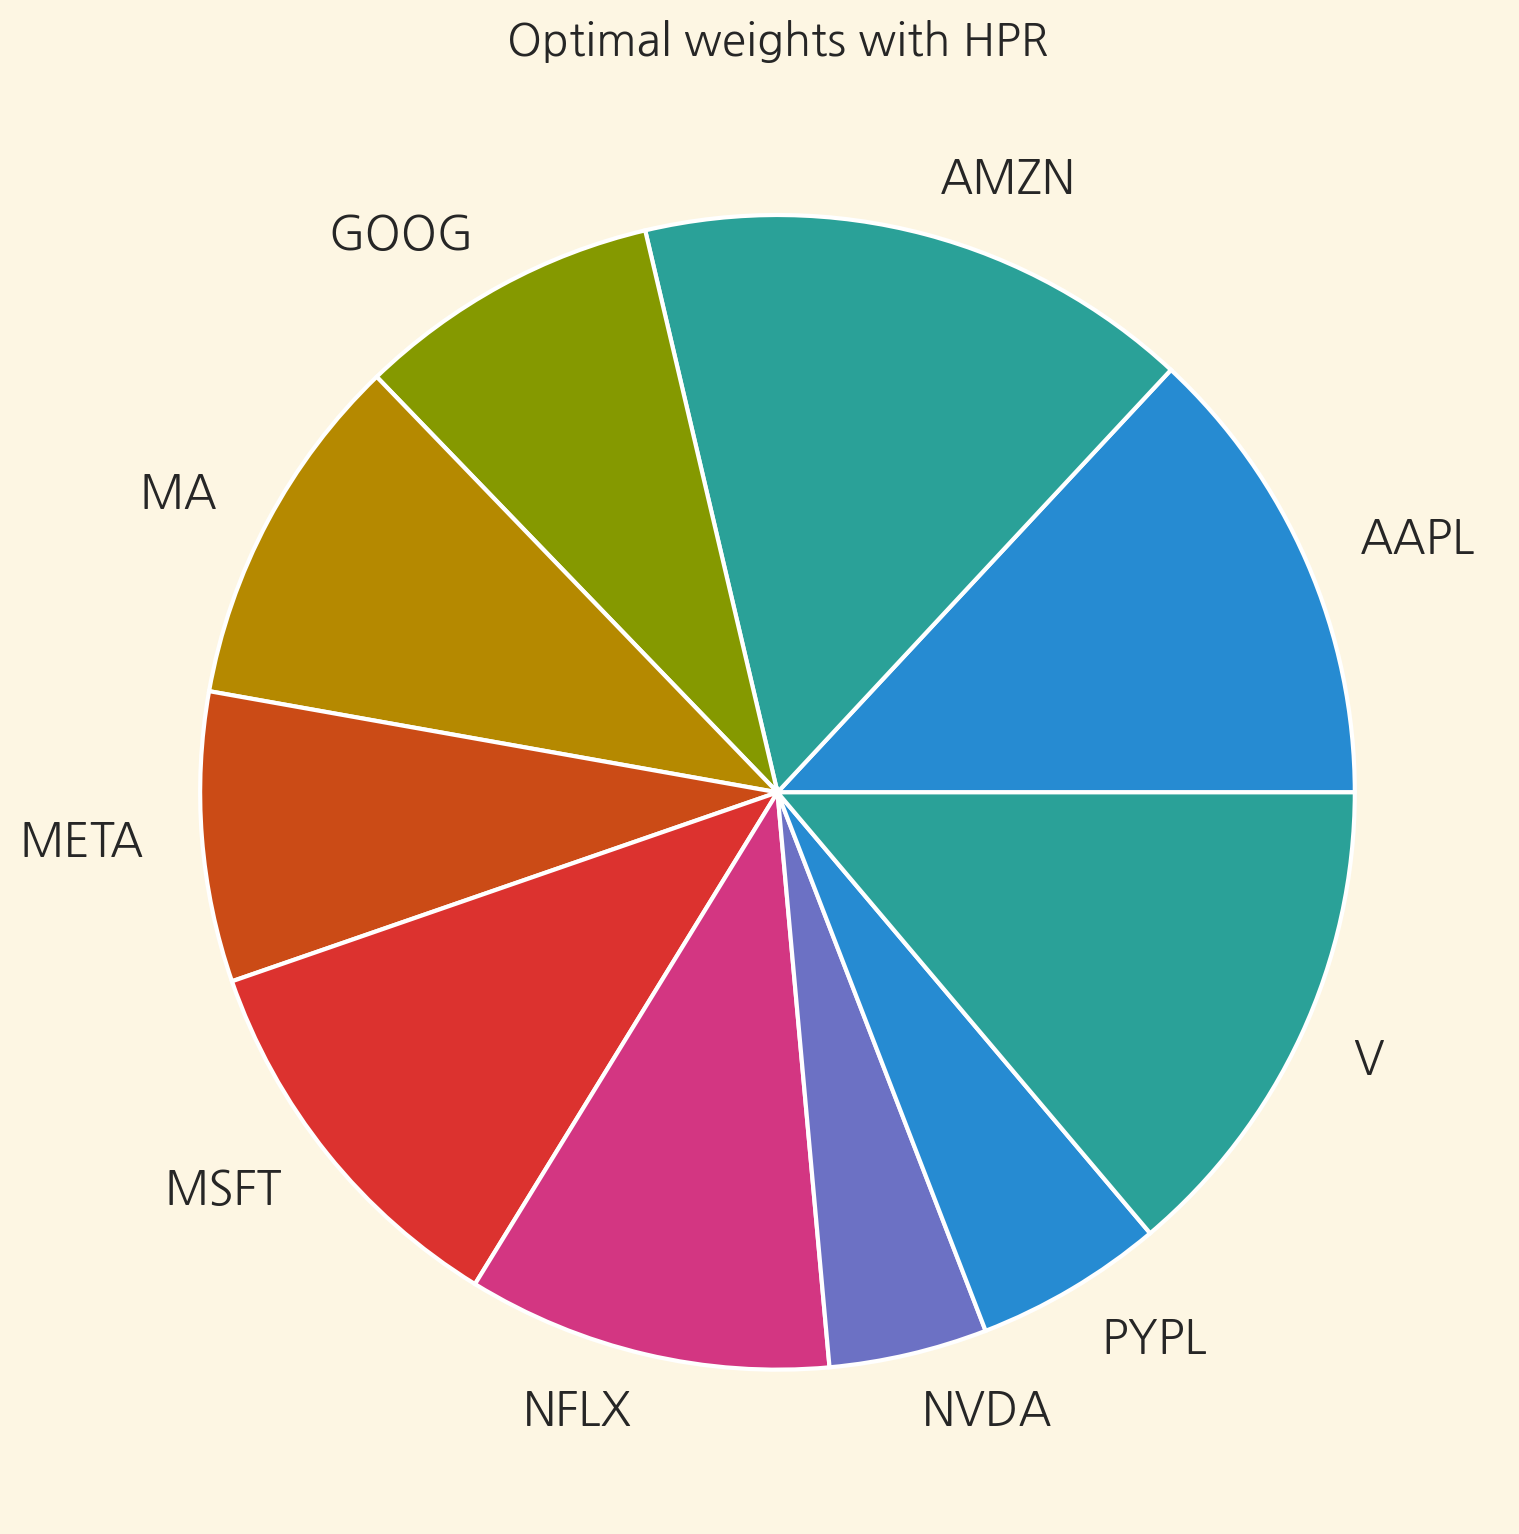

In [159]:
pd.Series(weights).plot(kind="pie",
                        title="Optimal weights with HPR");

sns.despine()
plt.tight_layout()

6. Calculate the portfolio performance:

6단계에서는 `portfolio_performance` 메서드를 사용해 포트폴리오의 예상 성과를 계산합니다. 이 과정에서 기본 무위험 수익률을 0%로 변경합니다.

In [160]:
hrp.portfolio_performance(verbose=True, risk_free_rate=0);

Expected annual return: 25.2%
Annual volatility: 19.2%
Sharpe Ratio: 1.31


7. Visualize the hierarchical clustering used for finding the portfolio weights:

7단계에서는 `plot_dendrogram` 함수를 사용해 계층적 군집화 결과를 그래프로 나타냅니다. 이 함수로 생성된 그래프는 알고리즘의 작동 방식과 자산이 어떻게 클러스터링되었는지를 이해하는 데 매우 유용합니다.


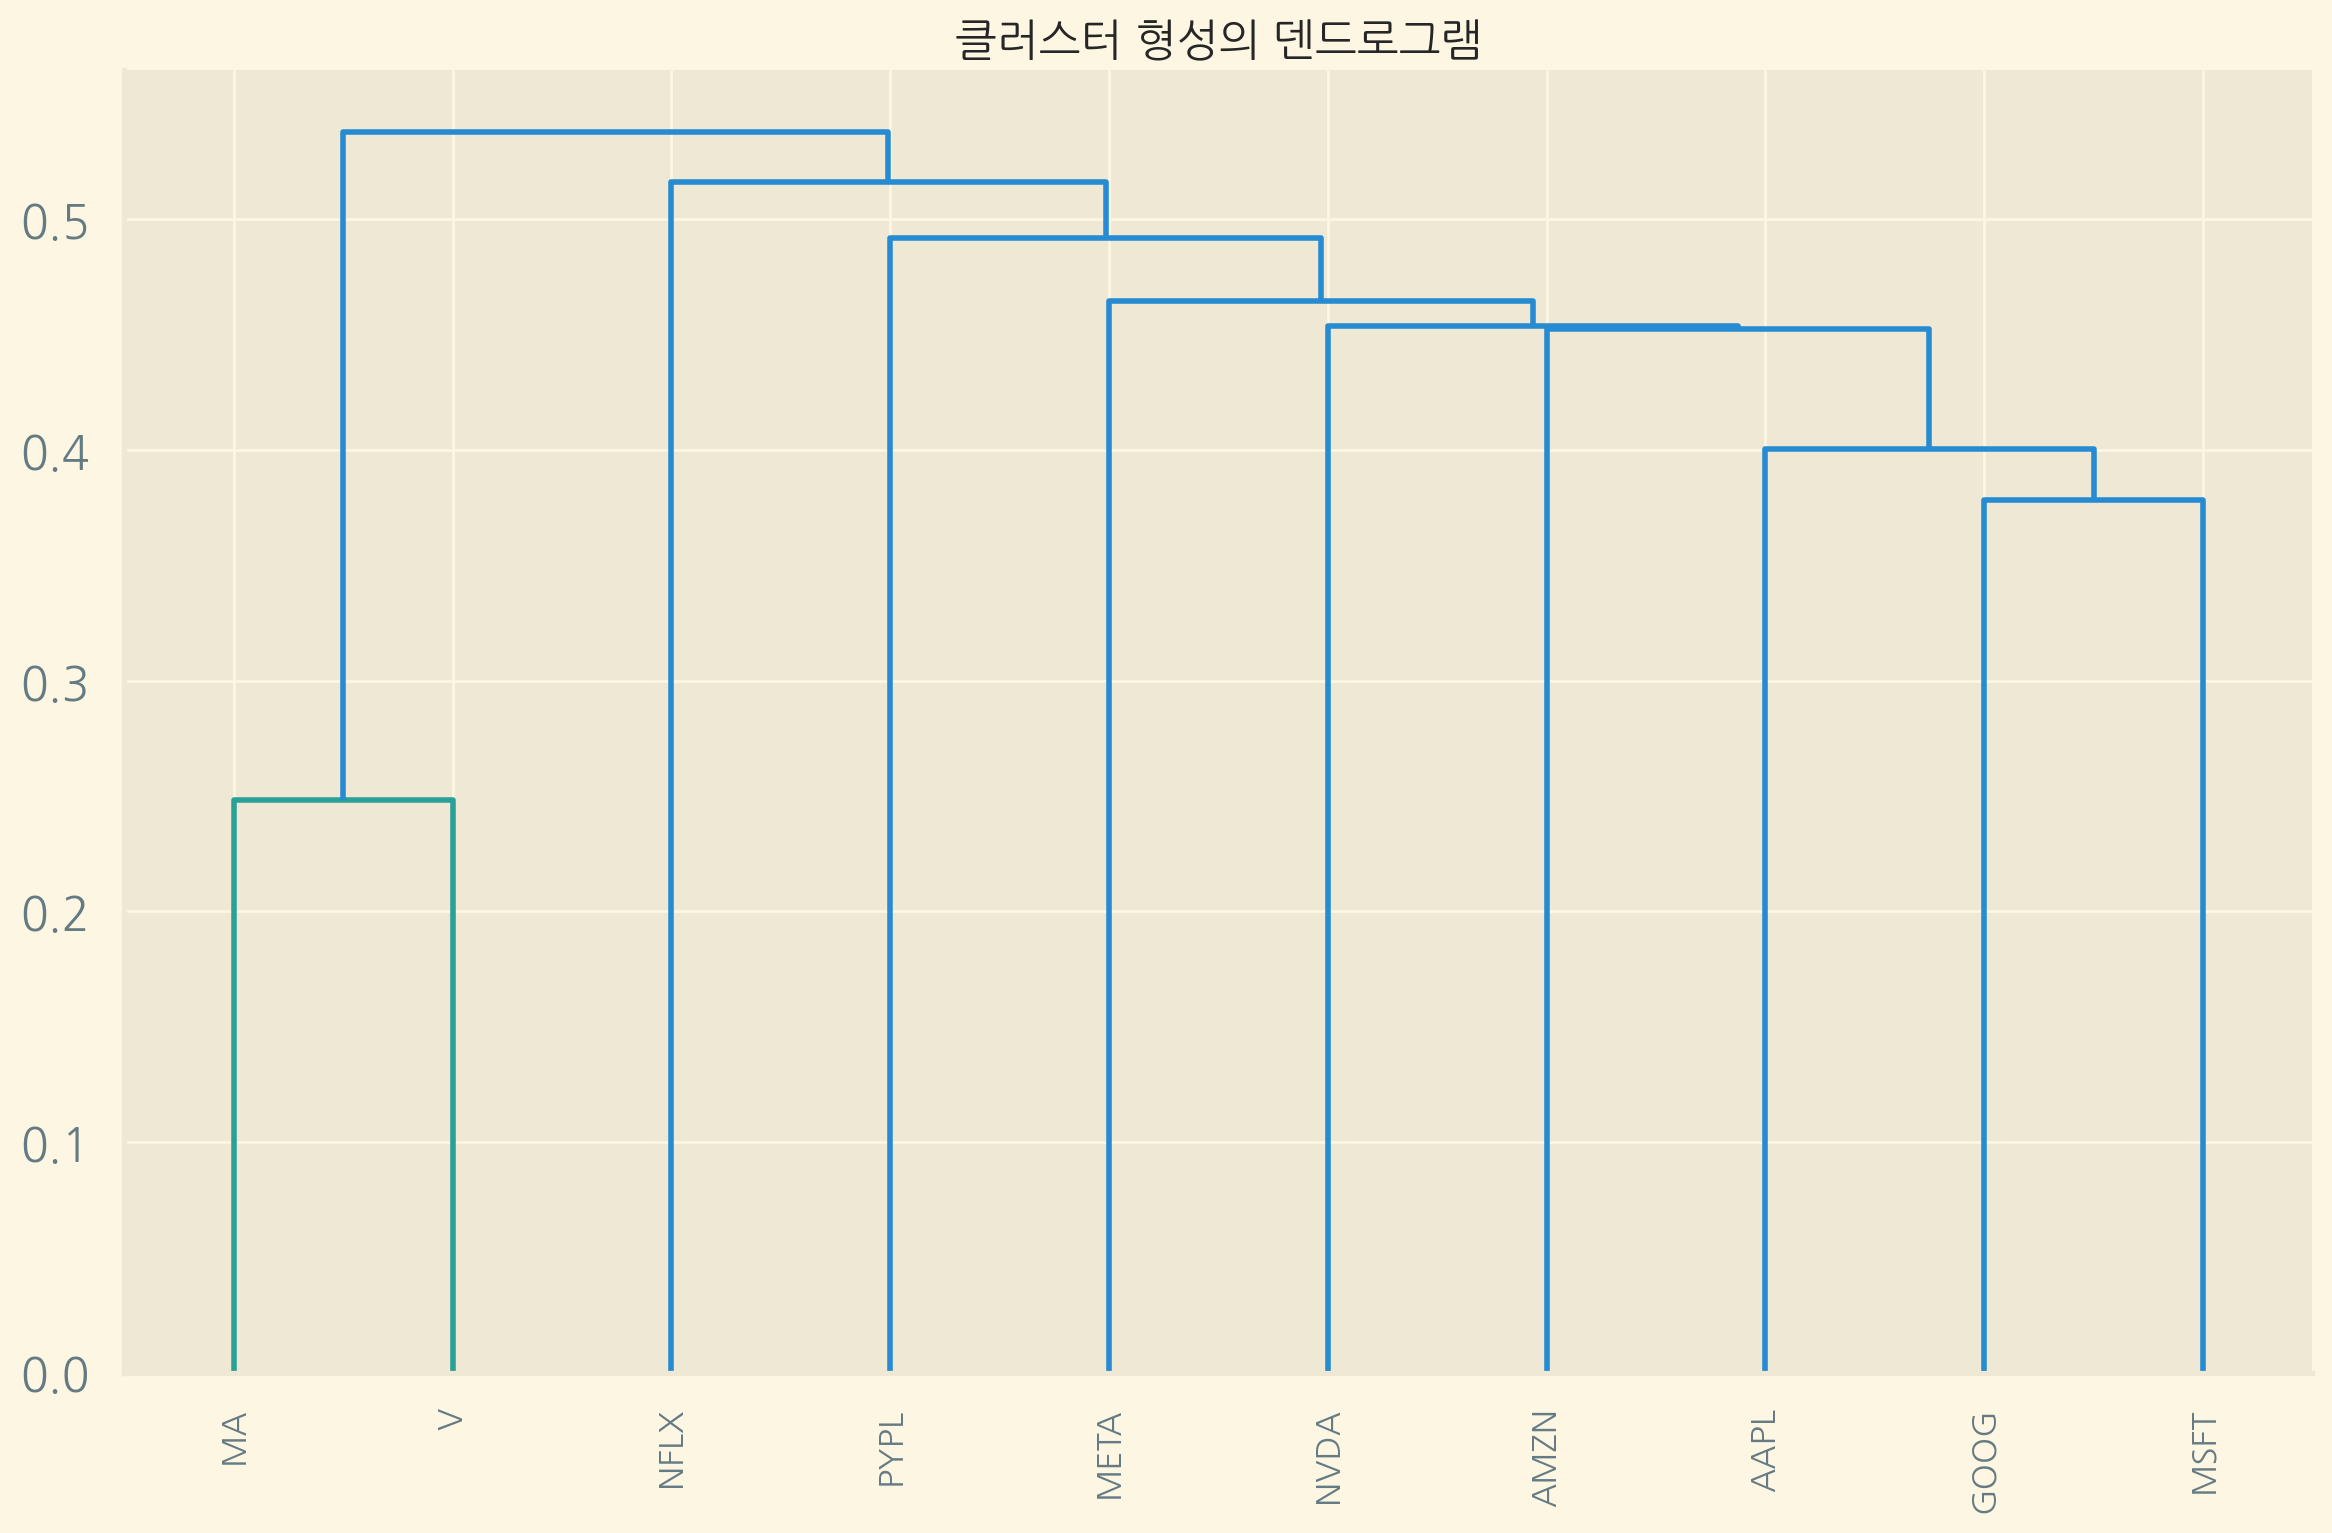

In [161]:
# 계층적 군집화 결과를 시각화하는 덴드로그램을 생성합니다
fig, ax = plt.subplots()

# HRP 객체를 사용하여 덴드로그램을 그립니다
plotting.plot_dendrogram(hrp, ax=ax)

# 그래프 제목을 설정합니다
ax.set_title("클러스터 형성의 덴드로그램")

# 그래프의 테두리를 제거하여 시각적으로 깔끔하게 만듭니다
sns.despine()

# 그래프의 레이아웃을 조정하여 모든 요소가 잘 보이도록 합니다
plt.tight_layout()

# 아래 주석 처리된 코드는 그래프를 이미지 파일로 저장하는 옵션입니다
# plt.savefig("images/figure_11_18", dpi=200)

Figure 11.18: Dendrogram visualizing the process of cluster formation

**Figure 11.18에서 비자(Visa)와 마스터카드(MasterCard)와 같은 회사들이 함께 클러스터링된 것을 볼 수 있습니다. 이 그래프에서 y축은 병합될 두 개의 잎 사이의 거리를 나타냅니다.**

이는 합리적인 결과입니다. 만약 우리가 비자와 같은 미국의 상장된 신용카드 회사에 투자하려 한다면, 매우 유사한 회사인 마스터카드에 대한 비중을 추가하거나 줄이는 것을 고려할 수 있습니다. 구글(Google)과 마이크로소프트(Microsoft)의 경우도 마찬가지이며, 두 회사 간의 차이는 더 크지만, 자산 간의 상관관계에 계층 구조를 적용하는 것이 바로 이 아이디어입니다.

8. Find the number of stocks to buy using 50,000 USD:

8단계에서는 계산된 가중치를 기반으로 이산 배분을 수행합니다. 우리는 50,000달러를 가지고 있으며, HRP 가중치를 최대한 많이 할당하고자 합니다. 먼저 2021년 12월 30일의 최신 가격을 사용해 다운로드한 가격에서 최신 가격을 복원합니다. 그런 다음, `DiscreteAllocation` 클래스의 객체를 인스턴스화하고 가중치, 최신 가격, 예산을 제공합니다. 마지막으로, `lp_portfolio` 메서드를 사용해 선형 계획법을 통해 주식의 개수와 남은 돈을 찾습니다.

선형 계획법의 대안으로는 `greedy_portfolios` 메서드를 통해 사용할 수 있는 탐욕적 반복 검색을 사용하는 방법이 있습니다.

In [162]:
# 가장 최근의 주식 가격을 가져옵니다
latest_prices = get_latest_prices(prices_df)

# DiscreteAllocation 객체를 생성합니다
# 이 객체는 주어진 가중치와 가격을 바탕으로 실제 구매할 주식 수를 계산합니다
allocation_finder = DiscreteAllocation(weights, 
                                       latest_prices, 
                                       total_portfolio_value=50000)

# 선형 계획법을 사용하여 최적의 주식 할당을 계산합니다
# allocation은 각 주식의 구매 수량을, leftover는 남은 현금을 나타냅니다
allocation, leftover = allocation_finder.lp_portfolio()

# 계산된 주식 할당 결과를 출력합니다
print("각 주식의 구매 수량:")
print(allocation)

# 남은 현금을 출력합니다
print("남은 현금:")
print(leftover)

각 주식의 구매 수량:
{'AAPL': 37, 'AMZN': 47, 'GOOG': 29, 'MA': 14, 'META': 12, 'MSFT': 17, 'NFLX': 8, 'NVDA': 75, 'PYPL': 14, 'V': 32}
남은 현금:
12.40010722270381


In [163]:
# 탐욕적 반복 알고리즘을 사용한 대안적 할당 방법
# 이 방법은 최적해를 보장하지는 않지만, 빠르고 간단한 해결책을 제공합니다

# greedy_portfolio() 메서드를 사용하여 주식 할당을 계산합니다
allocation, leftover = allocation_finder.greedy_portfolio()

# 계산된 각 주식의 할당 수량을 출력합니다
print("탐욕적 알고리즘으로 계산된 각 주식의 구매 수량:")
print(allocation)

# 할당 후 남은 현금을 출력합니다
print("할당 후 남은 현금:")
print(leftover)

# 참고: 이 방법은 선형 계획법과 다른 결과를 제공할 수 있으며,
# 때로는 더 많은 현금이 남을 수 있습니다.

탐욕적 알고리즘으로 계산된 각 주식의 구매 수량:
{'AMZN': 46, 'V': 32, 'AAPL': 37, 'MSFT': 16, 'NFLX': 9, 'MA': 14, 'GOOG': 29, 'META': 12, 'PYPL': 13, 'NVDA': 75}
할당 후 남은 현금:
92.2388801574707


### There's more

`PyPortfolioOpt`는 우리가 다룬 내용보다 더 많은 기능을 제공합니다. 예를 들어, 효율적 프론티어를 얻는 과정을 크게 단순화할 수 있습니다. 다음 단계를 통해 이를 계산할 수 있습니다.

1. Import the libraries:

In [167]:
# 예상 수익률을 계산하기 위한 함수를 가져옵니다
from pypfopt.expected_returns import mean_historical_return

# 리스크 모델(공분산 행렬)을 계산하기 위한 함수를 가져옵니다
from pypfopt.risk_models import CovarianceShrinkage

# 효율적 프론티어를 계산하기 위한 클래스를 가져옵니다
from pypfopt.efficient_frontier import EfficientFrontier

# 효율적 프론티어를 시각화하기 위한 함수를 가져옵니다
from pypfopt.plotting import plot_efficient_frontier

2. Get the expected returns and the covariance matrix:

이 장에서 이미 여러 번 언급했듯이, 평균-분산 최적화에는 두 가지 요소가 필요합니다: 자산의 예상 수익률과 공분산 행렬입니다. `PyPortfolioOpt`는 두 가지를 계산하는 여러 가지 방법을 제공합니다. 공분산 행렬의 대안에 대해서는 이미 언급했지만, 예상 수익률의 경우 다음을 사용할 수 있습니다: 역사적 평균 수익률, 지수 가중된 평균 역사적 수익률, 그리고 CAPM 수익률 추정치입니다. 여기에서는 역사적 평균과 Ledoit-Wolf 축소 추정치의 공분산 행렬을 계산했습니다.

In [168]:
# 역사적 평균 수익률 계산
mu = mean_historical_return(prices_df)

# Ledoit-Wolf 방법을 사용하여 공분산 행렬 추정
# 이 방법은 표본 공분산 행렬의 노이즈를 줄이는 데 도움이 됩니다
S = CovarianceShrinkage(prices_df).ledoit_wolf()

# mu: 각 자산의 예상 수익률 벡터
# S: 자산 간의 공분산 행렬
# 이 두 요소는 포트폴리오 최적화에 필수적입니다

3. Find and plot the Efficient Frontier:

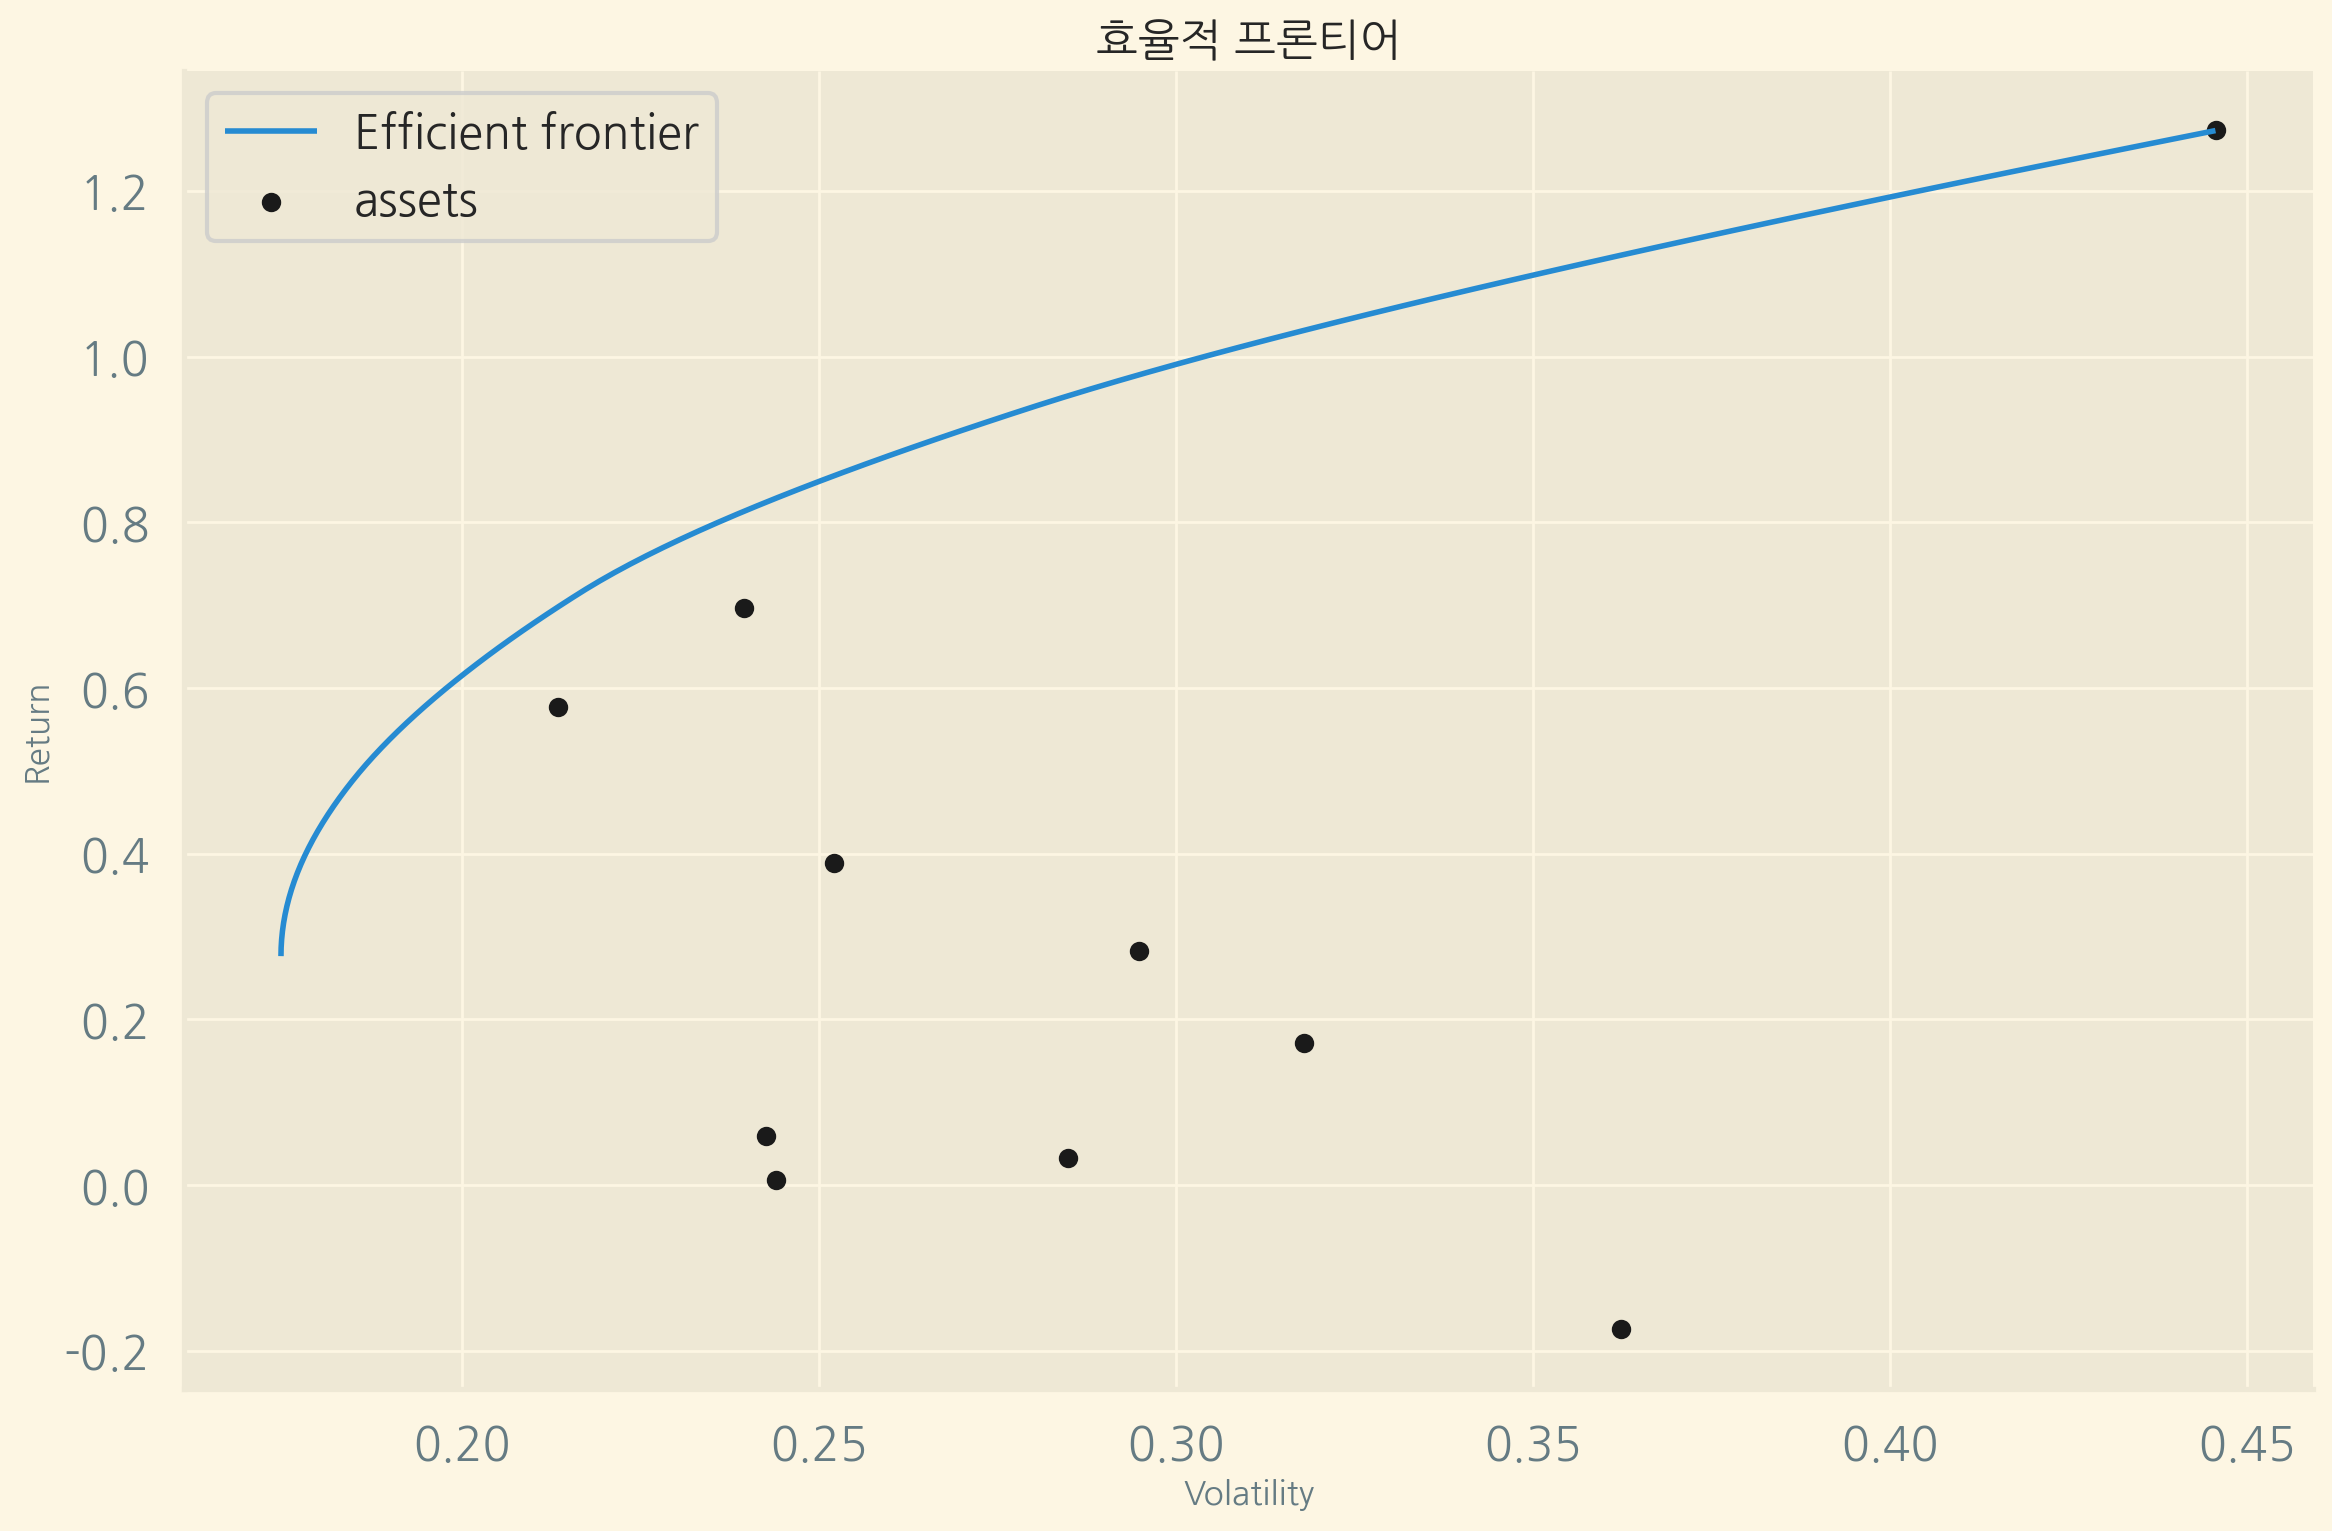

In [170]:
# 효율적 프론티어 객체 생성
ef = EfficientFrontier(mu, S)

# 그래프를 그리기 위한 figure와 axes 객체 생성
fig, ax = plt.subplots()

# 효율적 프론티어 그리기
# show_assets=True로 설정하여 개별 자산도 함께 표시
plot_efficient_frontier(ef, ax=ax, show_assets=True)

# 그래프 제목 설정
ax.set_title("효율적 프론티어")

# 그래프 테두리 제거 (위쪽과 오른쪽)
sns.despine()

# 그래프 레이아웃 조정
plt.tight_layout()

# 그래프를 파일로 저장하려면 아래 주석을 해제하세요
# plt.savefig("images/figure_11_19", dpi=200)

4. Identify the tangency portfolio:

In [171]:
# 효율적 프론티어 객체 생성
ef = EfficientFrontier(mu, S)

# 최대 샤프 비율 포트폴리오 찾기
# risk_free_rate=0은 무위험 수익률을 0으로 설정
weights = ef.max_sharpe(risk_free_rate=0)

# 최적화된 포트폴리오 가중치 출력
# clean_weights() 메서드는 매우 작은 가중치를 0으로 설정하여 결과를 정리
print(ef.clean_weights())


OrderedDict([('AAPL', 0.0), ('AMZN', 0.0), ('GOOG', 0.51897), ('MA', 0.0), ('META', 0.0), ('MSFT', 0.19993), ('NFLX', 0.0), ('NVDA', 0.28109), ('PYPL', 0.0), ('V', 0.0)])


In [173]:
# 포트폴리오 성과 평가
# verbose=True: 자세한 출력 결과를 표시
# risk_free_rate=0: 무위험 수익률을 0으로 설정
ef.portfolio_performance(verbose=True, risk_free_rate=0);

# 이 코드는 다음과 같은 정보를 출력합니다:
# - 예상 연간 수익률
# - 연간 변동성 (위험)
# - 샤프 비율 (위험 대비 수익률)
# 샤프 비율이 높을수록 더 좋은 포트폴리오 성과를 나타냅니다.

Expected annual return: 83.5%
Annual volatility: 24.6%
Sharpe Ratio: 3.40


We get a warning when we are trying to use a different risk-free rate as the one used for finding the tangency portfolio.

In [174]:
# 포트폴리오 성과를 평가하고 결과를 자세히 출력합니다.
# verbose=True 옵션은 상세한 결과를 표시합니다.
# 이 함수는 예상 수익률, 변동성, 샤프 비율을 계산합니다.
# 주의: 이전에 사용된 무위험 수익률과 다른 값을 사용하면 경고가 발생할 수 있습니다.
ef.portfolio_performance(verbose=True);

Expected annual return: 83.5%
Annual volatility: 24.6%
Sharpe Ratio: 3.40


/home/restful3/anaconda3/envs/ml4t/lib/python3.10/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


**`EfficientFrontier` 클래스는 접선 포트폴리오를 식별하는 것 외에도 다음과 같은 방법을 제공합니다:**

- `min_volatility`: 최소 변동성의 포트폴리오를 찾습니다.
- `max_quadratic_utility`: 위험 회피 수준이 주어진 경우, 이차 효용을 최대화하는 포트폴리오를 찾습니다. 이는 이전 방법에서 다룬 접근 방식과 동일합니다.
- `efficient_risk`: 주어진 목표 위험에 대한 수익을 최대화하는 포트폴리오를 찾습니다.
- `efficient_return`: 주어진 목표 수익에 대한 위험을 최소화하는 포트폴리오를 찾습니다.

마지막 두 옵션을 사용하여 시장 중립 포트폴리오(즉, 가중치의 합이 0인 포트폴리오)를 생성할 수 있습니다.

이전에 언급했듯이, 우리가 보여준 기능은 빙산의 일각일 뿐입니다. 이 라이브러리를 사용하여 다음과 같은 추가 기능을 탐색할 수 있습니다:

- **섹터 제약 조건 포함:** 예를 들어, 다양한 섹터의 주식을 포함하되, 기술 주식에 최소 20%를 할당하도록 조건을 설정할 수 있습니다.
- **거래 비용 최적화:** 이미 포트폴리오가 있고 리밸런싱을 원할 때, 완전한 리밸런싱은 비용이 많이 들 수 있습니다(평균-분산 최적화의 큰 단점인 가중치 불안정성을 고려할 때). 이 경우, 거래 비용을 가능한 낮게 유지하면서 포트폴리오를 리밸런싱하는 추가 목표를 설정할 수 있습니다.
- **L2 정규화를 사용하여 포트폴리오 최적화:** 정규화를 사용하여 많은 가중치가 0으로 떨어지는 현상을 방지합니다. 다양한 감마 값으로 실험하여 최적의 자산 배분을 찾을 수 있습니다. 유명한 Ridge Regression 알고리즘 덕분에 L2 정규화에 익숙할 수 있습니다.
- **Black-Litterman 모델 사용:** 역사적 평균 수익률만 사용하는 것보다 예상 수익률의 더 안정적인 모델을 얻을 수 있습니다. 이는 특정 자산에 대한 사전 수익률 추정치와 시장 견해를 결합하여 예상 수익률의 사후 추정치를 얻는 베이지안 접근법입니다.

GitHub의 노트북에서는 공매도를 허용하거나 L2 정규화를 사용하는 효율적 프론티어 찾기 예제도 찾아볼 수 있습니다.

또한, 예상 수익률을 사용하지 않는 방법으로도 실험할 수 있습니다. 문헌에 따르면, 예상 수익률의 정확한 추정치를 얻는 것이 어려움으로 인해, 최소 분산 포트폴리오가 샘플 외 테스트에서 최대 샤프 비율 포트폴리오를 꾸준히 능가한다고 제안합니다.

5. Add L2 regularization to the portfolio optimization problem:

In [176]:
# pypfopt의 objective_functions 모듈을 가져옵니다.
from pypfopt import objective_functions

# 이전에 정의한 기대수익률(mu)과 공분산 행렬(S)을 사용하여 EfficientFrontier 객체를 생성합니다.
ef = EfficientFrontier(mu, S)

# L2 정규화를 목적 함수로 추가합니다. gamma는 정규화의 강도를 조절하는 파라미터입니다.
# 이는 포트폴리오 가중치의 극단적인 값을 방지하는 데 도움이 됩니다.
ef.add_objective(objective_functions.L2_reg, gamma=0.2)

# 무위험 수익률을 0으로 설정하고 샤프 비율을 최대화하는 포트폴리오 가중치를 계산합니다.
weights = ef.max_sharpe(risk_free_rate=0)

# 계산된 가중치를 정리하고 출력합니다. 
# clean_weights() 메서드는 매우 작은 가중치를 0으로 설정하여 결과를 더 깔끔하게 만듭니다.
print(ef.clean_weights())

OrderedDict([('AAPL', 0.07334), ('AMZN', 0.0), ('GOOG', 0.29714), ('MA', 0.0), ('META', 0.0), ('MSFT', 0.21838), ('NFLX', 0.0), ('NVDA', 0.41114), ('PYPL', 0.0), ('V', 0.0)])


6. Find the tangency portfolio with short-selling allowed:

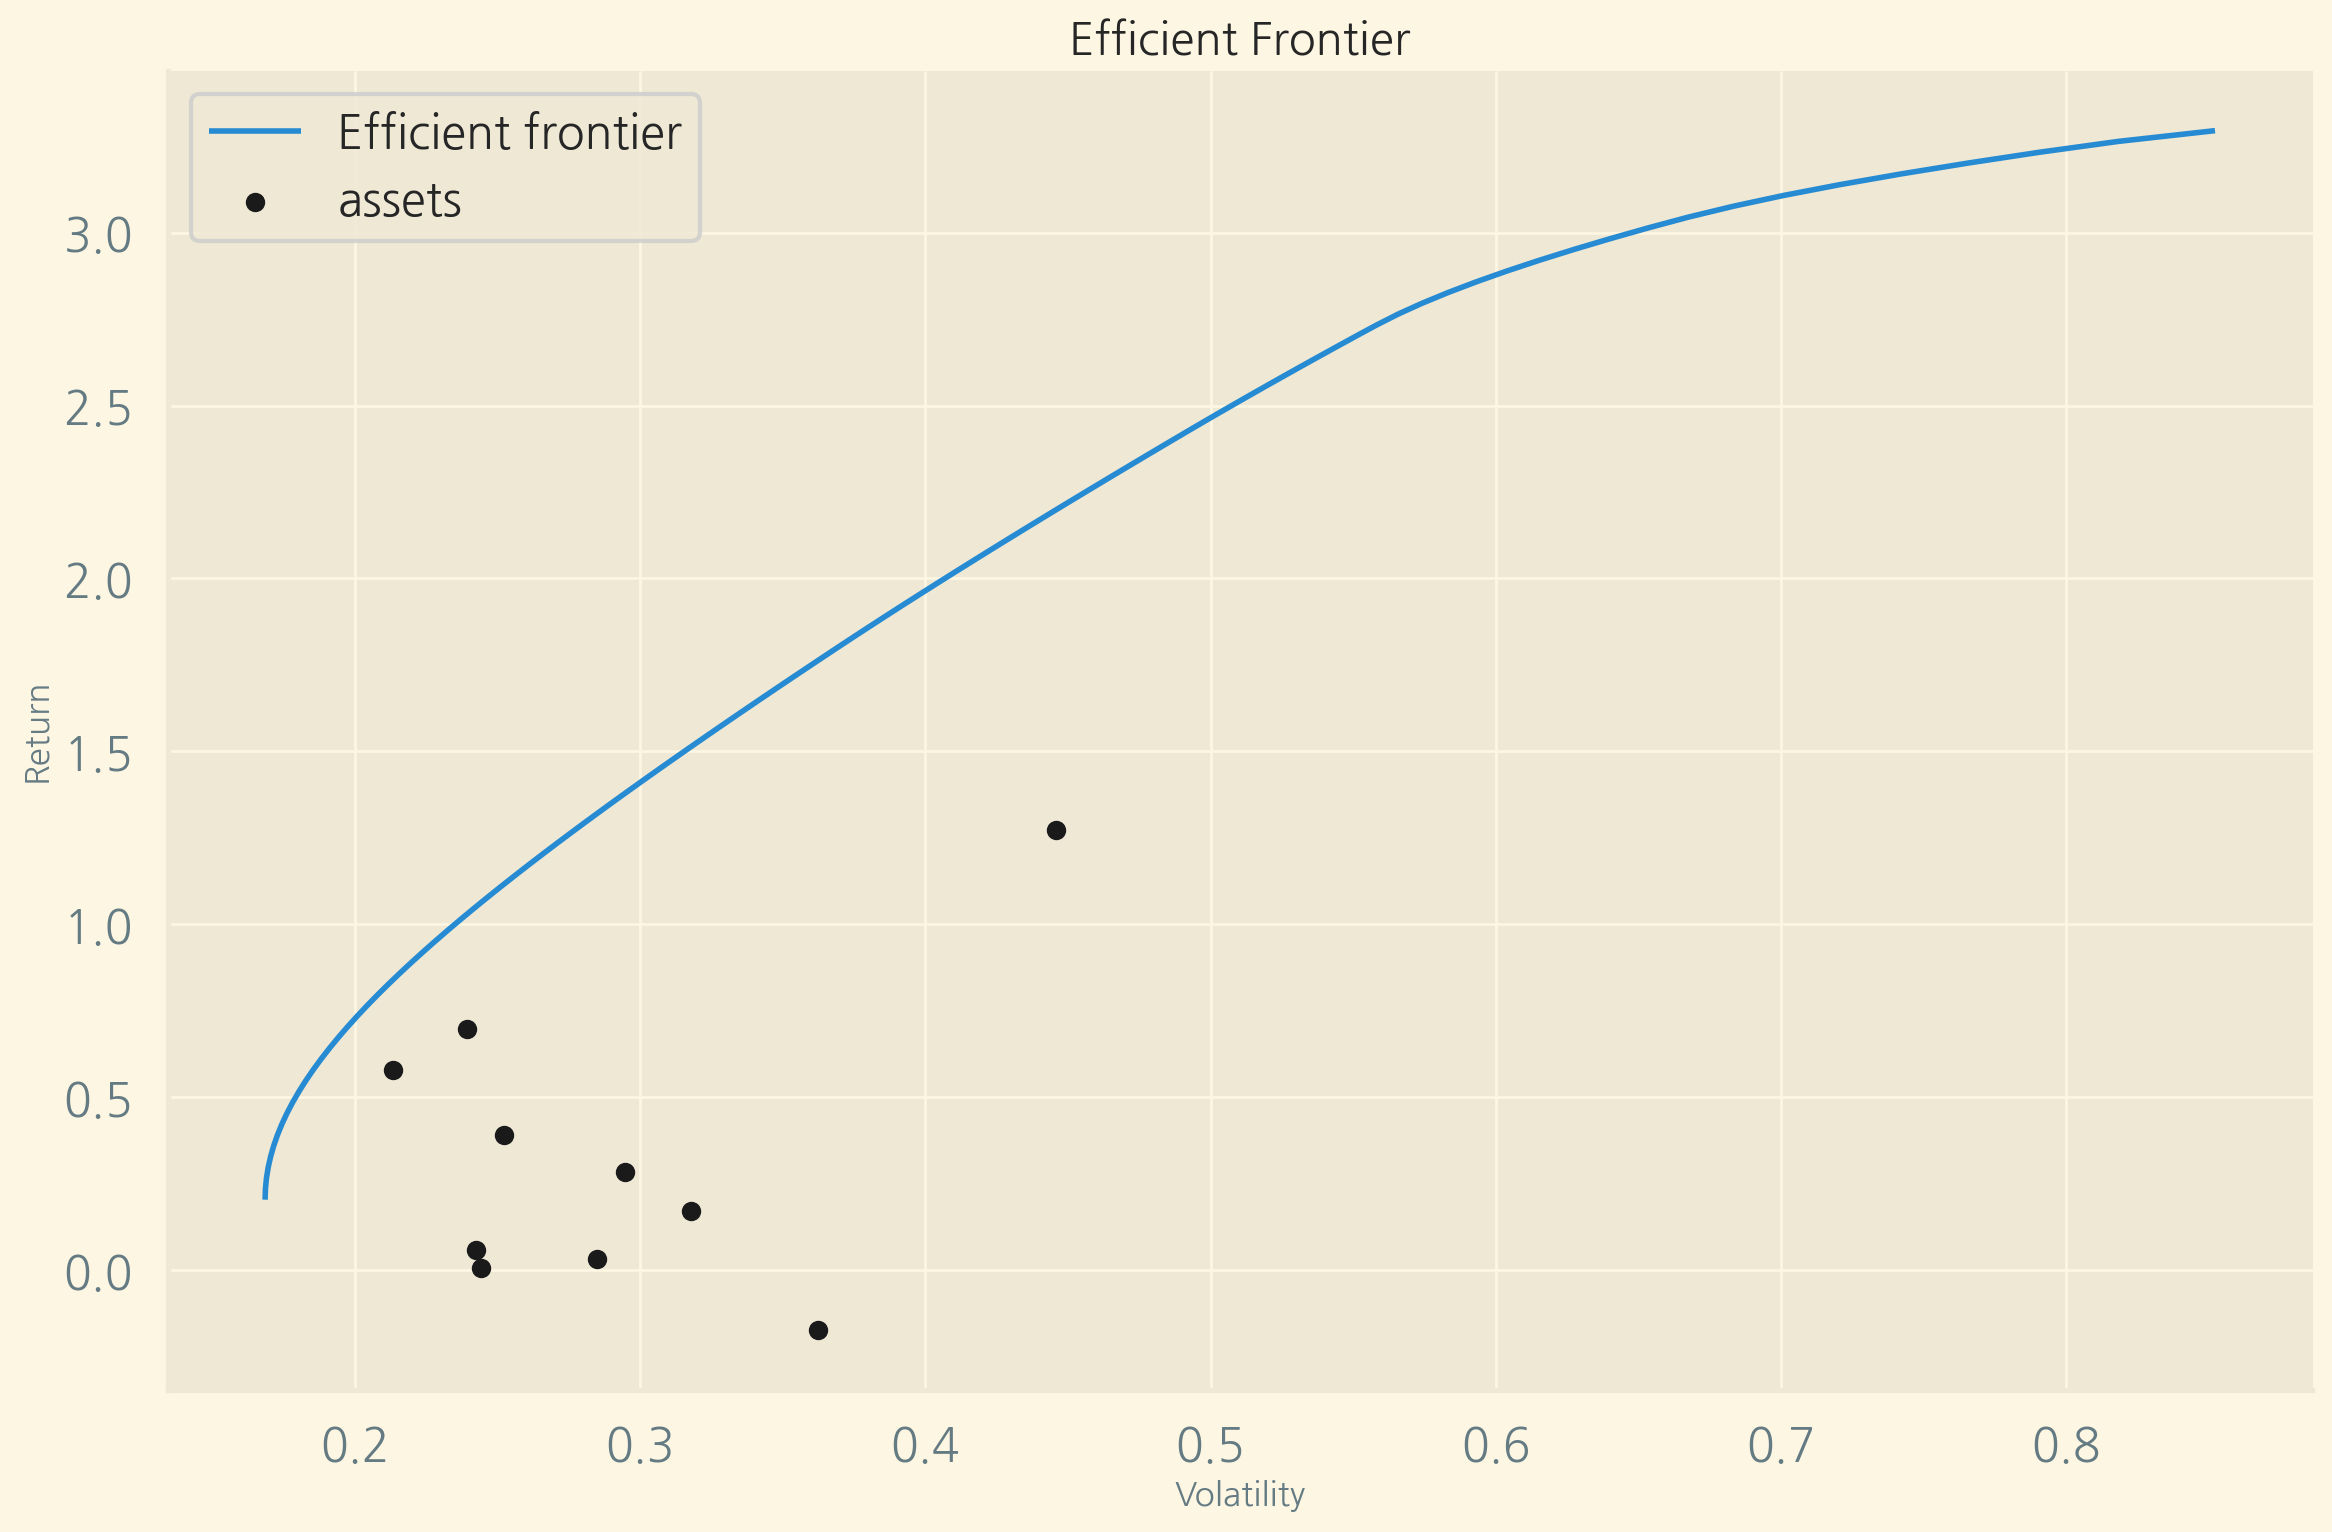

In [177]:
# 공매도를 허용하는 효율적 프론티어를 계산합니다
# weight_bounds=(-1,1)로 설정하여 각 자산의 가중치가 -100%에서 100% 사이가 되도록 합니다
ef = EfficientFrontier(mu, S, weight_bounds=(-1,1))

# 그래프를 그리기 위한 준비
fig, ax = plt.subplots()

# 효율적 프론티어를 그립니다
# show_assets=True로 설정하여 개별 자산도 함께 표시합니다
plot_efficient_frontier(ef, ax=ax, show_assets=True)

# 그래프 제목 설정
ax.set_title("Efficient Frontier")

# 그래프의 불필요한 테두리 제거
sns.despine()

# 그래프 레이아웃 조정
plt.tight_layout()

In [179]:
# 공매도를 허용하는 효율적 프론티어 객체를 생성합니다
# mu: 기대수익률, S: 공분산 행렬
# weight_bounds=(-1,1)로 설정하여 각 자산의 가중치가 -100%에서 100% 사이가 되도록 합니다
ef = EfficientFrontier(mu, S, weight_bounds=(-1,1))

# 샤프 비율을 최대화하는 포트폴리오 가중치를 계산합니다
# 무위험 수익률은 0으로 설정합니다
weights = ef.max_sharpe(risk_free_rate=0)

# 계산된 가중치를 정리하고 출력합니다
# clean_weights() 메서드는 매우 작은 가중치를 0으로 설정하여 결과를 더 깔끔하게 만듭니다
print(ef.clean_weights())

OrderedDict([('AAPL', 0.22296), ('AMZN', -0.94318), ('GOOG', 1.0), ('MA', -0.03679), ('META', -0.01186), ('MSFT', 0.92302), ('NFLX', -0.13341), ('NVDA', 0.73156), ('PYPL', -0.78314), ('V', 0.03085)])


In [180]:
# 포트폴리오 성과를 계산하고 출력합니다
# verbose=True: 자세한 출력을 활성화합니다
# risk_free_rate=0: 무위험 수익률을 0으로 설정합니다
# 이 함수는 예상 수익률, 변동성, 샤프 비율을 계산하여 보여줍니다
ef.portfolio_performance(verbose=True, risk_free_rate=0);

# 주의: 세미콜론(;)을 사용하여 출력을 억제하지 않았습니다.
# 이는 결과를 직접 확인할 수 있도록 하기 위함입니다.

Expected annual return: 230.1%
Annual volatility: 46.6%
Sharpe Ratio: 4.93


### See also

레시피에서 언급된 접근 방식과 관련된 추가 자료:

- Black, F., & Litterman, R. 1991. "Combining investor views with market equilibrium," *The Journal of Fixed Income*, 1, (2): 7-18: [https://doi.org/10.3905/jfi.1991.408013](https://doi.org/10.3905/jfi.1991.408013)
- Black, F., & Litterman, R. 1992. "Global portfolio optimization," *Financial Analysts Journal*, 48(5): 28-43
- Chen, Y., Wiesel, A., Eldar, Y. C., & Hero, A. O. 2010. "Shrinkage Algorithms for MMSE Covariance Estimation," *IEEE Transactions on Signal Processing*, 58(10): 5016-5029: [https://doi.org/10.1109/TSP.2010.2053029](https://doi.org/10.1109/TSP.2010.2053029)
- De Prado, M. L. 2016. "Building diversified portfolios that outperform out of sample," *The Journal of Portfolio Management*, 42(4): 59-69: [https://doi.org/10.3905/jpm.2016.42.4.059](https://doi.org/10.3905/jpm.2016.42.4.059)
- De Prado, M. L. 2018. *Advances in Financial Machine Learning*. John Wiley & Sons
- Ledoit, O., & Wolf, M. 2003 "Improved estimation of the covariance matrix of stock returns with an application to portfolio selection," *Journal of Empirical Finance*, 10(5): 603-621
- Ledoit, O., & Wolf, M. 2004. "Honey, I shrunk the sample covariance matrix," *The Journal of Portfolio Management*, 30(4): 110-119: [https://doi.org/10.3905/jpm.2004.110](https://doi.org/10.3905/jpm.2004.110)

# Summary

이 장에서는 자산 배분에 대해 배웠습니다. 우리는 가장 간단한 동일 가중 포트폴리오로 시작했으며, 이는 고급 최적화 기술을 사용하더라도 능가하기 어려운 것으로 입증되었습니다. 그런 다음, 평균-분산 최적화를 사용하여 효율적 프론티어를 계산하는 다양한 접근 방식을 탐색했습니다. 마지막으로, 자산 배분의 최근 발전 중 일부인 계층적 위험 균형 알고리즘에 대해서도 다뤘습니다.

Python을 사용한 자산 배분 접근 방식을 더 자세히 배우고 싶다면 다음 참조를 추천합니다:
- **Riskfolio-Lib**: [https://github.com/dcajasn/Riskfolio-Lib](https://github.com/dcajasn/Riskfolio-Lib) - 알고리즘과 평가 지표를 폭넓게 제공하는 인기 있는 포트폴리오 최적화 라이브러리
- **deepdow**: [https://github.com/jankrepl/deepdow](https://github.com/jankrepl/deepdow) - 포트폴리오 최적화와 딥러닝을 연결하는 Python 라이브러리

다음 장에서는 트레이딩 및 자산 배분 전략의 백테스팅 방법을 다룹니다.